<div align="center">

# **Computational Finance and Financial Management**
    
<div align="center">  -Prof. Dr. habil. Elmar Lukas , Dipl.-Ing. Gordon Briest
    
##### Seminar
#### _Summer Semester 2021_


    

    
#### _Otto Von Guericke University, Summer Semester 2021_

## Denzil Correa, Chiedozie Anderson Okolo

| <div align="center">  **Name**  </div>   | <div align="center">  **Student ID**  </div>
| ------             |    ------             |  
| <div align="center">  Denzil Correa | **221533** |
| <div align="center">  Chiedozie Anderson Okolo |  **230414** |  
    
<br/>    
<br/>

| <div align="center">  **ETH**  </div>   | <div align="center">      **SILVER**   </div>      | <div align="center">       **S&P SmallCap 600 UCITS**  </div>     |
| ------             |   ------                     | ------                     |
| source: Yfinance |        source: Yfinance           | source: Yfinance |

</div>
<br/>
<br/>

<div align="center">

### Overview <br/> 
<br/> 
    
    

      
<div align="center"> In this seminar we will be analysing our assigned underlying assets Etheream ( cryptocurrency ), Silver and iShares S&P SmallCap 600 UCITS ETF USD, with respect to their historical data.
    
<br/>     
<br/>
    
<div align="center"> The following ar the contents we will be convering in relation to our underlying asset analysis with a view point of an investor with an investment of <br/>100,000 Euros. ( Therefore our analysis will be all in euros ) 

<br/>
<br/>    
    
<div align="left">    
    
- **TIME SERIES ANALYSIS** <br/>
  **_Chracteristics_**  <br/>
  **_Stationarity_** <br/>
  **_Stationarity Process_** <br/>  
  **_Possible Models: ARIMA_** <br/>
    
   
- **EXPECTED RETURN AND RISK PORTFOLIO**

- **CORRELATION AND COVRIANCE**  
    
- **OPTIMAL PORTFOLIO**
    
- **MINIMUM VARIANCE PORTFOLIO - MAXIMUM SHARPE RATIO**  
    
- **TANGENTIAL PORTFOLIO**    
 
- **SUMMARY** 
    
</div>    

<div align="right"> Software Application used : Python 3.7 - Editor: Jupyter Notebook 

In [1]:
#Code sell importing tools from python library 

import numpy as np
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices,
# along with a large collection of high-level mathematical functions to operate on these arrays.

import pandas as pd
# pandas is a software library written for the Python programming language for data manipulation and analysis

import matplotlib as mplt
# Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy

import statsmodels as sm
# Statsmodels is a Python package that allows users to explore data, estimate statistical models, and perform statistical tests

import math as mth


import matplotlib.pyplot as plt

# Importiing yahoo finance. pip install yahoo finance

import yfinance as yf

In [2]:
# Setting up type of plot from matplot
 
from pylab import plt, mpl 

plt.style.use('seaborn') 
mpl.rcParams['font.family'] = 'serif' 
%matplotlib inline

# Setting up Graph size

plt.rcParams['figure.figsize'] = (18, 9)

# Giving it Grid layout

plt.rcParams['axes.grid'] = True

In [3]:
# Importing Pandas data web datareader are wb

from pandas_datareader import data as wb

# Additional Note: We will be using lower_camel_case with Snake_case throughout our codes as our Naming Convention.
# This makes it more readable. 

<div align="center"> 

# ETHEREUM 

Ethereum is open access to digital money and data-friendly services for everyone – no matter your background or location. It's a community-built technology behind the cryptocurrency ether (ETH) and thousands of applications you can use today. [*](https://ethereum.org/en/)    

Ethereum is a blockchain platform with its own cryptocurrency, called Ether (ETH) or Ethereum, and its own programming language, called Solidity. 
    
As a blockchain network, Ethereum is a decentralized public ledger for verifying and recording transactions. The network's users can create, publish, monetize, and use applications on the platform, and use its Ether cryptocurrency as payment. Insiders call the decentralized applications on the network "dapps." [*](https://www.analyticsinsight.net/top-10-cryptocurrencies-in-value-in-may-2021/)        

ETH is the second most prominent digital currency after bitcoin (BTC), with a market capitalisation of just over $286.9bn, as of 10 June. Although ethereum experienced massive volatility in the second half of May but is now recovering from the price crash. Some analysts attributed the recent market-wide crash to an apparent retreat from the mainstream adoption of cryptocurrencies. Nonethelees ETH trend on the long-time chart remains still up.. [*](https://capital.com/the-latest-ethereum-price-analysis-where-to-next)    


<div align="right">  Ticker: ETH-USD

In [4]:
# Converter US dollar to EURO.

EURUSD1 = yf.download('EURUSD=X', data_source='yahoo')

# Importing the historical price of dollar to Euro from yahoo finance.

EURUSD = EURUSD1['Adj Close']

# Getting the Adjusted Closing price of the historical data and assigning it to EURUSD.

Final = EURUSD.tail(1)

# Final is assigned to the tail(1) - the last / today's Adjusted closing price.

Converter = (Final[0])

# Finally we discard the date and assign only the value to Converter to use it and convert or currency from dollar to EURO.

print ( "Today's 1 Euro in Dollar is $%4.4f" %(Converter)) 

# Gives the output 


[*********************100%***********************]  1 of 1 completed
Today's 1 Euro in Dollar is $1.1841


In [5]:
# Importing Historical data of ETH - ethereum from yahoo finance, and dividing it by our converter gives the output in Euros

# Using Pandas Datareader to load the data and assigning it to ETH_Historical_data

ETH_historical_data = yf.download('ETH-USD', data_source='yahoo', start='2016-06-10', end= '2021-06-10')/ Converter
ETH_historical_data

# Note we have taken historical data from 15.06.2021 back to 5 years - 14.06.2021 which gives us around 1823 days data, 
# which is approximately to 365 days per year for our calculation.

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-06-09,12.186642,12.302001,12.110300,12.159618,12.159618,6.972893e+06
2016-06-10,12.140448,12.187655,11.671581,11.745813,11.745813,9.553744e+06
2016-06-11,11.746235,11.984807,11.586794,11.984807,11.984807,1.028305e+07
2016-06-12,11.980416,13.427550,11.980416,13.295555,13.295555,3.226860e+07
2016-06-13,13.319708,14.900527,13.275202,14.865480,14.865480,3.211076e+07
...,...,...,...,...,...,...
2021-06-05,2273.072660,2379.366061,2160.428397,2221.522284,2221.522284,2.575444e+10
2021-06-06,2220.822932,2316.836153,2209.349195,2292.895938,2292.895938,2.137568e+10
2021-06-07,2291.168589,2402.758877,2182.183963,2187.477345,2187.477345,2.584179e+10


# Characteristics 

Studying the past behavior of a series will help you identify patterns and make better forecasts. When plotted, many time series exhibit one or more of the following features:


- **TREND** : A trend is a gradual upward or downward shift in the level of the series or the tendency of the series values to increase or decrease over time. Historically, series plots of the stock market index show an upward global trend. Local downward trends have appeared in times of recession, and local upward trends have appeared in times of prosperity. In building ARIMA models, series showing trends are generally differenced to remove the effect of the trend.


- **SEASONALITY** : The variable may exhibit cyclicity or seasonality. This refers to the repeating cycle over a specific period (such as week, month, etc.) in the time series. A seasonal pattern exists when a series is influenced by seasonal factors (e.g., the quarter of the year, the month, or day of the week). Seasonality is always of a fixed and known period.


- **SERIAL CORRELATION**: subsequent observations.


- **IRREGULAR COMPONENT** ( WHITE NOISE ) : which is referred to as the White Noise. This is the random variation not explained by any other factor. White Noise is a stationary process with a constant mean and variance.


> You can already see that the stock is varying over time and in a Random walk although there is some spike during the year 2018 and has an upward trend starting from mid 2020 - towards first quater of 2021 and followed by a sudden drop. 

Today's price = Yesterdays's Price + Noise 

> **Note**: we take the Adjusted Closing price as it reflects stock splits and Dividends etc for all the stocks.

# Autocorrelation

Autocorrelation is the correlation of a single time series with a lagged copy of itself. It's also called **"Serial Correlation"**. Often, when we refer to a series's autocorrelation, we mean the "lag-one" autocorrelation. So when using daily data, for example, the autocorrelation would be the correlation of the series with the same series lagged by one day.

When a series has a positive or Negative Autocorrelation:
With financial time series, when returns have a negative autocorrelation, it is called **"Mean Reverting"**.

Alternatively, if a series has Positive Autocorrelation, it is called **"trend-following"**.

Importance: They are actually used on Wall Street to make money. Many hedge fund strategies are only slightly more complex versions of mean reversion and momentum strategies. Since stocks have historically had negative autocorrelation over horizons of about a week, one popular strategy is to buy stocks that have dropped over the last week and sell stocks that have gone up.

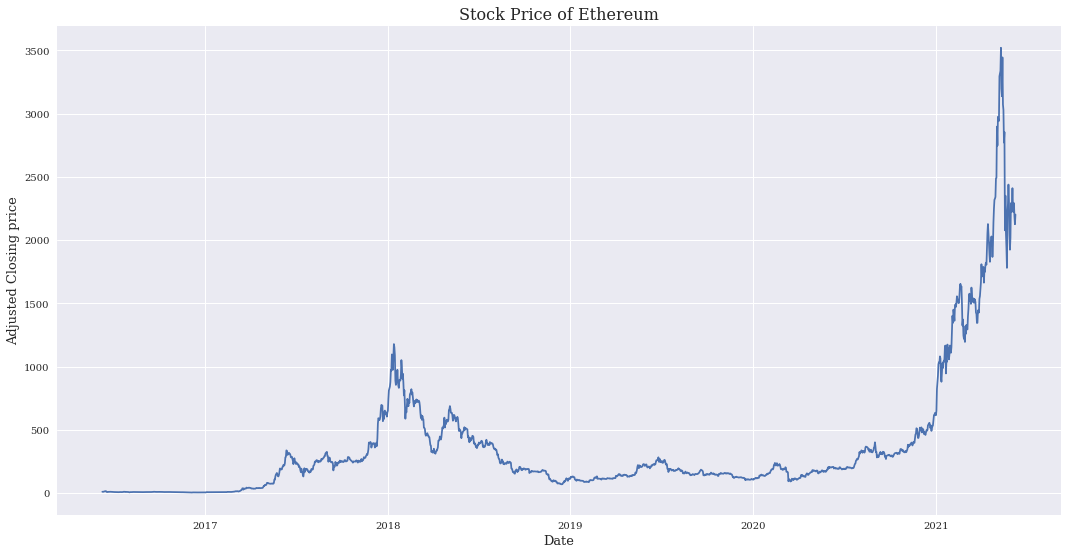

In [6]:
# Calling only Adjusted closing price and assigning it to ETH_adj_close

ETH_adj_close = ETH_historical_data[["Adj Close"]].copy()
 
# Ploting as Date on x axis 

plt.xlabel("Date", fontsize = 13 )

# Ploting as Adjusted closing price on  axis 

plt.ylabel("Adjusted Closing price", fontsize = 13)

# Ploting title as Adjusted CLosing price as it reflected stock splits and Dividends etc on y axis.

plt.plot(ETH_adj_close)

# Using dot title to input title as Stock price of etherum and setting font size to 20

plt.title( 'Stock Price of Ethereum', fontsize = 16 );

In [7]:
# ETH Adjusted closing price assigned to ETH_adj_close.

ETH_adj_close = ETH_historical_data['Adj Close']

# .pct_change will give the change in daily price value.

ETH_change = ETH_adj_close.pct_change()

# .dropna drops the Nan values 

ETH_daily_change = ETH_change.dropna()

# .autocorr function from pandas calculates the autocorrelation of daily change in price

autocorrelation_ETH_daily = ETH_daily_change.autocorr()

# Print funtion to print the autocorrelation of ETH change in price

print ("The daily autocorrelation of ETH is %4.4f" %(autocorrelation_ETH_daily))


The daily autocorrelation of ETH is -0.0184


In [8]:
# We do the same thing but with resampling our data into weekly.

ETH_adj_close = ETH_historical_data['Adj Close']

# Convert ETH daily data to weekly using .resample method , Rule W, is for weekly and .last takes the last value of the week.

ETH_weekly_change = ETH_adj_close.resample(rule='W').last()

ETH_weekly_change = ETH_weekly_change.pct_change()

ETH_weekly_change = ETH_weekly_change.dropna()

autocorrelation_ETH_weekly = ETH_weekly_change.autocorr()

print ("The weekly autocorrelation of ETH is %4.4f" %(autocorrelation_ETH_weekly))

The weekly autocorrelation of ETH is 0.1079


In [9]:
# We do the same thing but with resampling our data into Mothly.

ETH_adj_close = ETH_historical_data['Adj Close']

# Convert ETH daily data to weekly using .resample method , Rule M, is for weekly and .last takes the last value of the week.

ETH_monthly_change = ETH_adj_close.resample(rule='M').last()

ETH_monthly_change = ETH_monthly_change.pct_change()

ETH_monthly_change = ETH_monthly_change.dropna()

autocorrelation_ETH_monthly = ETH_monthly_change.autocorr()

print ("The monthly autocorrelation of ETH is %4.4f" %(autocorrelation_ETH_monthly))

The monthly autocorrelation of ETH is 0.1928


###  Autocorrelation Function

ACF shows not only the lag-one autocorrelation, but the entire autocorrelation function for different lags. Any significant non-zero autocorrelations implies that the series can be forecast from the past.

plot_acf is the statsmodels function for plotting the autocorrelation function. The input x is a series or array. The argument lags indicates how many lags of the autocorrelation function will be plotted. The alpha argument sets the width of the confidence interval.

For example, if alpha equals 0.05, that means that if the true autocorrelation at that lag is zero, there is only a 5% chance the sample autocorrelation will fall outside that window. An approximation to the width of the 95% confidence intervals, if you make some simplifying assumptions, it is plus or minus 2 over the square root of the number of observations in your series


**White Noise** is that it is a series with mean that is constant with time, a variance that is also constant with time, and zero autocorrelation at all lags.


In [10]:
from statsmodels.graphics.tsaplots import plot_acf
from math import sqrt

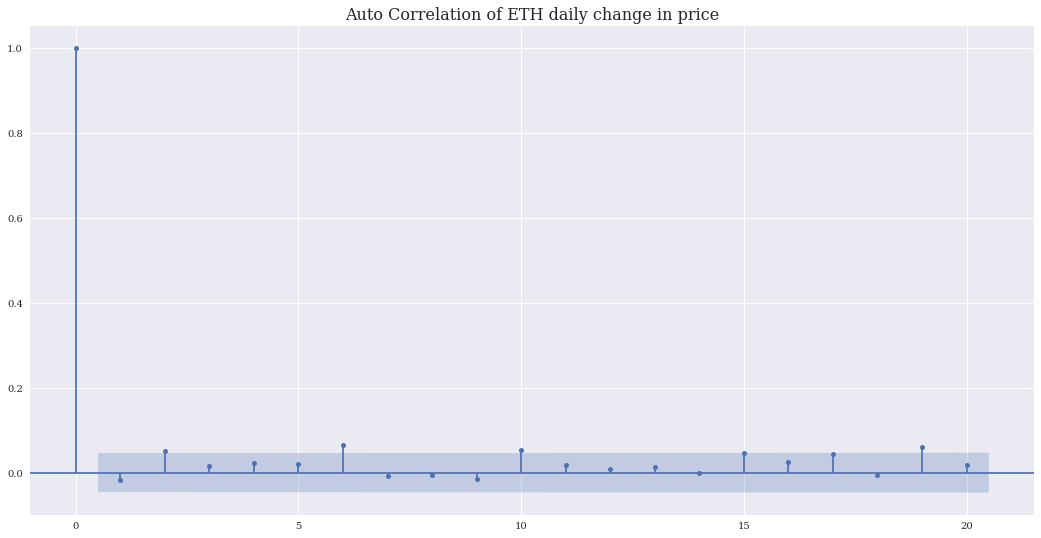

The approximate confidence interval is +/- 0.05


In [11]:
plot_acf(ETH_daily_change, alpha=0.05, lags=20)
plt.title( 'Auto Correlation of ETH daily change in price', fontsize = 16 )
plt.show()


#  the number of observations in the returns DataFrame using the len() function.
nobs = len(ETH_daily_change)

# the standard deviation of the ACF is 0.1, and since 95% of a normal curve is between +1.96 and -1.96 standard 
# deviations from the mean, the 95% confidence interval is
conf = 1.96/sqrt(nobs)

print("The approximate confidence interval is +/- %4.2f" %(conf))

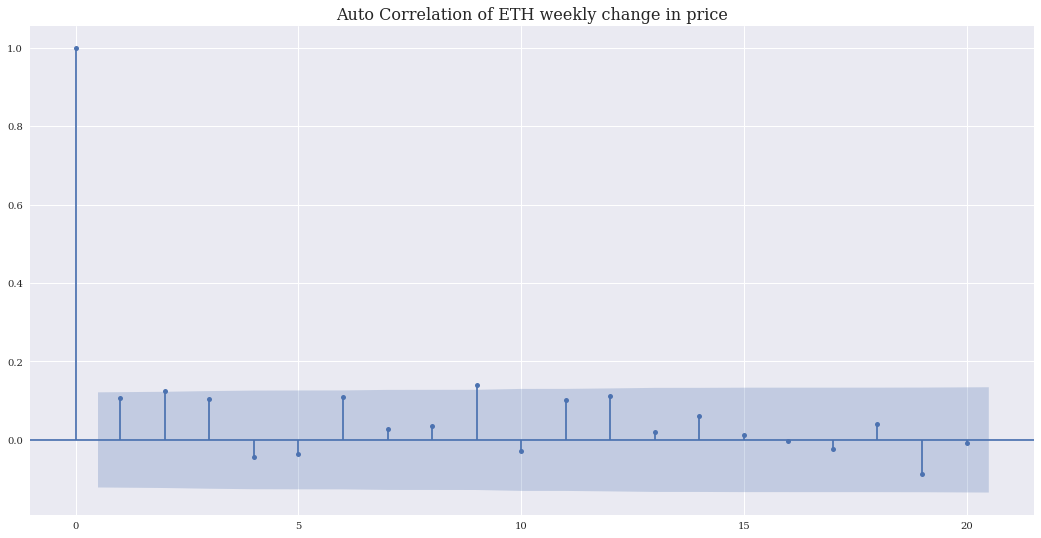

The approximate confidence interval is +/- 0.12


In [12]:
plot_acf(ETH_weekly_change, lags=20)
plt.title( 'Auto Correlation of ETH weekly change in price', fontsize = 16 )
plt.show()

nobs = len(ETH_weekly_change)
conf = 1.96/sqrt(nobs)
print("The approximate confidence interval is +/- %4.2f" %(conf))

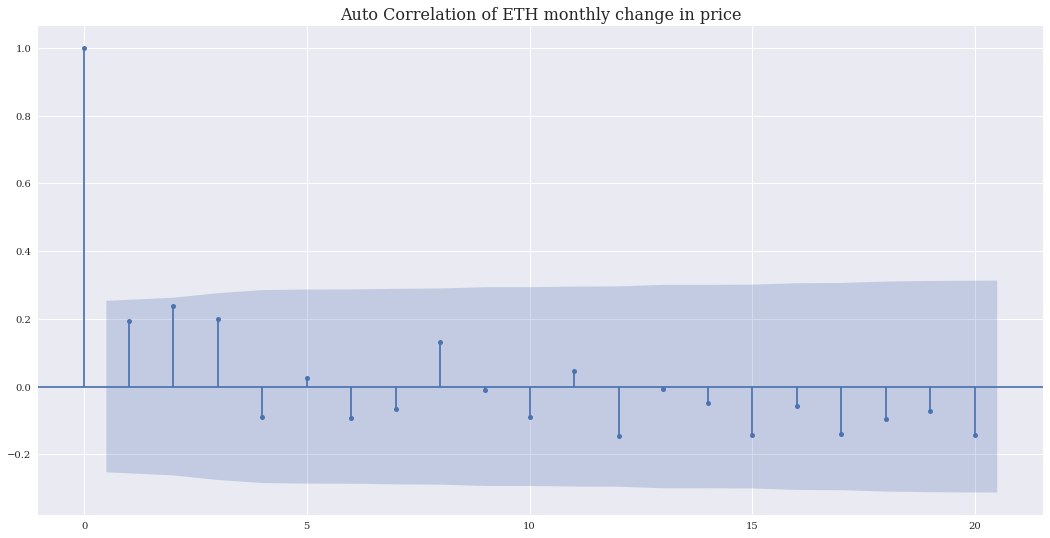

The approximate confidence interval is +/- 0.25


In [13]:
plot_acf(ETH_monthly_change, alpha= 0.05, lags=20)
plt.title( 'Auto Correlation of ETH monthly change in price', fontsize = 16 )
plt.show()

nobs = len(ETH_monthly_change)
conf = 1.96/sqrt(nobs)
print("The approximate confidence interval is +/- %4.2f" %(conf))


## Rolling Statistics

A rolling analysis of a time series model is often used to assess the model’s stability over time. 
When analyzing financial time series data using a statistical model, a key assumption is that the parameters of the model are constant over time.

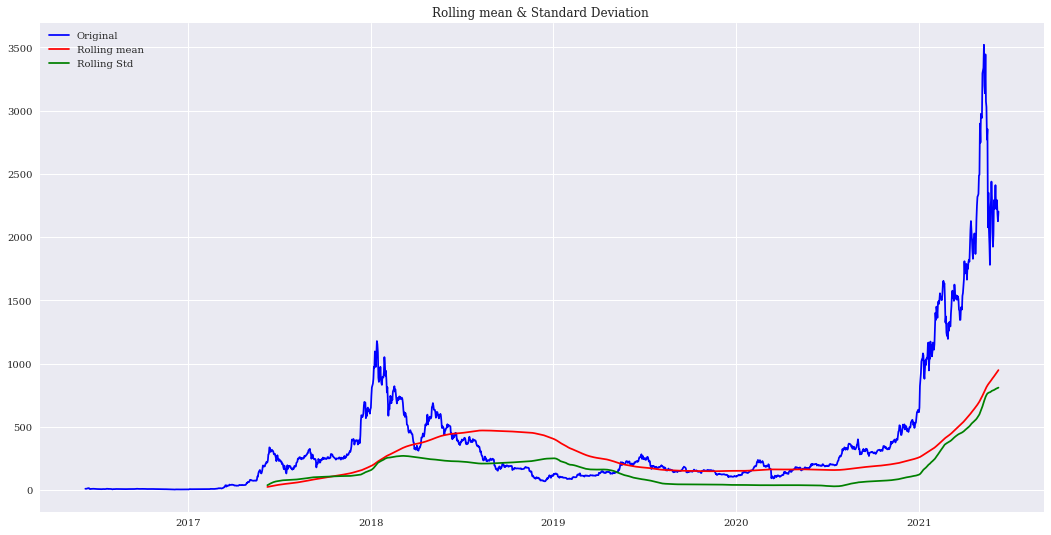

In [14]:
# Computing and ploting Rolling statistics - mean and standard deviation. 

# .mean() and .std() method compute the mean and standard deviation of the given time series.

moving_average = ETH_adj_close.rolling(window=365).mean()
moving_std = ETH_adj_close.rolling(window=365).std()

# Plotting it on graph. ETH stock price and assigning color and title

orig = plt.plot(ETH_adj_close, color='blue', label ='Original')
mean = plt.plot(moving_average, color='red', label='Rolling mean')
std = plt.plot(moving_std, color='green', label='Rolling Std')
plt.legend(loc ='best')
plt.title('Rolling mean & Standard Deviation ')
plt.show()

### Characteristics Analysis of Ethereum


- **TREND** : 
  We can say from Rolling statistics our data set although looks to be varying, The trend remains upward along with some    
  variation spike during 2018 and also a rapid boost after 2021 to 3500 Euros followed by a fall to 1700 euros and slowing 
  recoring from that fall now set to 2195 as of 14.06.2021
  

- **SEASONALITY** : 
  We don't see any seasonal pattern to our data set of ETH and therefore we can discard this characteristic.


- **SERIAL CORRELATION**: 
  The daily autocorrelation of ETH price change is -0.0184, weekly is 0.1079 and monthly is 0.1928. 
  daily show a very less negative autocorrelation. therefore we can conclude it is Mean reverting, however grows positive when
  we convert our data set to weekly and monthly and therefore we can say that it shows Trend following. 


- **IRREGULAR COMPONENT:(White Noise)**
  We used ACF to plot with approximate confidence interval +/- 0.05 for daily with 20 lags. where our 
  autocorrelation fell around 5 times outside the window and for weekly with an approximate confidence interval +/- 0.12, 2 times.
  therefore be able to conclude there doesn't exist a white noise. however it isn't the case with our monthly change in price 
  data with an approximate confidence interval is +/- 0.25. all autocorrelation fall inside the window suggesting it as white
  noise.
  



### Determining Stationarity 

Stationarity can be defined in precise mathematical terms, but for our purpose we mean a flat looking series, without trend, constant variance over time, a constant autocorrelation structure over time and no periodic fluctuations.

To determine the stationarity we have couple of option, 

1. **Rolling Statistics** - This plots the Moving average or Moving variance and see if it varies with time. 
   This method is more of a visiual technique to determine stationarity 
   

2. **ADF test** - Augmented Dickey Fuller test (ADF Test) is a common statistical test used to test whether a given Time series    is stationary or not. It is one of the most commonly used statistical test when it comes to analyzing the stationary of a 
   series.
   
   **Random Walk** A Random walk is today's price is equal to yesterday's price plus some noise. Here is a plot of a simulated        random walk..
     
    In python the ADF can be performed with stats models where p-value is measured to determine the null hypthesis, if the p 
    value is less than 0.05. then we can reject the null hypothesis and say that the values of the series are stationary. If 
    not we can't reject the null hypothesis and our data would be Non-stationary.



In [15]:
# Importing adfuller test from statsmodels, which allow us to perform adf test on a given series.

from statsmodels.tsa.stattools import adfuller

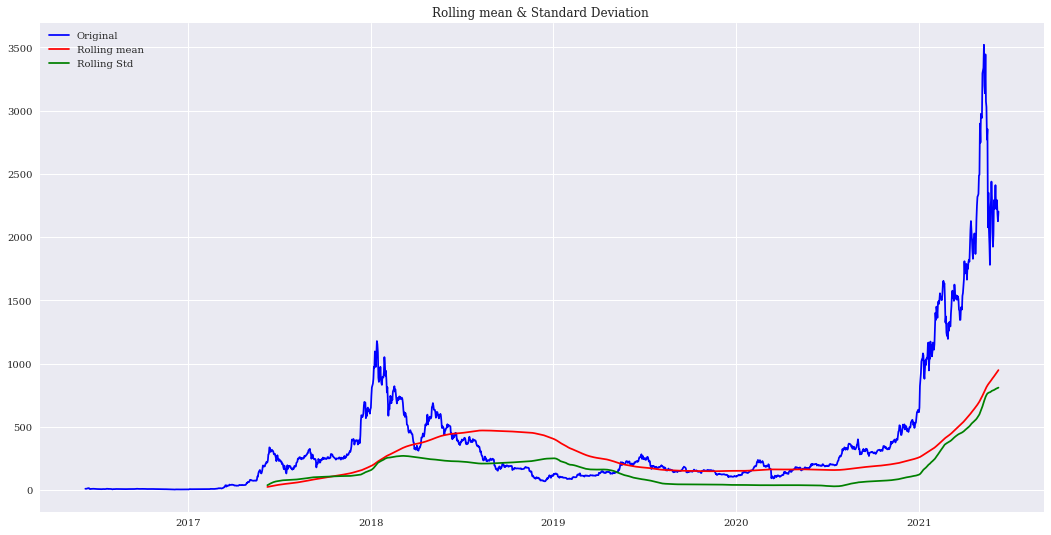

In [16]:
# Plot rolling statistics with a window of 365 as our data set contains 365 days data in a year.

# .mean() and .std() method compute the mean and standard deviation of the given time series.

moving_average = ETH_adj_close.rolling(window=365).mean()
moving_std = ETH_adj_close.rolling(window=365).std()

# Plotting it on graph. ETH stock price and assigning color and title

orig = plt.plot(ETH_adj_close, color='blue', label ='Original')
mean = plt.plot(moving_average, color='red', label='Rolling mean')
std = plt.plot(moving_std, color='green', label='Rolling Std')
plt.legend(loc ='best')
plt.title('Rolling mean & Standard Deviation ')
plt.show()

> We can see visually the our data set doesn't have a constand mean or variance and verries over time. making our data set to be - non stationary..

In [17]:
# Now we perform ADF test to be sure to analyses and see the P-Value in our data set to detemine stationarity.

print ('Result of dickey fuller Test for ETH:')

# Test adfuller on ETH stock price.
dftest = adfuller(ETH_adj_close)

# Naming and structuring our results
dfoutput = pd.Series(dftest[0:4], index= ['Test Statistic', 'P-value',  'lag used', 'Number of observation'])

for key,value in dftest[4].items():
    dfoutput['Critical Value(%s)' %key ] = value  
    
print(dfoutput)

Result of dickey fuller Test for ETH:
Test Statistic              0.699339
P-value                     0.989825
lag used                   25.000000
Number of observation    1797.000000
Critical Value(1%)         -3.433994
Critical Value(5%)         -2.863150
Critical Value(10%)        -2.567627
dtype: float64


> The only important things we need to consider here for our stationarity is the P-value. which is much higher then 0.05 and therefore clearly indicating our data set to be Non- stationary.

#### Wrapping 

In [1]:
# Building a model to determine and test stationarity of any data defining it as "Test_stationarity_( followed by number of days)".
# We can also use that .rolling()  .mean() .std() function to calculate rolling mean and standard deviation like earlier.

# Note that we have combined the rolling statistical test and the ADF test into one model and with a window of 365 days to 
# data consisting of 365 days and 252 days other yearly data for 252 is average trading days. 52 for weekly data set.
# and finally 12 for monthly data set.


def test_stationarity_365(x):
    
    movingAverage = x.rolling(window=365).mean()
    movingSTD = x.rolling(window=365).std()
    
    orig = plt.plot(x, color='blue', label ='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling mean')
    std = plt.plot(movingSTD, color='green', label='Rolling Std')
    plt.legend(loc ='best')
    plt.title('Rolling mean & Standard Deviation ')
    plt.show()

    
    print ('Results of Dickey fuller Test:')
    dftest = adfuller(x, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index= ['Test Statistic', 'P-value',  'lag used', 'Number of observation'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value(%s)' %key ] = value    
    print(dfoutput)
    
def test_stationarity_252(x):
    
    movingAverage = x.rolling(window=252).mean()
    movingSTD = x.rolling(window=252).std()
    
    orig = plt.plot(x, color='blue', label ='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling mean')
    std = plt.plot(movingSTD, color='green', label='Rolling Std')
    plt.legend(loc ='best')
    plt.title('Rolling mean & Standard Deviation ')
    plt.show()

    
    print ('Results of Dickey fuller Test:')
    dftest = adfuller(x, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index= ['Test Statistic', 'P-value',  'lag used', 'Number of observation'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value(%s)' %key ] = value    
    print(dfoutput)    
    
def test_stationarity_weekly(x):
    
    movingAverage = x.rolling(window=52).mean()
    movingSTD = x.rolling(window=52).std()
    
    orig = plt.plot(x, color='blue', label ='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling mean')
    std = plt.plot(movingSTD, color='green', label='Rolling Std')
    plt.legend(loc ='best')
    plt.title('Rolling mean & Standard Deviation ')
    plt.show()

    
    print ('Results of Dickey fuller Test:')
    dftest = adfuller(x, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index= ['Test Statistic', 'P-value',  'lag used', 'Number of observation'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value(%s)' %key ] = value    
    print(dfoutput)
    
def test_stationarity_monthly(x):
    
    movingAverage = x.rolling(window=12).mean()
    movingSTD = x.rolling(window=12).std()
    
    orig = plt.plot(x, color='blue', label ='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling mean')
    std = plt.plot(movingSTD, color='green', label='Rolling Std')
    plt.legend(loc ='best')
    plt.title('Rolling mean & Standard Deviation ')
    plt.show()

    
    print ('Results of Dickey fuller Test:')
    dftest = adfuller(x, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index= ['Test Statistic', 'P-value',  'lag used', 'Number of observation'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value(%s)' %key ] = value    
    print(dfoutput)    

### **Converting out data set to Stationary.**

Importance: We need to convert our data set to stationary in order to forecast. Although ARIMA model can import a Non-stationary data set and using d to difference the time series to make it stationary and forecast. we found better result when we converted out data set stationary ourself. ( at the end of our analysis we will show you both our results )

Ways of Converting Non - Stationary data set to stationary data set.

1. Log.
2. Subtracting Simple rolling Averages.
3. Subtracting Exponential rolling Averages.
4. Subtracting previous value (most popular) with shift - which is also the return. 
5. Combination of the above.

#### 1 Log of the values.

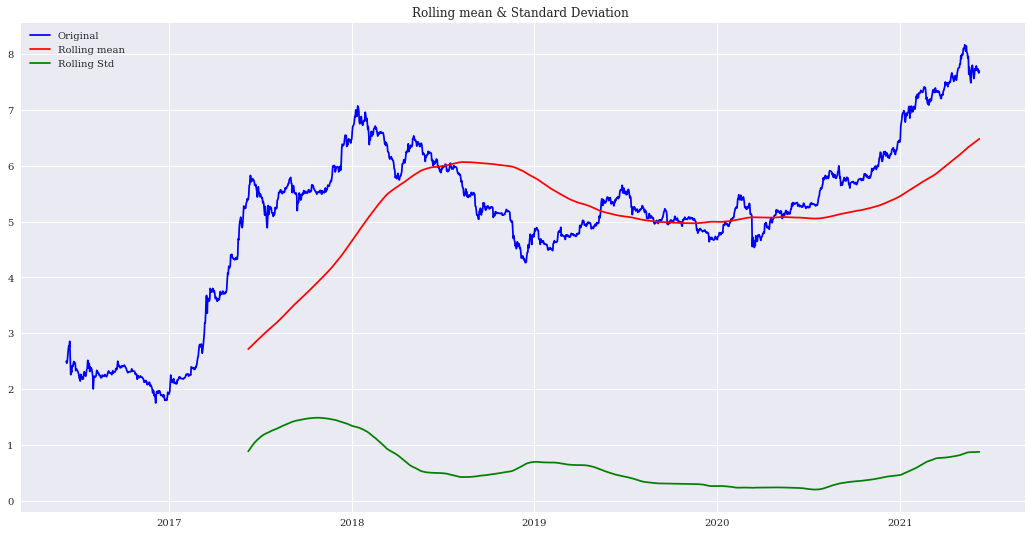

Results of Dickey fuller Test:
Test Statistic             -0.785912
P-value                     0.823225
lag used                    6.000000
Number of observation    1816.000000
Critical Value(1%)         -3.433956
Critical Value(5%)         -2.863133
Critical Value(10%)        -2.567618
dtype: float64


In [19]:
# We have using .log from numpy to get the log values and assigning it to ETH_adj_close_logscale

ETH_adj_close_logscale = np.log(ETH_adj_close)

# testing stationarity by _365 days on our data set
test_stationarity_365(ETH_adj_close_logscale)


> Our P-Value is not less than 0.05 and Rolling mean and variance neither looks stationary. therefore we can discard this method.

#### 2 Differecing Simple Moving Average

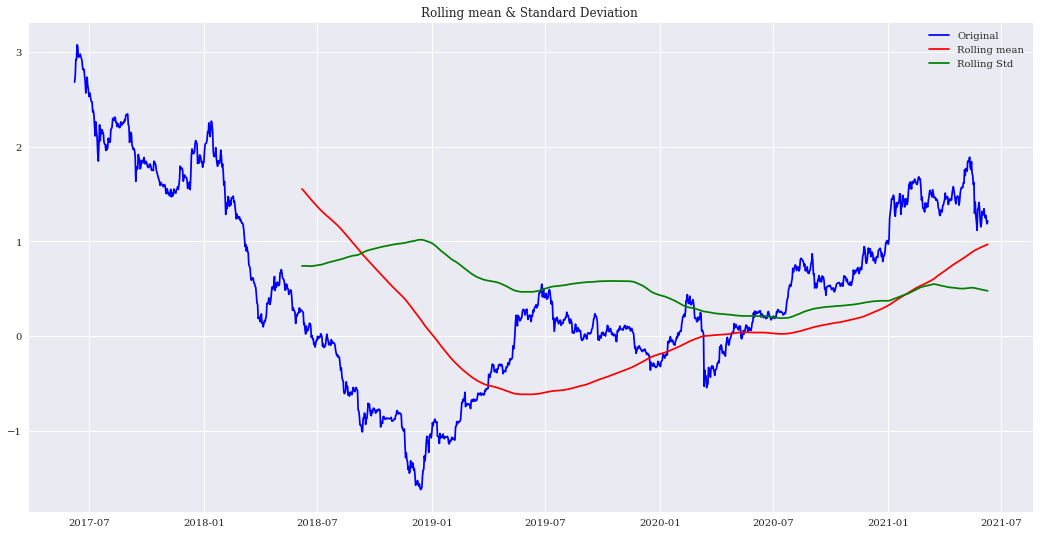

Results of Dickey fuller Test:
Test Statistic             -2.450144
P-value                     0.128081
lag used                   10.000000
Number of observation    1448.000000
Critical Value(1%)         -3.434874
Critical Value(5%)         -2.863538
Critical Value(10%)        -2.567834
dtype: float64


In [20]:
# taking the rolling mean of our log values calculated earlier and assinging it to moving average
moving_average = ETH_adj_close_logscale.rolling(window=365).mean()

# Minusing moving average from log values.
data_set_logscale_Minus_MovingAverage = ETH_adj_close_logscale - moving_average
data_set_logscale_Minus_MovingAverage.head(12)

#Remove Nan Values
data_set_logscale_Minus_MovingAverage.dropna(inplace=True)

# Testing stationarity
test_stationarity_365(data_set_logscale_Minus_MovingAverage)

> Our P-Vaue comparitively seems to have gone down but still is vell above 0.05. Therefore we can't reject the null hypothesis. 
  making our data set Non- stationary

#### 3 Differecing Exponential Moving Average

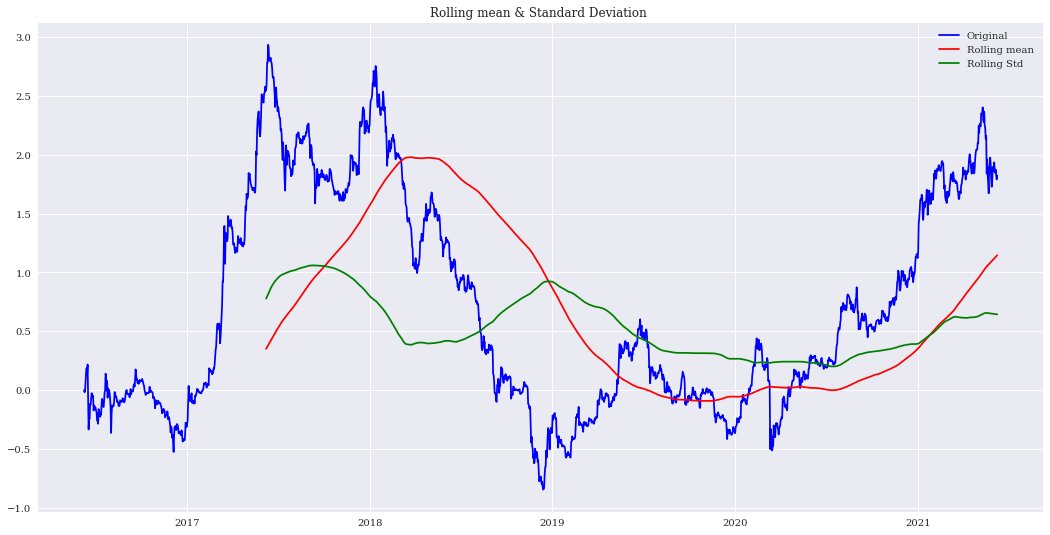

Results of Dickey fuller Test:
Test Statistic             -1.312042
P-value                     0.623645
lag used                    6.000000
Number of observation    1816.000000
Critical Value(1%)         -3.433956
Critical Value(5%)         -2.863133
Critical Value(10%)        -2.567618
dtype: float64


In [21]:
# we have taking .ewm (exponential weighted) and .mean - our exponential moving average and assigned it accordingly
exponential_Decay_Weighted_Average = ETH_adj_close_logscale.ewm(halflife=365, min_periods= 0, adjust=True).mean()

# minusing exponential moving average from lof value.
data_set_logscale_Minus_Moving_Exponential_Decay_Average = ETH_adj_close_logscale - exponential_Decay_Weighted_Average

# testing stationarity 
test_stationarity_365 (data_set_logscale_Minus_Moving_Exponential_Decay_Average)


> Our P-Value in signinficantly higher than before and Rolling Mean and variance also show high variation.

#### Differencing Previous Value - Return

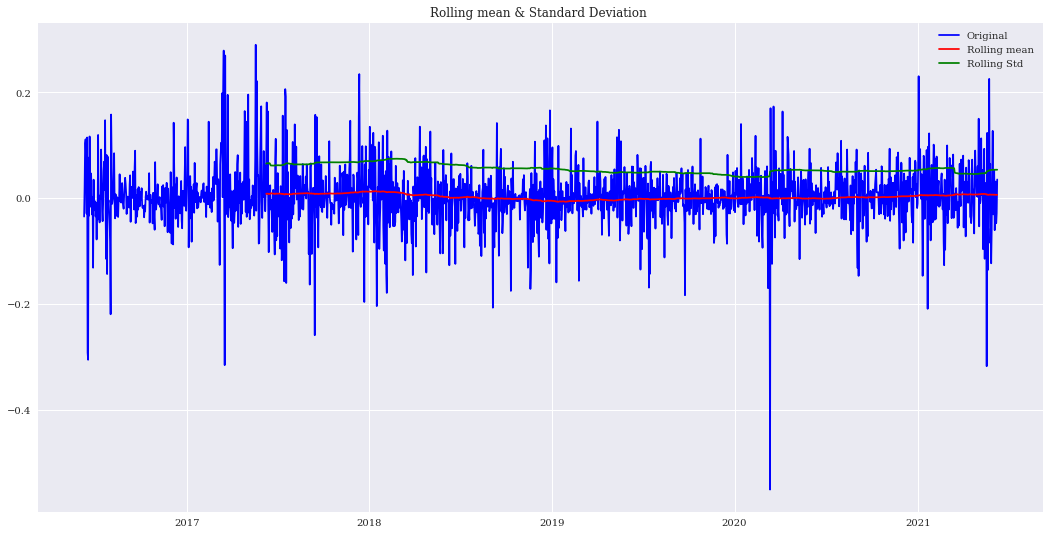

Results of Dickey fuller Test:
Test Statistic          -1.571114e+01
P-value                  1.359027e-28
lag used                 5.000000e+00
Number of observation    1.816000e+03
Critical Value(1%)      -3.433956e+00
Critical Value(5%)      -2.863133e+00
Critical Value(10%)     -2.567618e+00
dtype: float64


In [22]:
# Differencing Previous log value from todays log value. ( Also know as return )

# We divide todays value with yesterdays value with .shift(1) to assertain our result. and .log to get the log value.

ETH_log_return = np.log(ETH_historical_data['Adj Close'] / ETH_historical_data['Adj Close'].shift(1))

ETH_log_return.dropna(inplace=True)

test_stationarity_365(ETH_log_return)


> Our P-value seems to much higher compare to any of our results although The Rolling Mean and Variance seem to be constant.
we still can not reject the null hypothesis and call our data set stationary.

#### Using Converted data ( Weekly or Monthly)

In [23]:
# Converting our daily data to weekly data and assigning it to ETH_weekly
ETH_weekly = ETH_historical_data.resample(rule='W').last()
ETH_weekly


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-06-12,11.980416,13.427550,11.980416,13.295555,13.295555,3.226860e+07
2016-06-19,9.430785,11.132284,8.981765,10.331782,10.331782,5.893225e+07
2016-06-26,12.043499,12.138759,11.532915,11.696494,11.696494,1.245435e+07
2016-07-03,10.236016,10.256622,9.786995,9.897709,9.897709,8.942158e+06
2016-07-10,9.256058,9.301070,9.105568,9.245249,9.245249,4.627218e+06
...,...,...,...,...,...,...
2021-05-16,3075.526241,3275.727798,2829.878789,3029.649024,3029.649024,3.999508e+10
2021-05-23,1940.971167,2013.635694,1467.292417,1781.540240,1781.540240,4.729683e+10
2021-05-30,1924.014983,2087.762633,1848.470785,2018.613007,2018.613007,2.185281e+10


In [24]:
# Taking the Adjusted closing price.
ETH_adj_close_weekly = ETH_weekly['Adj Close']

# Getting the log values for future calculations.
ETH_adj_weekly_log = np.log(ETH_adj_close_weekly)

# Calculating the lof return
ETH_log_return_weekly = np.log(ETH_weekly['Adj Close']/ ETH_weekly['Adj Close'].shift(2))
ETH_log_return_weekly =  ETH_log_return_weekly.dropna()
ETH_log_return_weekly.tail()

# Note that our data set is difference twice .shift(2) as we ran few test we found the differencing twice gave us the optimal 
# Stationary data set with our P value less than 0.05

Date
2021-05-16    0.194955
2021-05-23   -0.621857
2021-05-30   -0.406036
2021-06-06    0.252337
2021-06-13    0.087265
Freq: W-SUN, Name: Adj Close, dtype: float64

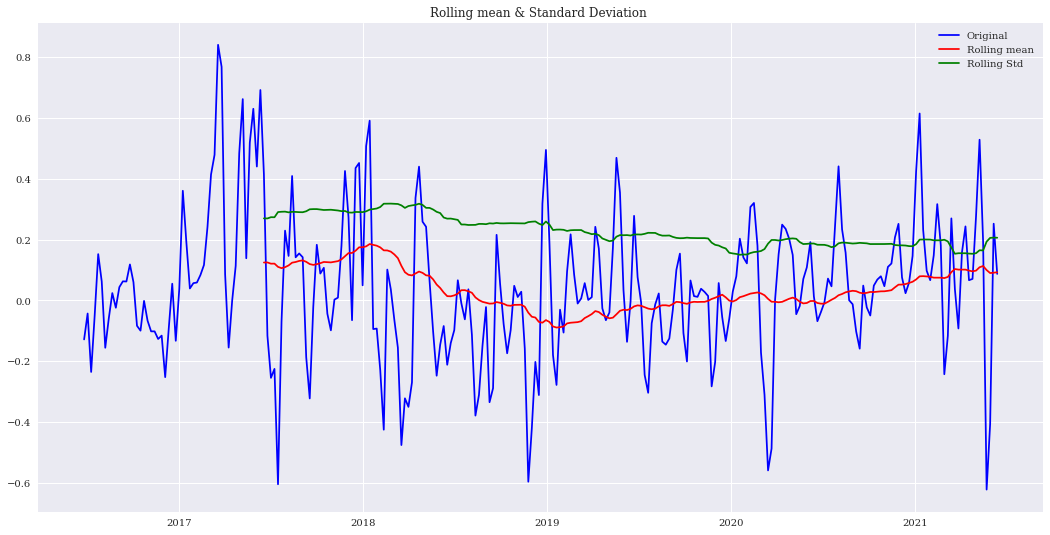

Results of Dickey fuller Test:
Test Statistic            -3.263760
P-value                    0.016578
lag used                  10.000000
Number of observation    249.000000
Critical Value(1%)        -3.456888
Critical Value(5%)        -2.873219
Critical Value(10%)       -2.572994
dtype: float64


In [25]:
test_stationarity_weekly(ETH_log_return_weekly)

> Since we took the weekly data and difference the log values twice we have now can say that our data set is not stationary and we can reject the null hypothesis. We can also see that our values are constantly close to 0 and the P-value is less than 0.05

#### Partial Autocorrelation Function

In time series analysis, the partial autocorrelation function (PACF) gives the partial correlation of a stationary time series with its own lagged values, regressed the values of the time series at all shorter lags. It contrasts with the autocorrelation function, which does not control for other lags.

This function plays an important role in data analysis aimed at identifying the extent of the lag in an autoregressive model. The use of this function was introduced as part of the Box–Jenkins approach to time series modelling, whereby plotting the partial autocorrelative functions one could determine the appropriate lags p in an AR (p) model or in an extended ARIMA (p,d,q) model[*](https://en.wikipedia.org/wiki/Partial_autocorrelation_function)        

In [26]:
# As mentioned earlier statsmodels helps us plot acf and pacf, thereby importing acf and pacf

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

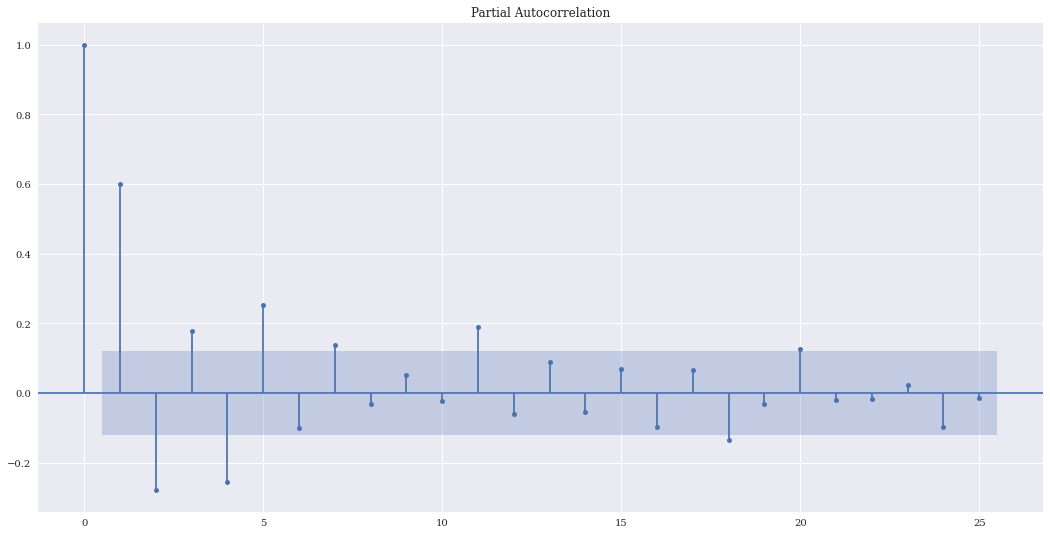

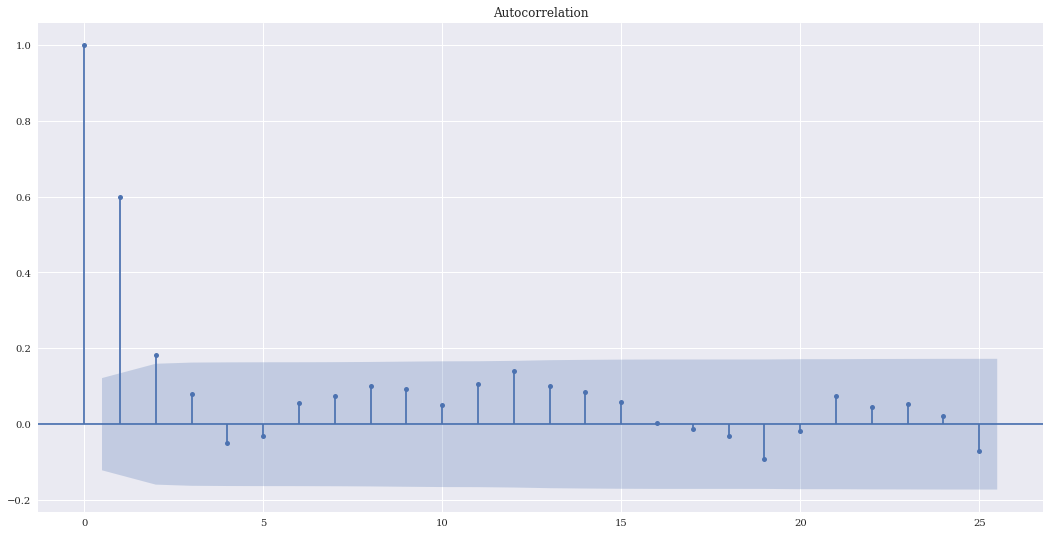

In [27]:
# ploting out stationary data set values - ACF and PACF

plot_pacf(ETH_log_return_weekly);
plot_acf(ETH_log_return_weekly);

If the PACF of the differenced series displays a sharp cutoff and/or the lag-1 autocorrelation is positive--i.e., if the series appears slightly "underdifferenced"--then consider adding an AR term to the model. The lag at which the PACF cuts off is the indicated number of AR terms.

If the ACF of the differenced series displays a sharp cutoff and/or the lag-1 autocorrelation is negative--i.e., if the series appears slightly "overdifferenced" then consider adding an MA term to the model. The lag at which the ACF cuts off is the indicated number of MA terms.

> PACF: We can determine and see that our PACF, have number of values falling ouside the window but is negative in lag-2 thereofore we can use the AR model 1 since it looks like it's over differenced. i.e - **p**

> ACF: We also see that our ACF values falling outside the window on 2 intervals therefore we can take 1 or 2 for our MA model. i.e - **q**

### AIC and BIC 

The information criteria adjusts the goodness-of-fit of a model by imposing a penalty based on the number of parameters used. Two common adjusted goodness-of-fit measures are called the Akaike Information Criterion and the Bayesian Information Criterion.

Akaike’s Information Criteria generally tries to find unknown model that has high dimensional reality. This means the models are not true models in AIC. On the other hand, the Bayesian Information Criteria comes across only True models. It can also be said that Bayesian Information Criteria is consistent whereas Akaike’s Information Criteria is not so.

Therefore, In practice, the way to use the information criteria is to fit several models, each with a different number of parameters, and choose the one with the lowest Bayesian information criterion.

In [28]:
# we can also use statsmodel to determine the p and q value of our data set by either AIC or BIC 
# However we here are considering BIC for our calculations.

# ignores warnings about packages which is to expire.
import warnings 
warnings.filterwarnings('ignore')

from statsmodels.tsa.arima_process import arma_generate_sample
import statsmodels.api as sm

from statsmodels.tsa.stattools import arma_order_select_ic
arma_or = res = sm.tsa.arma_order_select_ic(ETH_log_return_weekly, ic=["aic", "bic"], trend="nc")
arma_or 

{'aic':             0           1           2
 0         NaN -200.893034 -201.615475
 1 -121.073102 -202.277090 -203.440705
 2 -137.954800 -204.065092 -202.400950
 3 -145.990402 -202.301194 -200.665193
 4 -160.347580 -201.656500 -199.730028,
 'bic':             0           1           2
 0         NaN -193.771670 -190.933430
 1 -113.951739 -191.595046 -189.197978
 2 -127.272755 -189.822366 -184.597542
 3 -131.747676 -184.497786 -179.301104
 4 -142.544172 -180.292410 -174.805256,
 'aic_min_order': (2, 1),
 'bic_min_order': (0, 1)}

> The BIC suggest that we use the parameters 0, 1. Nonetheless we will test which parameters suits the best for modelling.

In [29]:
# Importing ARIMA AND ARMA process from statsmodels

from statsmodels.tsa.arima_model import ARIMA

#### AR model

Autoregressive model, 

In a multiple regression model, we forecast the variable of interest using a linear combination of predictors. In an autoregression model, we forecast the variable of interest using a linear combination of past values of the variable. The term autoregression indicates that it is a regression of the variable against itself.

Thus, an autoregressive model of order  p can be written as

 ####  c + ϕ1 yt − 1 + ϕ2yt − 2 + ⋯ + ϕpyt − p + εt 
 
where  εt  is white noise. This is like a multiple regression but with lagged values of  yt  as predictors. We refer to this as an AR( p ) model, an autoregressive model of order  p. 



#### MA model

Moving Average model 

Rather than using past values of the forecast variable in a regression, a moving average model uses past forecast errors in a regression-like model.

  ##### yt = c + εt + θ1εt − 1 + θ2εt − 2 +⋯+ θqεt − q

where,  
εt is white noise. We refer to this as an MA( q ) model, a moving average model of order  q . Of course, we do not observe the values of  εt , so it is not really a regression in the usual sense.

### ARIMA 

If we combine differencing with autoregression and a moving average model, we obtain a non-seasonal ARIMA model. ARIMA is an acronym for AutoRegressive Integrated Moving Average (in this context, “integration” is the reverse of differencing).

                              ARMA Model Results                              
Dep. Variable:              Adj Close   No. Observations:                  260
Model:                     ARMA(0, 1)   Log Likelihood                 104.390
Method:                       css-mle   S.D. of innovations              0.161
Date:                Thu, 08 Jul 2021   AIC                           -202.780
Time:                        12:12:02   BIC                           -192.098
Sample:                    06-26-2016   HQIC                          -198.486
                         - 06-13-2021                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0392      0.020      1.979      0.048       0.000       0.078
ma.L1.Adj Close     0.9882      0.013     76.346      0.000       0.963       1.014
                                

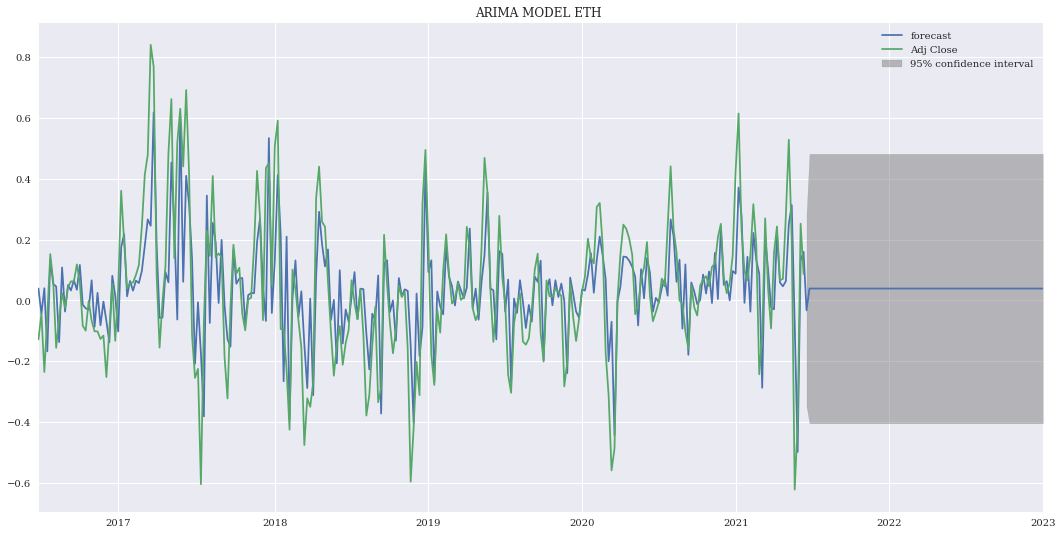

In [30]:
# ARIMA using p value 1 and q value 1. Note that the data set we are using is already stationary therefore we need not 
# use the d - differencing to make it stationary and therefore kept it as zero.


ARIMA_model_ETH = ARIMA (ETH_log_return_weekly, order = (0, 0, 1))
results_ARIMA_ETH = ARIMA_model_ETH.fit(disp= 0)


results_ARIMA_ETH.plot_predict(start='2016', end= '2023');
plt.title('ARIMA MODEL ETH ')

print(results_ARIMA_ETH.summary())

> You can see that our ARIMA model fits quite decently to the original differenced data. This will in return get us a good forecast for Ethereum. Notice the the P-Value with parameters ( 0, 0 , 1 ) is less than 0.05. 

> Additional Note: we have tried different parameters to see if our P-value is better. We found that the given value is more suitable after test. Which is also suggesting just a MA model with our differencing and no AR parameters.

In [31]:
# Now we used the ARIMA modelled to forecast, but since we took the log values of the weekly adjust closing price
# we now have to convert our data back to it's original values.

# We take the ARIMA modeled value and put in a series using pandas.Series which will give us the values of our ARIMA model.
predictions_ARIMA_eth = pd.Series(results_ARIMA_ETH.fittedvalues, copy=True)/2

# This gives us the length of out fitted ARIMA series, Therefore we can use this length to combine our data to the original.
len(predictions_ARIMA_eth)

260

In [32]:
# importing datetime as dt to index our data 
import datetime as dt

In [33]:
# Now we use the ARIMA modelled to forecast, but since we took the log values of the weekly adjust closing price
# we now have to convert our data back to it's original values.

# We take the ARIMA modeled value and put in a series using pandas.Series which will give us the values of our ARIMA model.
predictions_ARIMA_eth = pd.Series(results_ARIMA_ETH.fittedvalues, copy=True)/2

# We then take the Cumulative sum of those value using .cumsum() 
cum_sum_eth = predictions_ARIMA_eth.cumsum()

# Since our ARIMA predicted value length is 260 we are taking only the tail log value - 260 to our calculation.
ETH_adj_weekly_log = ETH_adj_weekly_log.tail(260)

# We are taking the first log value of our weekly closing price and adding it to our cumulative summed values
predictions_ARIMA_log_ETH = pd.Series(ETH_adj_weekly_log.iloc[0], index = ETH_adj_weekly_log.index)
predictions_ARIMA_log_ETH = predictions_ARIMA_log_ETH.add(cum_sum_eth,fill_value = 0 )

# getting the exponential value of the previous fitted value
prediction_ARIMA_ETH= np.exp(predictions_ARIMA_log_ETH)

# Putting our values in Date frame using pandas.DataFrame and indexing it.
prediction_ARIMA_ETH = pd.DataFrame({ 'ETH predicted values' : prediction_ARIMA_ETH[prediction_ARIMA_ETH.index > dt.datetime(2016, 1, 1)]})

prediction_ARIMA_ETH.tail()

,ETH predicted values
Date,
2021-05-16,2503.753793
2021-05-23,2407.838087
2021-05-30,1876.984480
2021-06-06,2003.202326
2021-06-13,2169.925410


> You can see that you ARIMA model series are almost close to the Adjusted Close price of ETH after we convert them back to meet the original values.

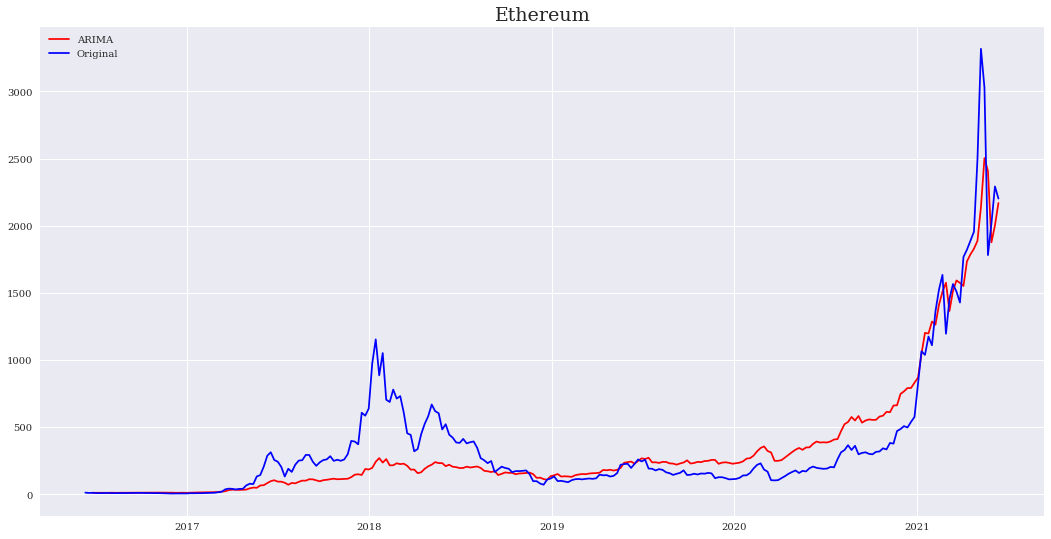

In [34]:
# And finally we plot the ARIMA Model to forecaste our time series.

arima_eth = plt.plot(prediction_ARIMA_ETH, color = 'red', label= 'ARIMA')
original_eth = plt.plot(ETH_adj_close_weekly, color='blue', label = 'Original')
plt.title('Ethereum', fontsize = '19')
plt.legend(loc ='best')
plt.show()


> You can futher notice that our ARIMA model grasps the the pattern of original values. The red line indicating The ARIMA values and Blue line indicating the Original Values 


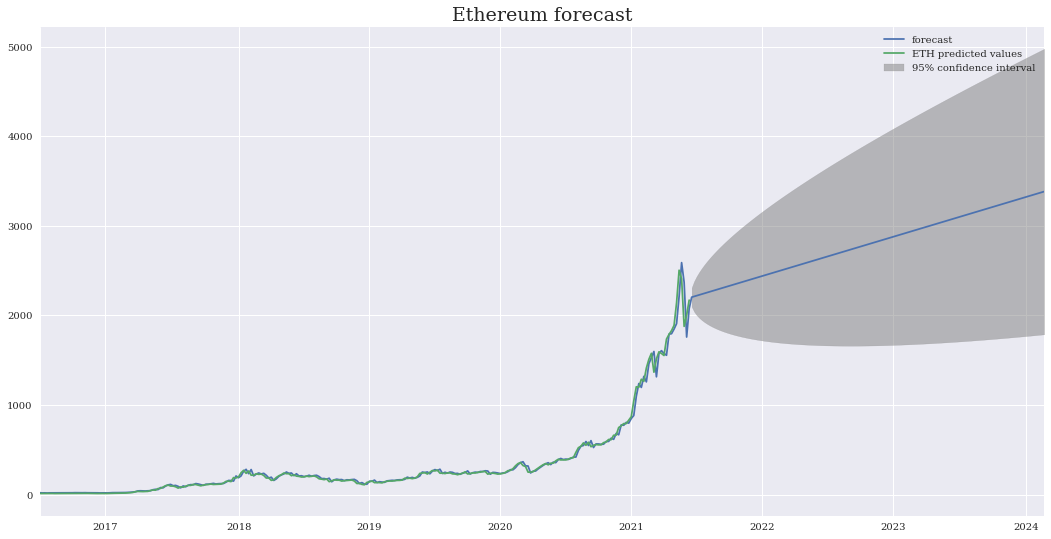

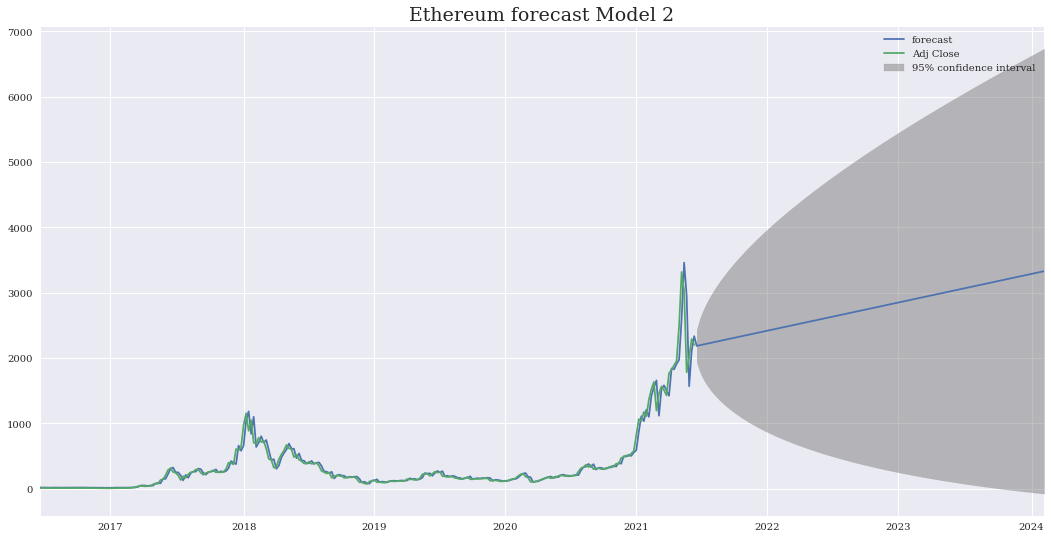

In [35]:
# refitting our ARIMA values into ARIMA model to forecast by differencing once.

forecast_ETH = ARIMA (prediction_ARIMA_ETH, order = (0, 1, 1))
forecast_ARIMA_ETH = forecast_ETH.fit(disp= 0)

#print(results_ARIMA1.summary())

#print (results_ARIMA1.params)

# Using .plot_predict to predict /forecast. 
# Since our data set is around the length 260 we can set 1 to 400. which will show the prediction of next 140 data.


forecast_ARIMA_ETH.plot_predict(1,400);
plt.title('Ethereum forecast', fontsize = '19')

# Used directly ETH adjusted Weekly price to forecast by giving the same parameters
# Note we have used this to compare if our stationarity process have helped us attain better results.

forecast_ETH_2 = ARIMA (ETH_adj_close_weekly, order = (0, 1, 1))
forecast_ARIMA_ETH_2 = forecast_ETH_2.fit(disp= 0)

forecast_ARIMA_ETH_2.plot_predict(1, 400);
plt.title('Ethereum forecast Model 2', fontsize = '19');

> You can see that our data when made stationary ourself gives a much better and narrow Confidence intervel than while using the data directly on ARIMA model with(d). where the confidence intervel is much wider while forecasting. 

Overall We can say with 95% confidence that our ETH stock will show an upward trend stock price falling between- 1900€ - 4900€ by the end of 2024.


   In Addition to it 2 main reason to buy Ethereum is ( long term advantage):
   1. Ethereum 2.0 could give it a competitive advantage.
   2. The Ethereum blockchain has more utility.
   
However, right now Ethereum show high volatility as it lost 50% of it price value.   
   

> Note: Since we now know that differncing method is probably the best method to make our data set stationary we will be only using that method to forecast our ARIMA model.  

# SILVER 

Silver is valued both as an industrial metal and as a precious metal. It is used in jewelry, electronics, and photography. Many investors use it as a safe haven in times of economic turmoil and sometimes as a hedge against inflation. Silver mining companies are engaged in the acquisition, exploration, development, and production of mineral properties

<div align="right"> Ticker: SI=F

In [36]:
#Importing Historical data of ETH - ethereum from yahoo, and dividing it by our converter gives the output in euros

SL_Historical_data = yf.download('SI=F', data_source='yahoo', start='2001-06-10', end= '2021-06-10')/ Converter
SL_Historical_data
# Since silver historical data is available from 2001. we have adjusted our dates from 2001.05.30

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2001-06-11,3.653307,3.653307,3.653307,3.653307,3.653307,84.450003
2001-06-12,3.686242,3.686242,3.686242,3.686242,3.686242,0.000000
2001-06-13,3.720023,3.720023,3.686242,3.720023,3.720023,0.000000
2001-06-14,3.766470,3.766470,3.766470,3.766470,3.766470,0.000000
2001-06-15,3.709889,3.709889,3.709889,3.709889,3.709889,0.000000
...,...,...,...,...,...,...
2021-06-03,22.961956,23.189970,22.961956,23.189970,23.189970,16.890001
2021-06-04,23.543816,23.543816,23.543816,23.543816,23.543816,0.000000
2021-06-07,23.320868,23.646845,23.320868,23.646845,23.646845,3.378000


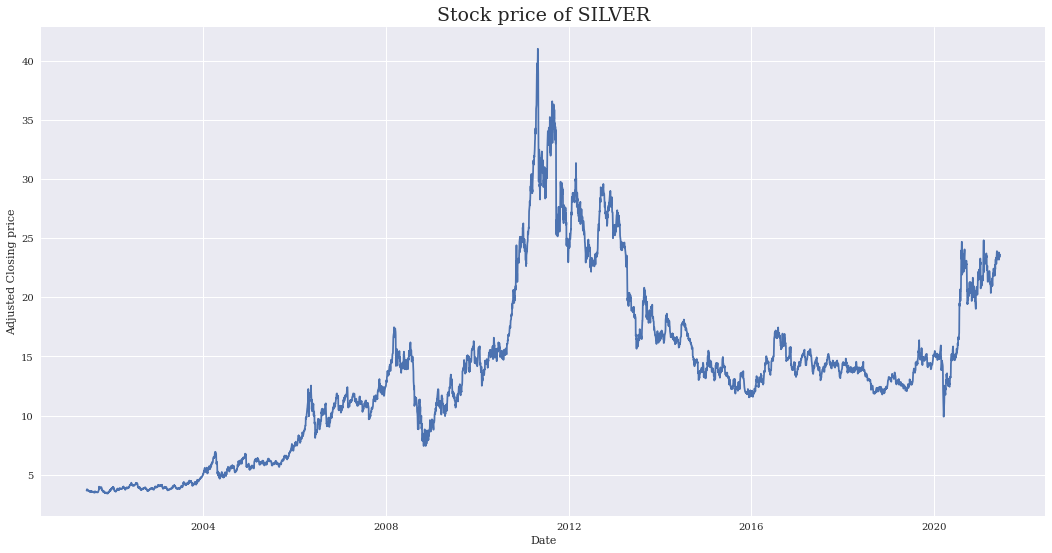

In [37]:
# ploting graph of Silver price.
SL_Adj_Close = SL_Historical_data[["Adj Close"]].copy()
plt.xlabel("Date")
plt.ylabel("Adjusted Closing price")
plt.plot(SL_Adj_Close)
plt.title('Stock price of SILVER', fontsize = '19');

## Determining Stationarity

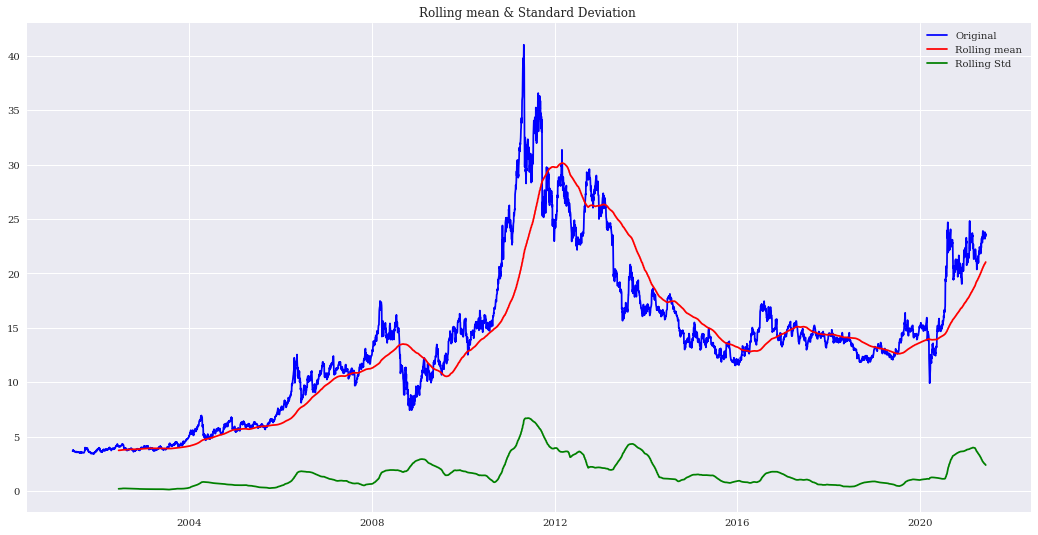

Results of Dickey fuller Test:
Test Statistic             -1.491964
P-value                     0.537483
lag used                   31.000000
Number of observation    4955.000000
Critical Value(1%)         -3.431670
Critical Value(5%)         -2.862123
Critical Value(10%)        -2.567081
dtype: float64


In [38]:
# Testing Stationarity of Silver by 252 days, as silver is traded on 5 days a week unlike our cryptocurrency
test_stationarity_252(SL_Adj_Close)

> We can see visually the our data set doesn't have a constand mean or variance and verries over time. our a trend, making our data set to be - non stationary.

> ADF result P-value is much higher then 0.05 and therefore clearly indicating our data set to be **Non- stationary.**

### Characteristics

- **TREND**

> You can see that our data set is clearly not stationary. Howevery our trend hasn't remained up through out the way, we see a large spike high, Silver hitting almost to 40 plus euros in 2011 and a gradual decline up until late 2019 and recovering since then

> A more intricate reasoning for silver’s rise involved the use of silver in solar panels. This theory begins with the research that industrial demand for silver was surging in 2011, due in part to the photovoltaic industry consuming silver in much higher quantities than previously. Supply wasn’t able to keep up, leaving a shortfall.
[*](https://link.springer.com/article/10.1007/s11356-019-04357-1#citeas) silver demand rose 338%!, according to BullionVault

> Nonetheless, we see that Silver gaining back it value from the graph, shown a good growth from late 2019 up until now.

- **SEASONALITY**

> Silver as you can see isn't showing any seasonal patterns therefore we can discard this factor

In [39]:
# computing the daily autocorrelation of Silver

SL_adj_close = SL_Historical_data['Adj Close']

SL_change = SL_adj_close.pct_change()

SL_daily_change = SL_change.dropna()

autocorrelation_SL_daily = SL_daily_change.autocorr()

print ("The daily autocorrelation of Silver is %4.4f" %(autocorrelation_SL_daily))

The daily autocorrelation of Silver is -0.0276


In [40]:
# Computing Autocorrelation of Silver

SL_adj_close = SL_Historical_data['Adj Close']

# Convert ETH daily data to weekly using .resample method , Rule W, is for weekly and .last takes the last value of the week.

SL_weekly_change = SL_adj_close.resample(rule='W').last()

SL_weekly_change = SL_weekly_change.pct_change()

SL_weekly_change = SL_weekly_change.dropna()

autocorrelation_SL_weekly = SL_weekly_change.autocorr()

print ("The weekly autocorrelation of Silver is %4.4f" %(autocorrelation_SL_weekly))

The weekly autocorrelation of Silver is 0.0066


In [41]:
# We do the same thing but with resampling our data into Mothly.

SL_adj_close = SL_Historical_data['Adj Close']

# Convert ETH daily data to weekly using .resample method , Rule M, is for weekly and .last takes the last value of the week.

SL_monthly_change = SL_adj_close.resample(rule='M').last()

SL_monthly_change = SL_monthly_change.pct_change()

SL_monthly_change = SL_monthly_change.dropna()

autocorrelation_SL_monthly = SL_monthly_change.autocorr()

print ("The monthly autocorrelation of Silver is %4.4f" %(autocorrelation_SL_monthly))

The monthly autocorrelation of Silver is -0.0566


### Autocorrelation function

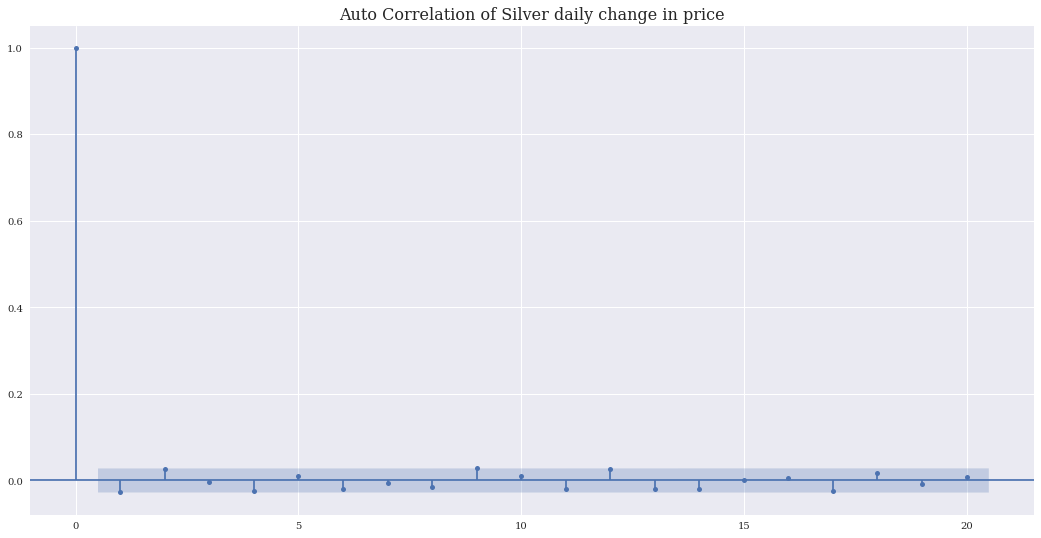

The approximate confidence interval is +/- 0.03


In [42]:
plot_acf(SL_daily_change, alpha=0.05, lags=20)
plt.title( 'Auto Correlation of Silver daily change in price', fontsize = 16 )
plt.show()


#  the number of observations in the returns DataFrame using the len() function.
nobs = len(SL_daily_change)

# the standard deviation of the ACF is 0.1, and since 95% of a normal curve is between +1.96 and -1.96 standard 
# deviations from the mean, the 95% confidence interval is
conf = 1.96/sqrt(nobs)

print("The approximate confidence interval is +/- %4.2f" %(conf))

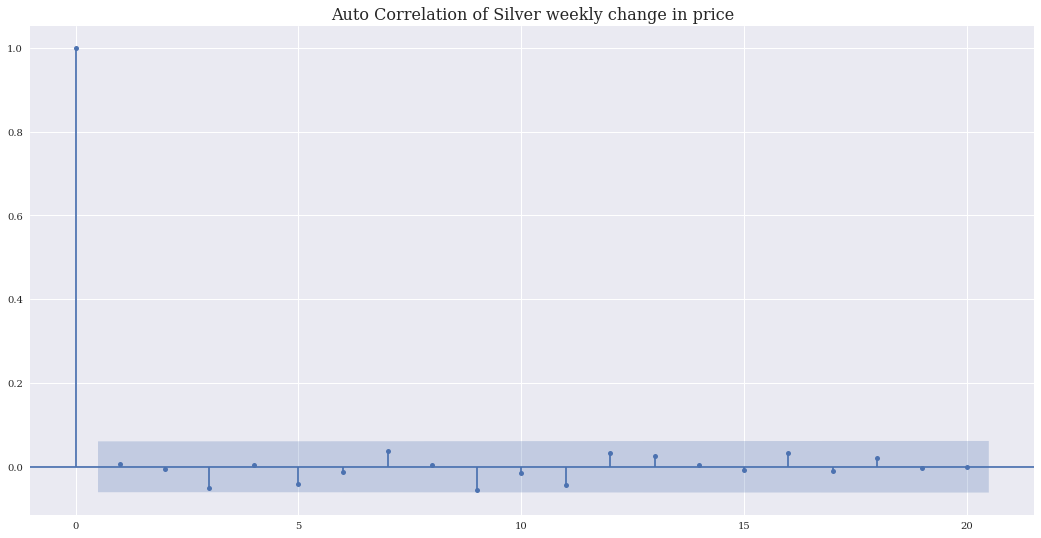

The approximate confidence interval is +/- 0.06


In [43]:
plot_acf(SL_weekly_change, lags=20)
plt.title( 'Auto Correlation of Silver weekly change in price', fontsize = 16 )
plt.show()

nobs = len(SL_weekly_change)
conf = 1.96/sqrt(nobs)
print("The approximate confidence interval is +/- %4.2f" %(conf))

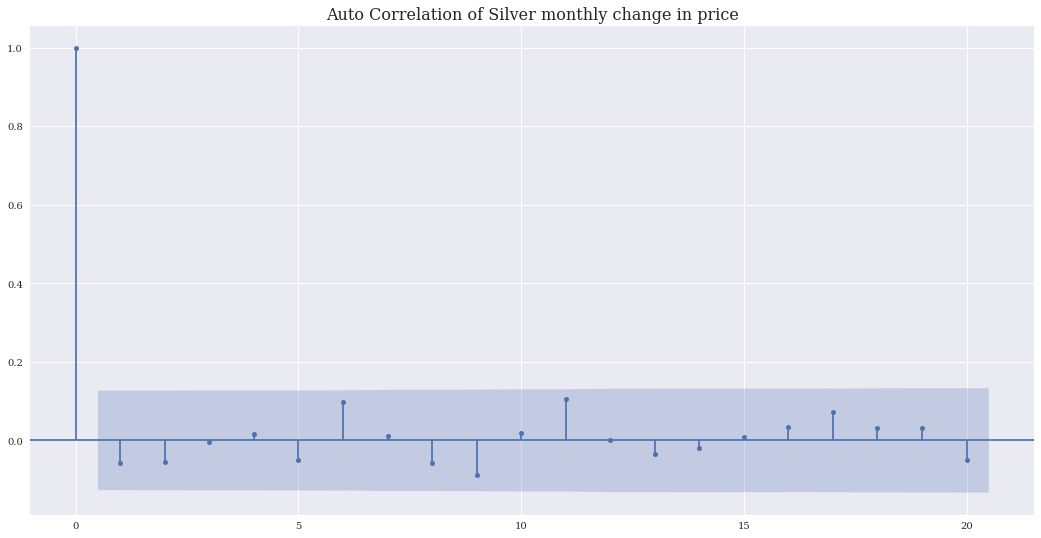

The approximate confidence interval is +/- 0.13


In [44]:
plot_acf(SL_monthly_change, alpha= 0.05, lags=20)
plt.title( 'Auto Correlation of Silver monthly change in price', fontsize = 16 )
plt.show()

nobs = len(SL_monthly_change)
conf = 1.96/sqrt(nobs)
print("The approximate confidence interval is +/- %4.2f" %(conf))

- **SERIAL CORRELATION**

The daily autocorrelation of Silve price change is -0.0276, weekly is 0.0066 and monthly is -0.0566. The daily and monthly autocorrelation show although very less negative autocorrelation. we can still say it is Mean reverting, however grows positive when we convert our data set to weekly when we analyse our data by weekly we can say that it shows Trend following.

- **IRREGULAR COMPONENT**

We used ACF to plot with approximate confidence interval +/- 0.03 for daily with 20 lags where it falls almost on 2 intervals outside the window. therefore be able to conclude there doesn't exist a white noise. however it isn't the case with our weekly and monthly change in price data with an approximate confidence interval  +/- 0.06 and +/- 0.13. all autocorrelation fall inside the window suggesting white noise.


# Convert daily data to Monthly

( we found that our data set could be made stationary using monthly data after trying daily and weekly, therefore we have just shown you directly the monthly conversion of our data set)

In [45]:
# Convert the daily data to weekly data
SL_monthly = SL_Historical_data.resample(rule='M').last()
SL_monthly.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2001-06-30,3.618683,3.652462,3.614460,3.624594,3.624594,442.518018
2001-07-31,3.555345,3.555345,3.555345,3.555345,3.555345,0.000000
2001-08-31,3.500453,3.521565,3.496230,3.514809,3.514809,454.341018
2001-09-30,3.924392,3.924392,3.924392,3.924392,3.924392,0.000000
2001-10-31,3.563790,3.563790,3.558723,3.558723,3.558723,0.000000


In [46]:
#log return of weekly adj close price

SL_Adj_Close_monthly = SL_monthly['Adj Close']

SL_Adj_monthly_Log = np.log(SL_Adj_Close_monthly)

SL_log_return_monthly = np.log(SL_monthly['Adj Close'] / SL_monthly['Adj Close'].shift(1))

SL_log_return_monthly =  SL_log_return_monthly.dropna()

SL_log_return_monthly.head()


Date
2001-07-31   -0.019290
2001-08-31   -0.011467
2001-09-30    0.110226
2001-10-31   -0.097809
2001-11-30   -0.020619
Freq: M, Name: Adj Close, dtype: float64

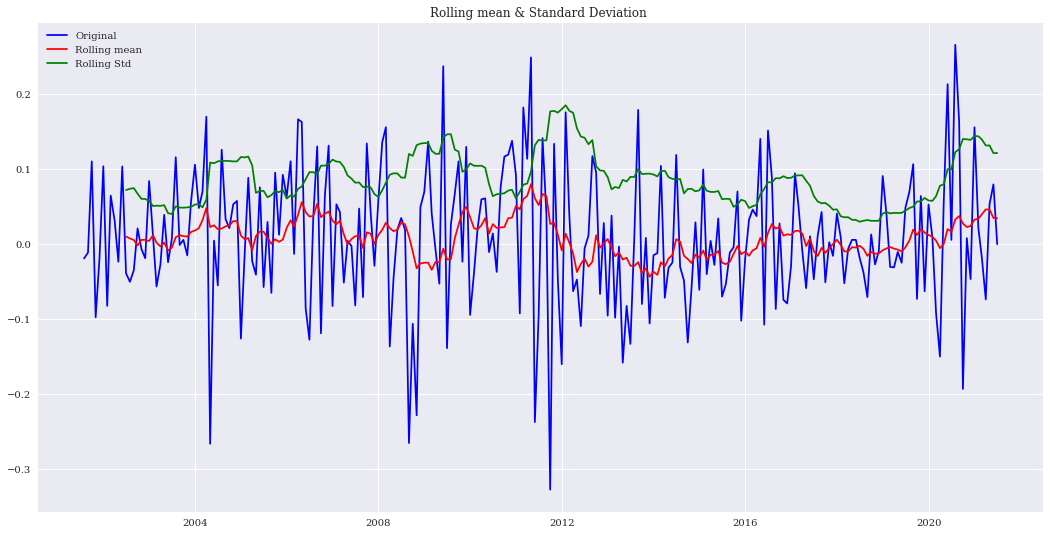

Results of Dickey fuller Test:
Test Statistic          -1.640351e+01
P-value                  2.624455e-29
lag used                 0.000000e+00
Number of observation    2.390000e+02
Critical Value(1%)      -3.458011e+00
Critical Value(5%)      -2.873710e+00
Critical Value(10%)     -2.573256e+00
dtype: float64


In [47]:
# testing stationarity 

test_stationarity_monthly (SL_log_return_monthly)

> Note that our data set it still not stationary as our P-Value is much high. therefore we tried to difference it further.

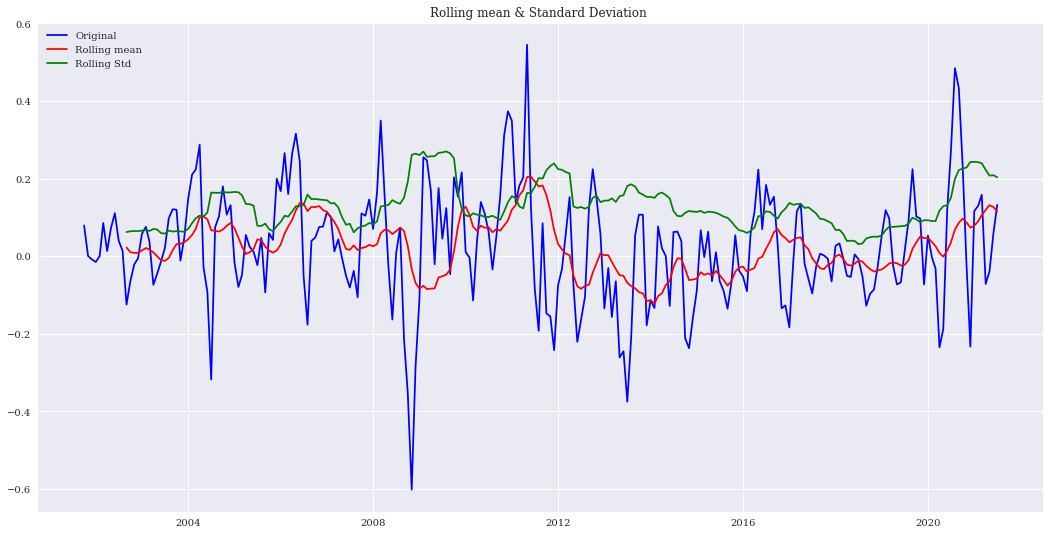

Results of Dickey fuller Test:
Test Statistic            -3.516017
P-value                    0.007585
lag used                  12.000000
Number of observation    225.000000
Critical Value(1%)        -3.459752
Critical Value(5%)        -2.874473
Critical Value(10%)       -2.573663
dtype: float64


In [48]:
## Differencing it thrice, as we found it to be more stationary after tring several parameters 

Difference_SL2 = np.log(SL_monthly['Adj Close']).diff(3)
Difference_SL2 = Difference_SL2.dropna()

# testing monthly stationarity
test_stationarity_monthly(Difference_SL2);

> we can now conclude that our data set is **stationary** to model it accordingly

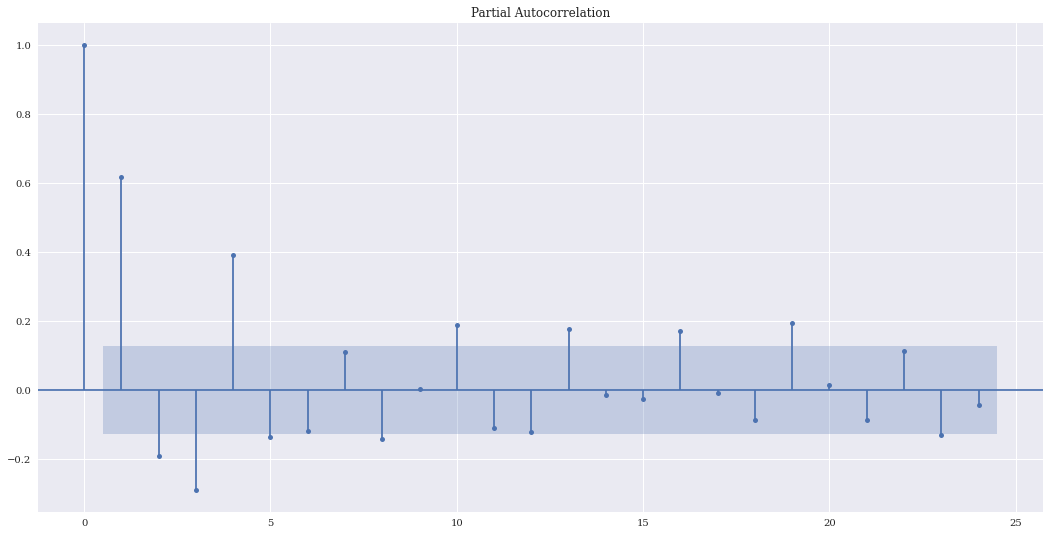

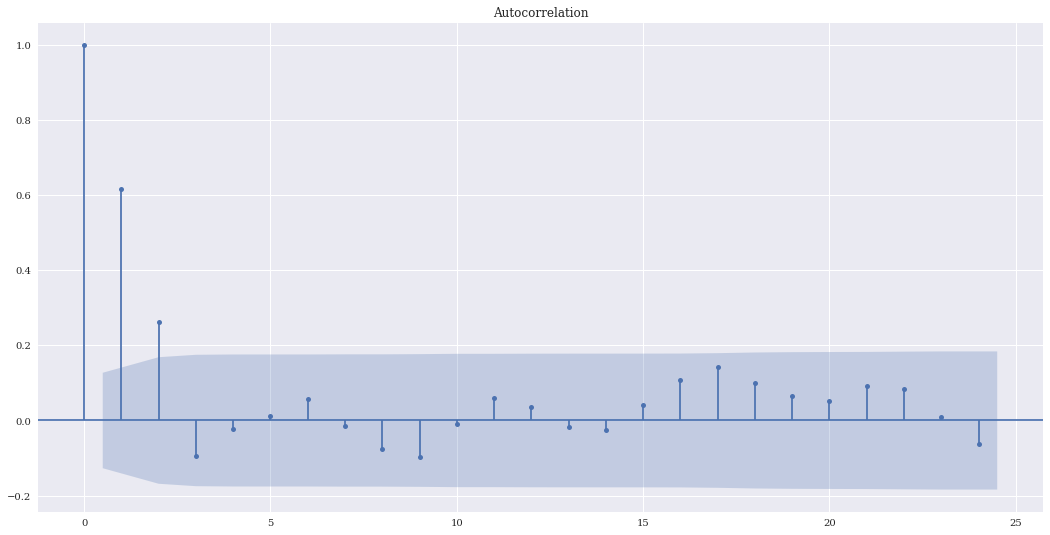

In [49]:
#plot 
plot_pacf(Difference_SL2);
plot_acf(Difference_SL2);

> PACF: We can determine and see that our PACF, have number of values falling ouside the window but is negative in lag-2 thereofore suggesting AR model 1.

> ACF: We also see that our ACF values falling outside the window on 2 interval therefore we can take 1 or 2 for our MA model. i.e - q

#### AIC and BIC
( lets see what our BIC suggests )

In [50]:
import warnings 
warnings.filterwarnings('ignore')

from statsmodels.tsa.stattools import arma_order_select_ic
arma_or_SL = sm.tsa.arma_order_select_ic(Difference_SL2, ic=["aic", "bic"], trend="nc")
arma_or_SL 

{'aic':             0           1           2
 0         NaN -307.394604 -450.788587
 1 -342.258767 -344.205194 -449.245063
 2 -348.379472 -350.303680 -448.044696
 3 -364.706822 -385.665160 -446.122646
 4 -401.850341 -401.712883 -444.333477,
 'bic':             0           1           2
 0         NaN -300.450062 -440.371775
 1 -335.314225 -333.788382 -435.355980
 2 -337.962660 -336.414597 -430.683342
 3 -350.817739 -368.303806 -425.289022
 4 -384.488987 -380.879259 -420.027583,
 'aic_min_order': (0, 2),
 'bic_min_order': (0, 2)}

> THE BIC and AIC both suggests the order 0 and 2, for p and q

### ARIMA 

                              ARMA Model Results                              
Dep. Variable:              Adj Close   No. Observations:                  238
Model:                     ARMA(0, 2)   Log Likelihood                 229.294
Method:                       css-mle   S.D. of innovations              0.090
Date:                Thu, 08 Jul 2021   AIC                           -450.587
Time:                        12:12:08   BIC                           -436.698
Sample:                    09-30-2001   HQIC                          -444.990
                         - 06-30-2021                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0235      0.017      1.347      0.178      -0.011       0.058
ma.L1.Adj Close     0.9916      0.022     45.642      0.000       0.949       1.034
ma.L2.Adj Close     1.0000      

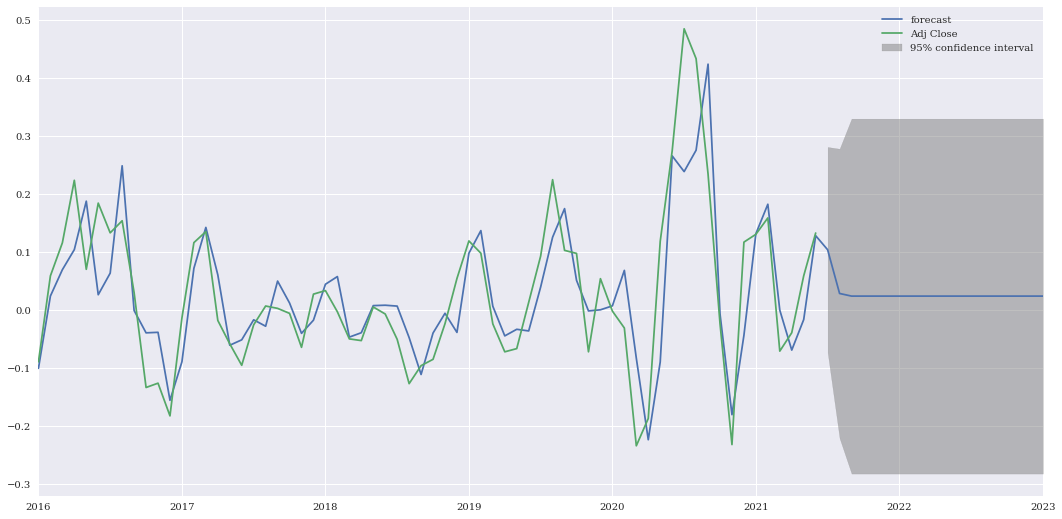

In [51]:
# fitting ARIMA Model


model_SL = ARIMA (Difference_SL2, order = (0, 0, 2))
results_ARIMA_SL = model_SL.fit(disp= 0)

results_ARIMA_SL.plot_predict(start='2016', end= '2023');

print(results_ARIMA_SL.summary())

> You can see that our ARIMA models are taking the original values much accurately, We have found the parameters (0,0,2) to be more suitable after running several paramaters. therefore the P-value in our summary shows it is less than 0.05 for MA with Lag 1 and lag 2

In [52]:
# dividing our predicted value by 3 since we differenced it 3 times

predictions_ARIMA_diff_SL = pd.Series(results_ARIMA_SL.fittedvalues, copy=True)/3

len(predictions_ARIMA_diff_SL)


238

In [53]:
# Conversion back to original form

SL_Adj_Close_LogScale = np.log(SL_Adj_Close)

#Adjusting it to our length 
SL_Adj_monthly_Log = SL_Adj_monthly_Log.tail(238)

CS_SL = predictions_ARIMA_diff_SL.cumsum()

predictions_ARIMA_log_SL = pd.Series(SL_Adj_monthly_Log.iloc[0], index = SL_Adj_monthly_Log.index)

predictions_ARIMA_log_SL = predictions_ARIMA_log_SL.add(CS_SL,fill_value = 0 ).dropna()

prediction_ARIMA_SL= np.exp(predictions_ARIMA_log_SL)

prediction_ARIMA_SL = pd.DataFrame({ 'Silver predicted values' : prediction_ARIMA_SL[prediction_ARIMA_SL.index > dt.datetime(2001, 1, 1)]})

prediction_ARIMA_SL.tail()

,Silver predicted values
Date,
2021-02-28,24.635421
2021-03-31,24.629281
2021-04-30,24.064203
2021-05-31,23.928244
2021-06-30,24.969350


> You can see our models values are quite close to the true paramerters ( Monthly )


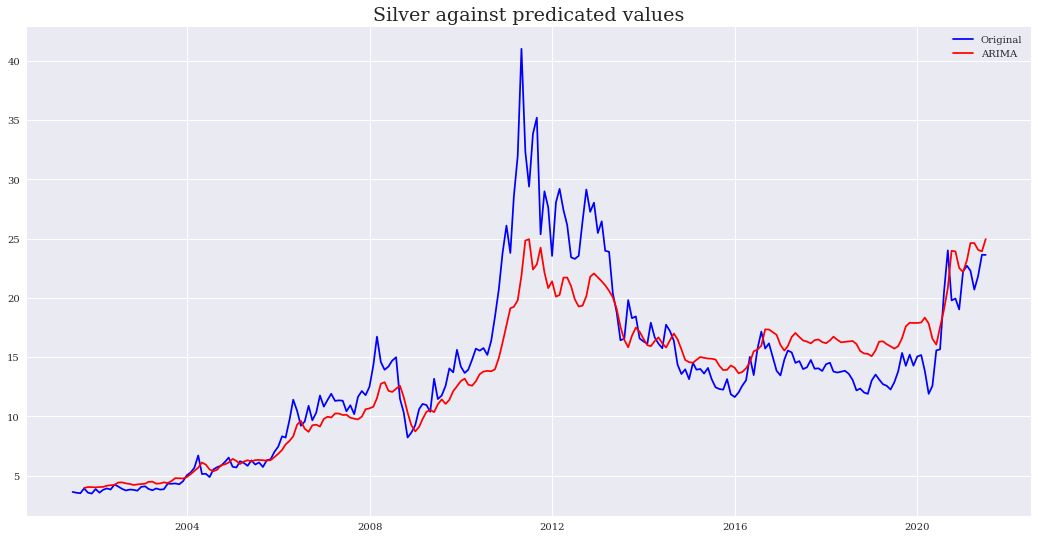

In [54]:
#plotting ARIMA modeled against Silver price

plt.plot(SL_Adj_Close_monthly, color = 'blue', label= 'Original')
plt.plot(prediction_ARIMA_SL, color='red', label= 'ARIMA') 
plt.title('Silver against predicated values', fontsize = '19')
plt.legend(loc ='best')
plt.show()

> You can also see here it had a better grasping on the pattern, Red line indicating ARIMA values and Blue line indicating the Original values (monthly) 

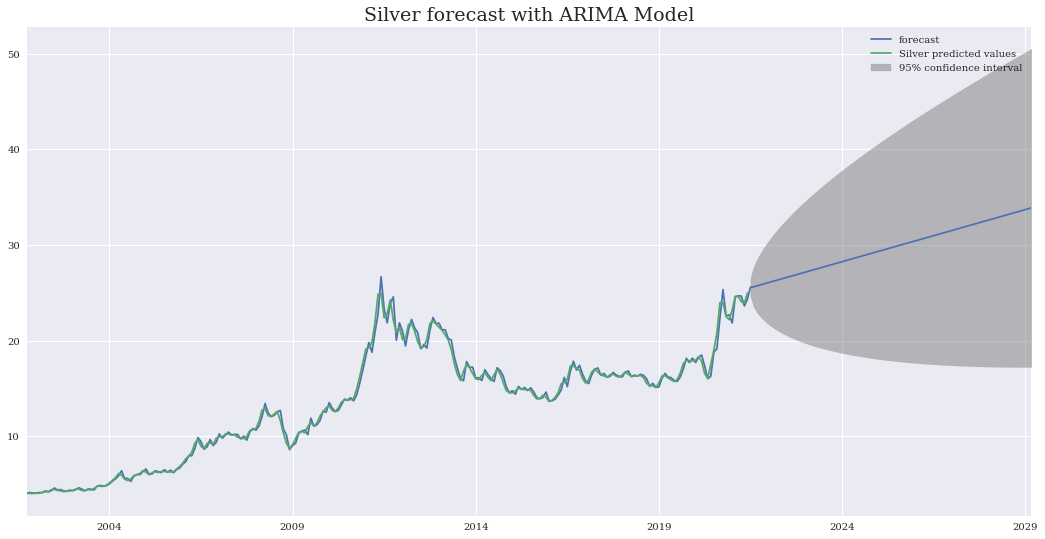

In [55]:
# Reffitting ARIMA to forecaste


model_SL = ARIMA (prediction_ARIMA_SL, order = (0, 1, 2))
results_ARIMA_SL = model_SL.fit(disp= 0)

# Since our length is 238 we can predict the next 100 months values as 338
results_ARIMA_SL.plot_predict(1,330)
plt.title('Silver forecast with ARIMA Model', fontsize = '19');


Overall We can say with 95% confidence that our Silver price for next 100 weeks show and gradual upward trend with stock price falling between  18€  and 50€  by the end of 2029. 

Note that our confidence interval gets wider as we try to forecaste longer.

Is it worth investing in silver now?

Although, silver has traded much lower since its record highs during the 2011 Eurozone debt crisis.
Markets are booming at the moment and the world seems to be doing pretty well economically. So in financial point of view the current boom in the markets is a good reason to be fearful. Silver as an investment could be a smart choice for the following reasons:

- Systemic Risks are the New Normal:

Never before has the global financial system been vulnerable to so many risks; bank failures, excessive public and private debt, massive budget and trade deficits, technological risks, speculative financial instruments, trade wars etc.
Buying silver could be one proven way of insulating your wealth from systemic risks that threaten to collapse the financial system yet again.

# S&P SmallCap 600 

The fund is an exchange traded fund (ETF) that aims to track the performance of the S&P SmallCap 600 Index as closely as possible. The ETF invests in physical index securities. The S&P SmallCap 600 Index offers exposure to 600 small cap US stocks which comply with S&P's size, liquidity, and free float criteria. The index is weighted by free float market capitalisation..

The iShares Core S&P Small-Cap ETF, with $56 billion in assets, is the biggest small-cap index fund on the market. The fund aims to track the performance of the S&P Small Cap 600 Index by holding a broad array of stocks.

In [56]:
# Importing Historical data of SnP Smallcap 600 from yahoo
# Since our data is already in euros we will not be dividing it by our converter

SnP_Historical_data = yf.download('IUS3.DE', data_source='yahoo', start='2009-06-10', end= '2021-06-10')
SnP_Historical_data

#2009 because the data is avaiable from late/mid 2008, ( 252 as our trading days in a year)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-06-10,13.240000,13.240000,13.240000,13.240000,13.240000,0
2009-06-11,13.460000,13.460000,13.460000,13.460000,13.460000,900
2009-06-12,13.460000,13.460000,13.460000,13.460000,13.460000,0
2009-06-15,13.460000,13.460000,13.460000,13.460000,13.460000,0
2009-06-16,13.460000,13.460000,13.460000,13.460000,13.460000,0
...,...,...,...,...,...,...
2021-06-03,76.430000,76.430000,75.239998,75.709999,75.709999,15259
2021-06-04,76.199997,76.199997,75.400002,75.480003,75.480003,5042
2021-06-07,75.830002,76.209999,75.519997,76.050003,76.050003,6776


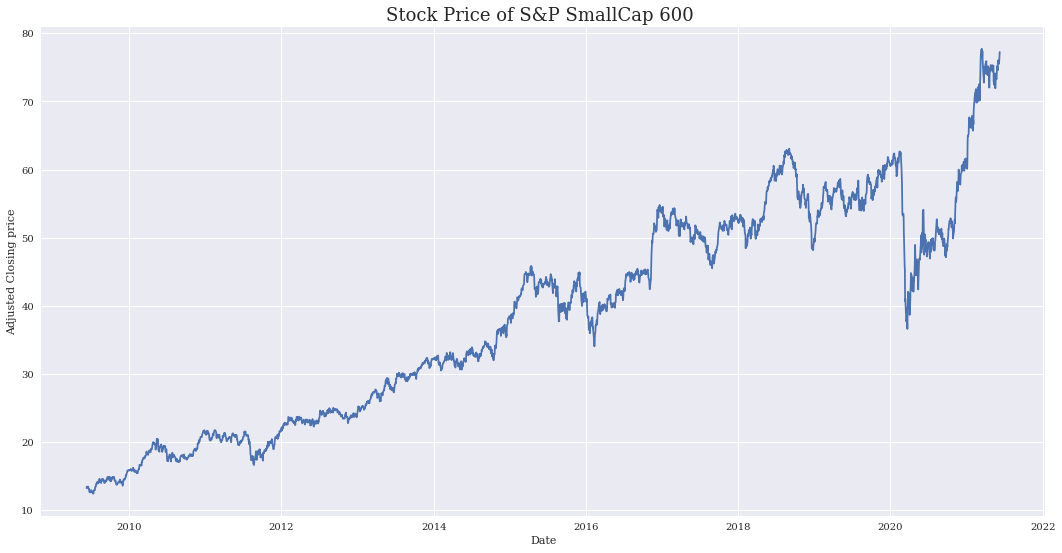

In [57]:
# calling only Adjusted closing price of S&P Smallcap 600

SnP_Adj_Close = SnP_Historical_data[["Adj Close"]].copy()
plt.xlabel("Date")
plt.ylabel("Adjusted Closing price")
plt.plot(SnP_Adj_Close)
plt.title( 'Stock Price of S&P SmallCap 600 ', fontsize = 18 );


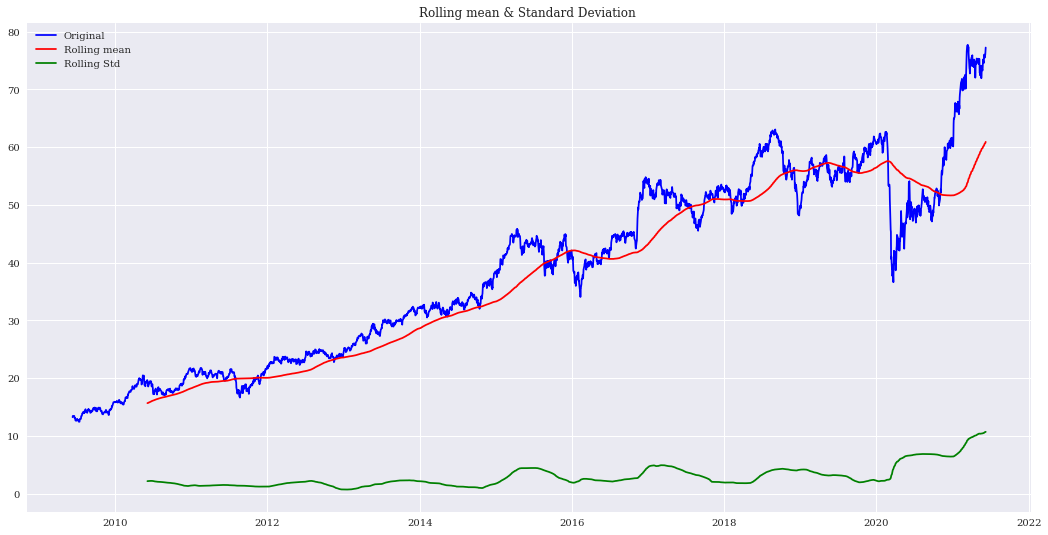

Results of Dickey fuller Test:
Test Statistic             -0.213600
P-value                     0.936881
lag used                   28.000000
Number of observation    3015.000000
Critical Value(1%)         -3.432521
Critical Value(5%)         -2.862499
Critical Value(10%)        -2.567281
dtype: float64


In [58]:
# tesing stationarity of our data set

test_stationarity_252(SnP_Adj_Close)

### Stationarity 

Our Data set contained a visually varring Mean and Standard diviation. which is not constant. Nonethless More precisely our P-Value is much higher than 0.05 and therefore we can accertian our data set is not stationary by any means.

###  Characteristics 

- **TREND** : 
  We can say from Rolling statistics our data cleary follows an uptrend up until 2020, and then a sudden fall to a all time low 
  since 2017 but quickly jumps back and recovers. We assume this sudden decline has to do with the CoronaVirus pandemic.  
  Nonetheless, if we discard this portion, we can still see that our data continues to follow an Uptrend.
 
  
 : Cut this to summary:
 During the March 2020 crash caused by the coronavirus pandemic, the values of small-cap stocks predictably fell faster than   
  the value of the broader market. But the small-cap stocks' prices also rebounded more quickly, especially after Pfizer 
  (NYSE:PFE) announced successful vaccine trials.
  variation spike during 2018 and also a rapid boost after 2021 to 3500 Euros followed by a fall to 1700 euros and slowing 
  recoring from that fall now set to 2195 as of 14.06.2021
  
- **SEASONALITY** : 
  We don't see any seasonal pattern to our data set of S&P smallcap 600. but however we can notice some cyclic pattern although 
  not seasonal but seem to be recurring around every 1.8- 1.9 years from 2015 to 2020. 
  

In [59]:
# computing the daily autocorrelation of S&P SmallCap 600 

SnP_adj_close = SnP_Historical_data['Adj Close']

SnP_change = SnP_adj_close.pct_change()

SnP_daily_change = SnP_change.dropna()

autocorrelation_SnP_daily = SnP_daily_change.autocorr()

print ("The daily autocorrelation of S&P Smallcap 600 is %4.4f" %(autocorrelation_SnP_daily))

The daily autocorrelation of S&P Smallcap 600 is 0.0071


In [60]:
# Computing Autocorrelation of Silver

SnP_adj_close = SnP_Historical_data['Adj Close']

# converting it to weekly

SnP_weekly_change = SnP_adj_close.resample(rule='W').last()

SnP_weekly_change = SnP_weekly_change.pct_change()

SnP_weekly_change = SnP_weekly_change.dropna()

autocorrelation_SnP_weekly = SnP_weekly_change.autocorr()

print ("The weekly autocorrelation of S&P Smallcap 600 is %4.4f" %(autocorrelation_SnP_weekly))

The weekly autocorrelation of S&P Smallcap 600 is -0.0326


In [61]:
# We do the same thing but with resampling our data into Mothly.

SnP_adj_close = SnP_Historical_data['Adj Close']

# Convert to monthly 

SnP_monthly_change = SnP_adj_close.resample(rule='M').last()

SnP_monthly_change = SnP_monthly_change.pct_change()

SnP_monthly_change = SnP_monthly_change.dropna()

autocorrelation_SnP_monthly = SnP_monthly_change.autocorr()

print ("The monthly autocorrelation of S&P Smallcap 600 is %4.4f" %(autocorrelation_SnP_monthly))

The monthly autocorrelation of S&P Smallcap 600 is 0.0169


### Autocorrelation function

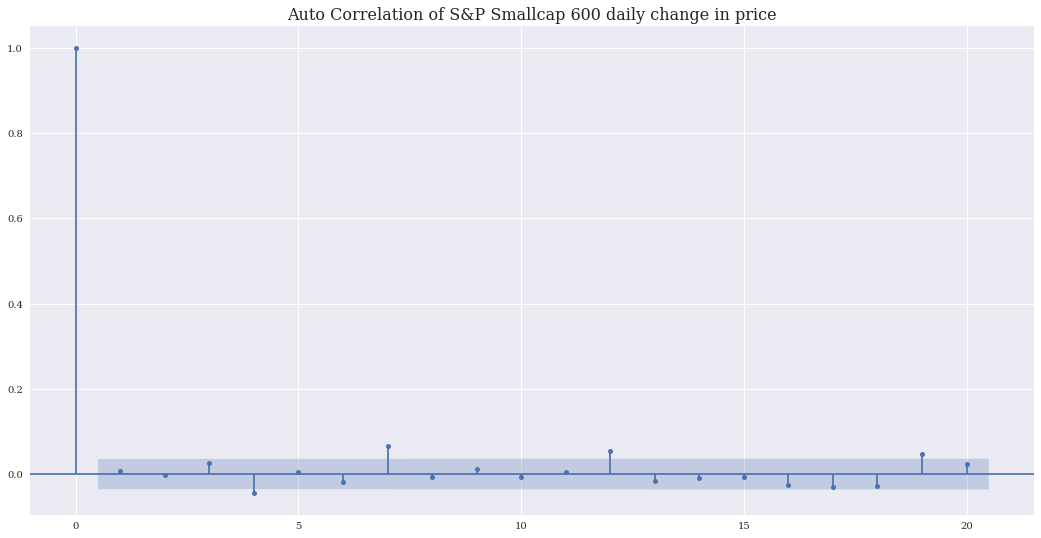

The approximate confidence interval is +/- 0.04


In [62]:
plot_acf(SnP_daily_change, alpha=0.05, lags=20)
plt.title( 'Auto Correlation of S&P Smallcap 600 daily change in price', fontsize = 16 )
plt.show()


#  the number of observations in the returns DataFrame using the len() function.
nobs = len(SnP_daily_change)

# the standard deviation of the ACF is 0.1, and since 95% of a normal curve is between +1.96 and -1.96 standard 
# deviations from the mean, the 95% confidence interval is
conf = 1.96/sqrt(nobs)

print("The approximate confidence interval is +/- %4.2f" %(conf))

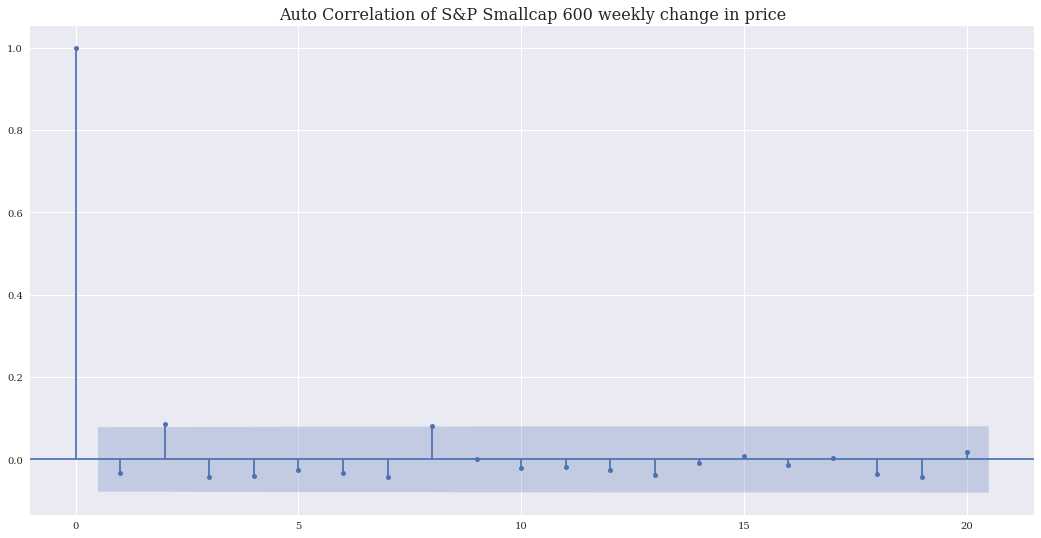

The approximate confidence interval is +/- 0.08


In [63]:
plot_acf(SnP_weekly_change, lags=20)
plt.title( 'Auto Correlation of S&P Smallcap 600 weekly change in price', fontsize = 16 )
plt.show()

nobs = len(SnP_weekly_change)
conf = 1.96/sqrt(nobs)
print("The approximate confidence interval is +/- %4.2f" %(conf))

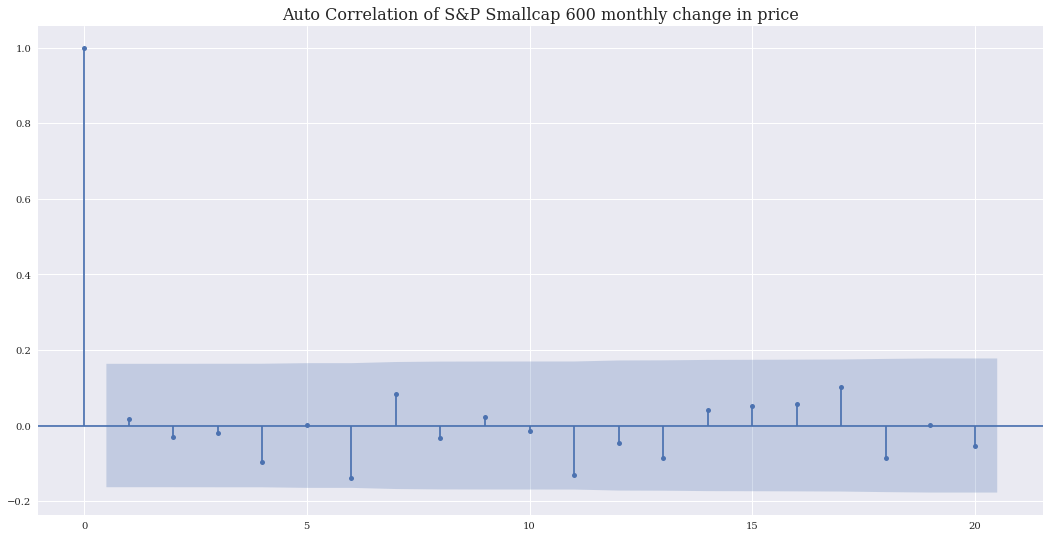

The approximate confidence interval is +/- 0.16


In [64]:
plot_acf(SnP_monthly_change, alpha= 0.05, lags=20)
plt.title( 'Auto Correlation of S&P Smallcap 600 monthly change in price', fontsize = 16 )
plt.show()

nobs = len(SnP_monthly_change)
conf = 1.96/sqrt(nobs)
print("The approximate confidence interval is +/- %4.2f" %(conf))

- **SERIAL CORRELATION**

  The daily autocorrelation of S&P Smallcap 600 price change is 0.0071, weekly  
  is -0.0326 and monthly is 0.0169. The weekly autocorrelation show although very less negative autocorrelation. we can still 
  say it is Mean reverting, 
  However shows positive when we see our data set from daily and monthly analysis and therefore show - Trend following.


- **IRREGULAR COMPONENT**
  
  We used ACF to plot with approximate confidence interval +/- 0.04 and +/- 0.08 for daily and weekly with 20 lags. we see on 3 
  and 2 interval our data set fall ouside the window for the respective data set. therefore suggesting there doesn't exist a 
  white noise. however it isn't the case with our monthly change in price data with an approximate confidence interval +/- 0.16. 
  all autocorrelation fall inside the window suggesting white noise.

# Differencing previous Value - Return

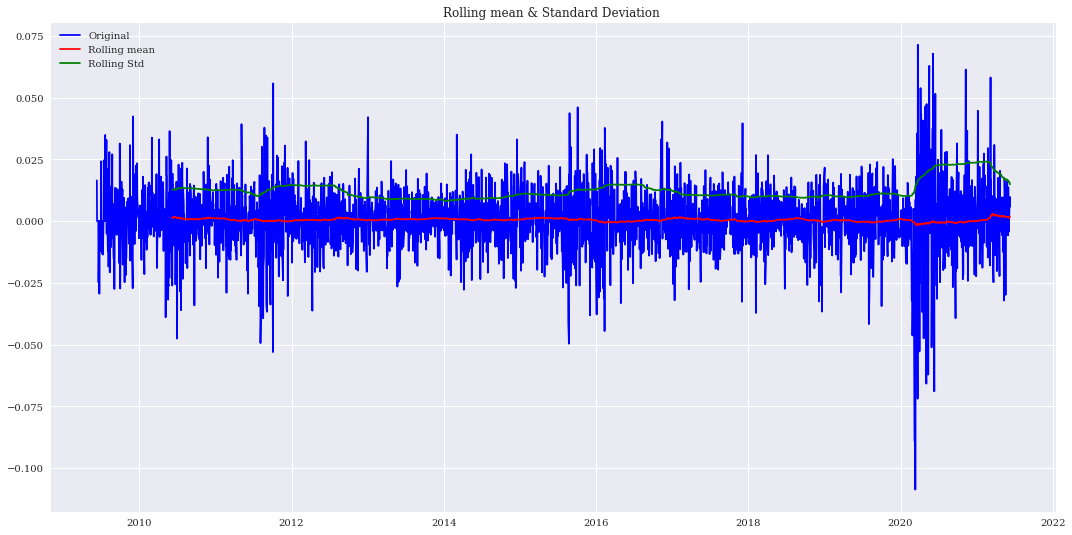

Results of Dickey fuller Test:
Test Statistic          -1.074904e+01
P-value                  2.694813e-19
lag used                 2.700000e+01
Number of observation    3.015000e+03
Critical Value(1%)      -3.432521e+00
Critical Value(5%)      -2.862499e+00
Critical Value(10%)     -2.567281e+00
dtype: float64


In [65]:
# Computing log return
SnP_Log_return = np.log(SnP_Historical_data['Adj Close'] / SnP_Historical_data['Adj Close'].shift(1))
SnP_Log_return.dropna(inplace=True)
test_stationarity_252(SnP_Log_return)

> Our P-Value are much higher than 0.05 althouh the rolling mean seems to be constant over time. ( it shows that In these senarios the ADF test significance )

# Convert daily data to weekly

( we found that our data set could be made stationary using weekly data after trying daily, therefore we have just shown you directly the weekly conversion of our data set)

In [66]:
# Convert the daily data to weekly data
SnP_Weekly = SnP_Historical_data.resample(rule='W').last()
SnP_Weekly.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-05-16,73.599998,73.919998,73.209999,73.720001,73.720001,6487
2021-05-23,73.029999,74.059998,72.970001,73.699997,73.699997,5553
2021-05-30,75.779999,75.930000,74.779999,75.010002,75.010002,20329
2021-06-06,76.199997,76.199997,75.400002,75.480003,75.480003,5042
2021-06-13,77.610001,77.610001,76.970001,77.250000,77.250000,24094


In [67]:
#log return of weekly adj close price

SnP_log_return_weekly = np.log(SnP_Weekly['Adj Close'] / SnP_Weekly['Adj Close'].shift(1))
SnP_Adj_Close_LogScale = np.log(SnP_Adj_Close)
SnP_log_return_weekly =  SnP_log_return_weekly.dropna()
SnP_log_return_weekly.head()


Date
2009-06-21   -0.024823
2009-06-28   -0.038033
2009-07-05    0.011797
2009-07-12   -0.026943
2009-07-19    0.039375
Freq: W-SUN, Name: Adj Close, dtype: float64

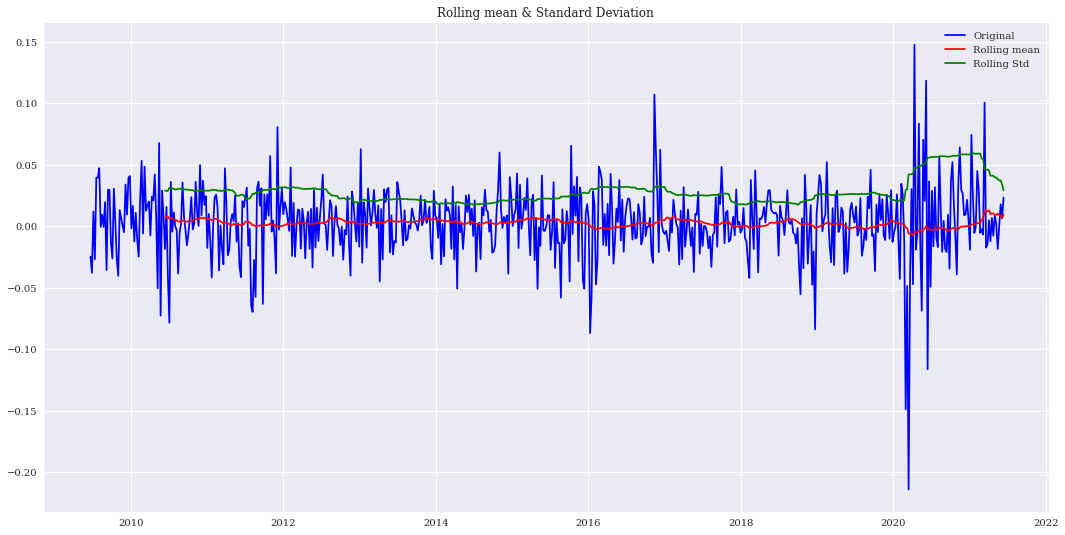

Results of Dickey fuller Test:
Test Statistic          -1.630521e+01
P-value                  3.236566e-29
lag used                 1.000000e+00
Number of observation    6.240000e+02
Critical Value(1%)      -3.440873e+00
Critical Value(5%)      -2.866183e+00
Critical Value(10%)     -2.569243e+00
dtype: float64


In [68]:
# testing stationarity ( weekly)
test_stationarity_weekly(SnP_log_return_weekly)

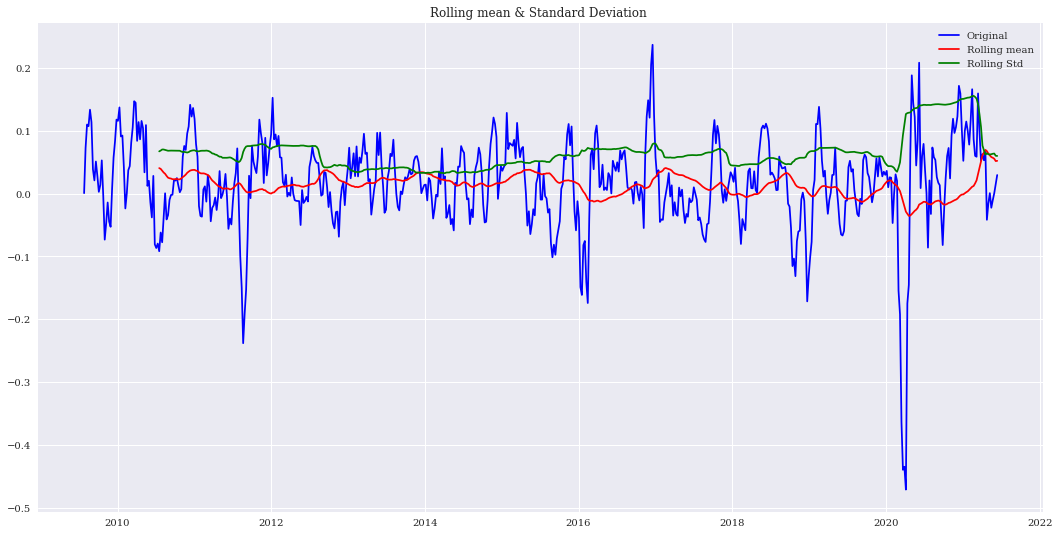

Results of Dickey fuller Test:
Test Statistic            -5.000335
P-value                    0.000022
lag used                  18.000000
Number of observation    602.000000
Critical Value(1%)        -3.441259
Critical Value(5%)        -2.866353
Critical Value(10%)       -2.569333
dtype: float64


In [69]:
## Differencing it six times to make our data set stationary 

Difference_SnP = np.log(SnP_Weekly['Adj Close']).diff(6)
Difference_SnP = Difference_SnP.dropna()

test_stationarity_weekly(Difference_SnP);

> You can see from the ADF our P-value is now showing less than 0.05. Therefore we can not say that it is stationary and use this to model our ARIMA.

## ACF and PACF

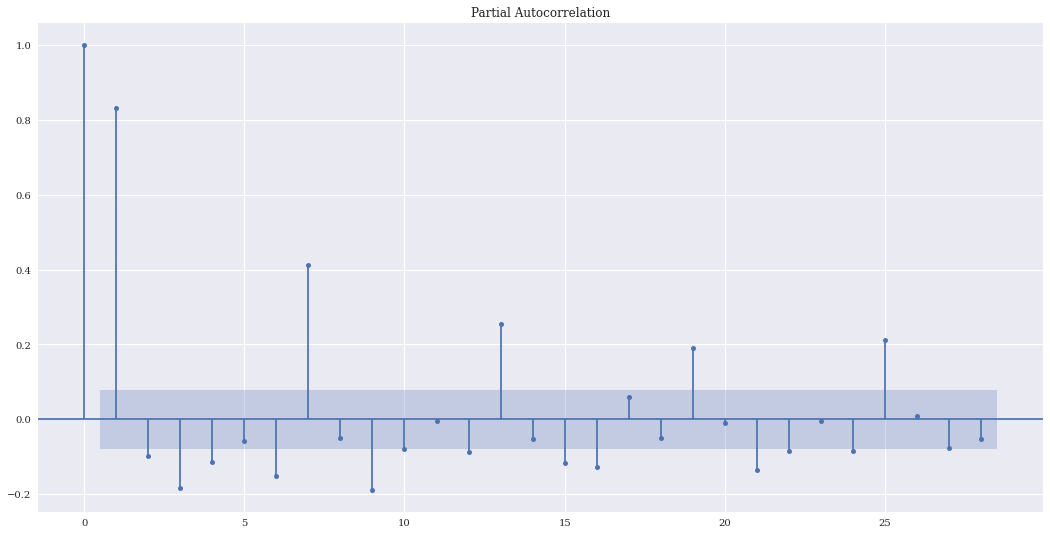

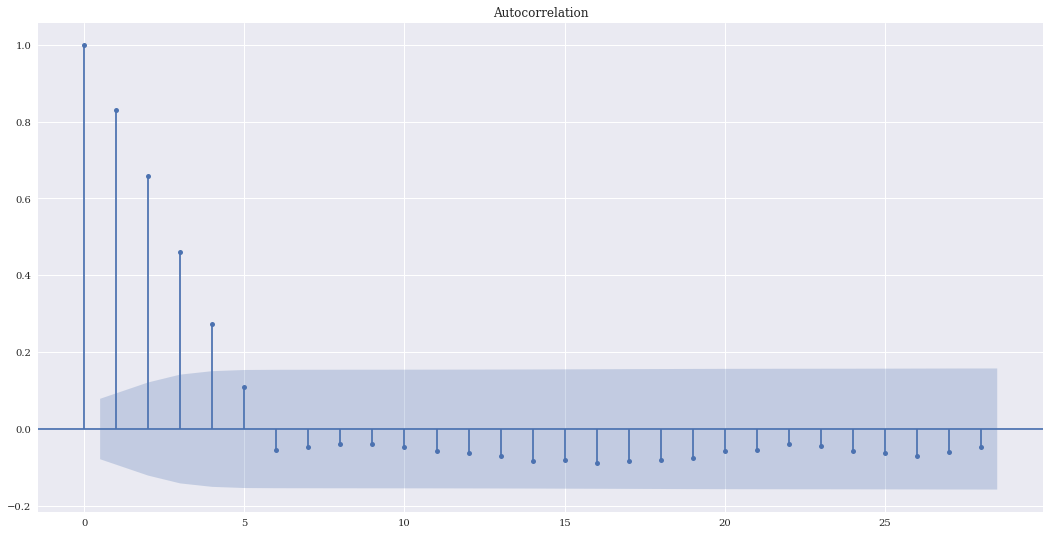

In [70]:
# plot 

plot_pacf(Difference_SnP);
plot_acf(Difference_SnP);

> PACF: We can determine and see that our PACF, have number of values falling ouside the window but is negative in lag-2 but stays negative for next 3 -4 intervals before showing positive. It's is hard to determine the p value here however we can try between 1-4 i.e - p

> ACF: We also see that our ACF values falling outside the window on 4 interval therefore we can take 1-4 for our MA model. i.e - q

###  AIC and BIC

In [71]:
import warnings 
warnings.filterwarnings('ignore')

from statsmodels.tsa.stattools import arma_order_select_ic
arma_or_SnP = sm.tsa.arma_order_select_ic(Difference_SnP, ic=["aic", "bic"], trend="nc")
arma_or_SnP

{'aic':              0            1            2
 0          NaN -1924.950298 -2200.838185
 1 -2226.747018 -2228.608544 -2240.530479
 2 -2230.179965 -2245.358059 -2255.872347
 3 -2247.485845 -2252.438370 -2359.768785
 4 -2252.062744 -2311.266320 -2308.436227,
 'bic':              0            1            2
 0          NaN -1916.087635 -2187.544192
 1 -2217.884356 -2215.314551 -2222.805155
 2 -2216.885972 -2227.632734 -2233.715692
 3 -2229.760521 -2230.281714 -2333.180799
 4 -2229.906089 -2284.678334 -2277.416910,
 'aic_min_order': (3, 2),
 'bic_min_order': (3, 2)}

> Our BIC and AIC both suggests a model of 3,2 for p and q parameters.

                              ARMA Model Results                              
Dep. Variable:              Adj Close   No. Observations:                  621
Model:                     ARMA(2, 2)   Log Likelihood                1136.588
Method:                       css-mle   S.D. of innovations              0.039
Date:                Thu, 08 Jul 2021   AIC                          -2261.177
Time:                        12:12:15   BIC                          -2234.589
Sample:                    07-26-2009   HQIC                         -2250.843
                         - 06-13-2021                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0168      0.006      2.818      0.005       0.005       0.028
ar.L1.Adj Close     1.5074      0.066     22.811      0.000       1.378       1.637
ar.L2.Adj Close    -0.6522      

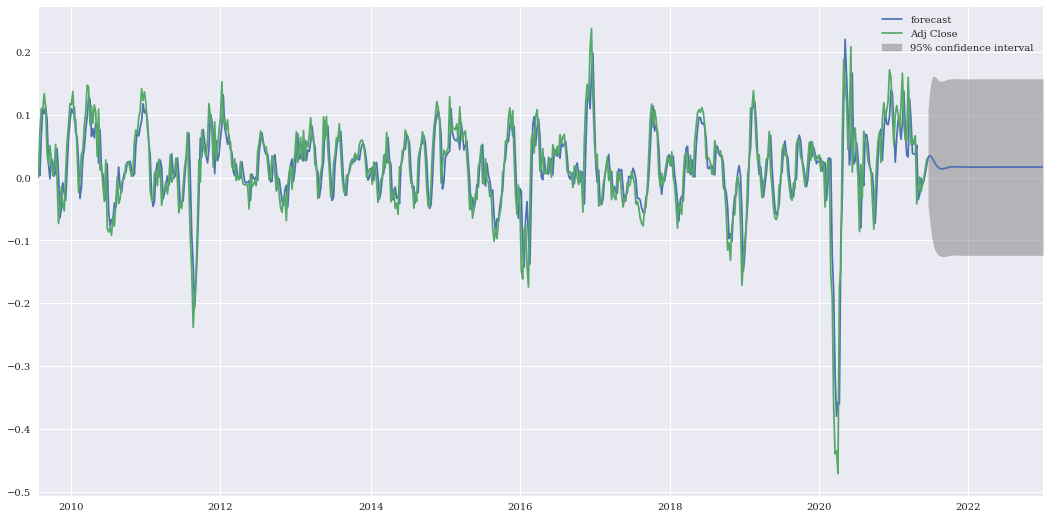

In [72]:
# ARIMA , we found that 2, 2 for our p and q more precise

model2_SnP = ARIMA (Difference_SnP, order = (2, 0, 2))
results_ARIMA_SnP = model2_SnP.fit(disp= 0)

results_ARIMA_SnP.plot_predict(start='2009', end= '2023');

print(results_ARIMA_SnP.summary())

You can see that our ARIMA models are taking the original values much accurately, We have found the parameters (2,0,2) to be more suitable after running several paramaters. therefore the P-value in our summary shows it is less than 0.05 for AR and MA with Lag 1 and lag 2


In [73]:
# Converting back our values to a series and dividing it by 6 as we differenced it 6 times
predictions_AR_diff_SnP = pd.Series(results_ARIMA_SnP.fittedvalues, copy=True)/6

#length of our series
len(predictions_AR_diff_SnP)

621

In [74]:
# Converting back 

CS_SnP = predictions_AR_diff_SnP.cumsum()

SnP_Adj_Close_Weekly = SnP_Weekly['Adj Close']
SnP_Adj_Weekly_Log = np.log(SnP_Adj_Close_Weekly)

#Adjusting our length
SnP_Adj_Weekly_Log1 = SnP_Adj_Weekly_Log.tail(621)

predictions_ARIMA_log_SnP = pd.Series(SnP_Adj_Weekly_Log1.iloc[0], index = SnP_Adj_Weekly_Log1.index)

predictions_ARIMA_log_SnP = predictions_ARIMA_log_SnP.add(CS_SnP,fill_value = 0 )

prediction_ARIMA_SnP= np.exp(predictions_ARIMA_log_SnP)

prediction_ARIMA_SnP = pd.DataFrame({ 'S&P SmallCap 600 predicted values' : prediction_ARIMA_SnP[prediction_ARIMA_SnP.index > dt.datetime(2001, 1, 1)]})

prediction_ARIMA_SnP.tail()

,S&P SmallCap 600 predicted values
Date,
2021-05-16,77.619728
2021-05-23,77.474895
2021-05-30,77.424078
2021-06-06,77.518582
2021-06-13,77.783383


> You can see our models values very close to the true paramerters ( Weekly )

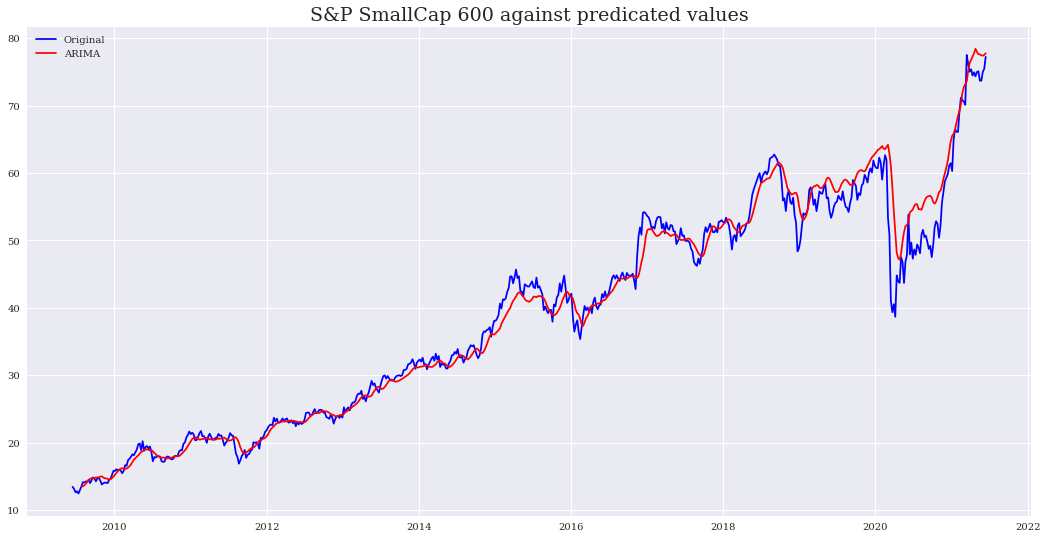

In [75]:
plt.plot(SnP_Adj_Close_Weekly, color = 'blue', label= 'Original')
plt.plot(prediction_ARIMA_SnP, color='red', label= 'ARIMA' );
plt.title('S&P SmallCap 600 against predicated values', fontsize = '19')
plt.legend(loc ='best');

> You can also see here it had grasped much more accurately than any of our previous modeled ARIMA on the pattern, Red line indicating ARIMA values and Blue line indicating the Original values (weekly)

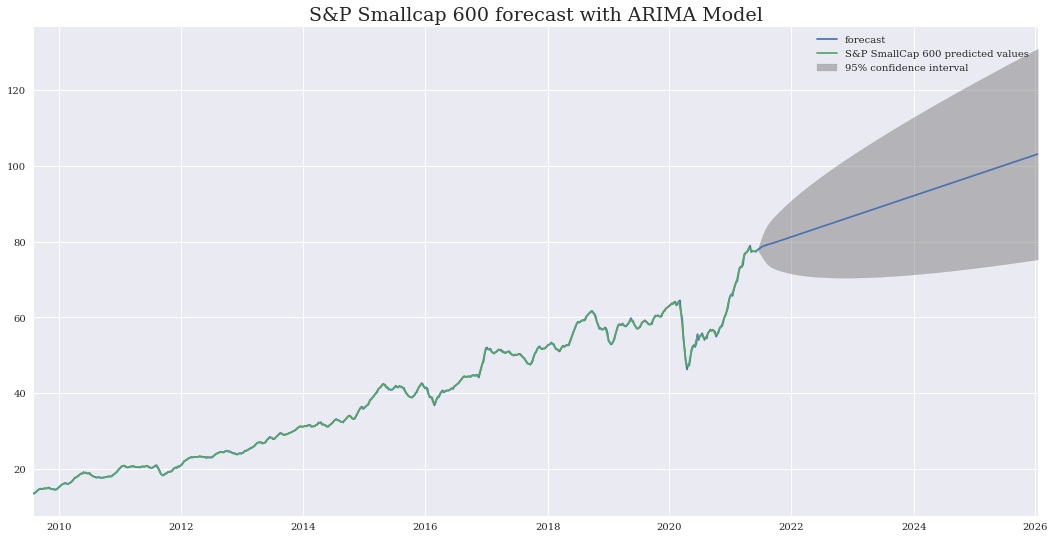

In [76]:
# Reffitting ARIMA to forecaste

model_SnP = ARIMA (prediction_ARIMA_SnP, order = (3, 1, 2))
results_ARIMA_SnP = model_SnP.fit(disp= 0)

# Since our length is 620 we can predict the next 240 weeks values as 860
results_ARIMA_SnP.plot_predict(1,860)
plt.title('S&P Smallcap 600 forecast with ARIMA Model', fontsize = '19');

Overall We can say with 95% confidence that our Our S&P SmallCap 600 continue to show gradual upward trend , stock price lying between around 77 euros and 130 Euros by the end of 2026.(95% confidence)

Note that our confidence interval gets wider as we try to forecaste longer.

- Portfolio diversification:

Investing in a small-cap index fund exposes your portfolio to a large number of small-cap stocks, which diversifies your holdings. Diversified portfolios generally perform better than non-diversified holdings because owning the stocks of many different companies ensures that your portfolio's performance is not strongly correlated with the performance of any specific stock.

- Risk reduction: 

While small-cap stocks can be risky, as they tend to move cyclically with the broader economic cycle and can be more volatile than large-cap stocks, investing in an index fund eliminates some of the risk since the fund gives you a stake in dozens of companies.



_______________________________________________________________________________________________________________________________

##  RISK AND RETURN

In investing, risk and return are highly correlated. Increased potential returns on investment usually go hand-in-hand with increased risk

Risk refers to the variability of possible returns associated with a given investment. Risk, along with the return, is a major consideration in capital budgeting decisions.

Higher levels of return are required to compensate for increased levels of risk. In other words, the higher the risk undertaken, the more ample the return – and conversely, the lower the risk, the more modest the return.


In [77]:
# importing date time to index our data
import datetime as dt

In [78]:
# Using pandas dataframe and .join to join and index our stocks ETH, Silver and S&P smallcap 600

data = pd.DataFrame({ 'S&P Small Cap 600' :
SnP_Historical_data['Adj Close'][SnP_Historical_data.index > dt.datetime(2001, 1, 1)]})                     

data = data.join(pd.DataFrame({'Ethereum' :
                               
ETH_historical_data['Adj Close'][ETH_historical_data.index > dt.datetime(2001, 1, 1)]}))

data = data.join(pd.DataFrame({'Silver' :
                               
SL_Historical_data['Adj Close'][SL_Historical_data.index > dt.datetime(2001, 1, 1)]}))

# we have further used .dropna function to drop the row of the values where ever there occurs any Nan values

data = data.dropna()

data.tail()

,S&P Small Cap 600,Ethereum,Silver
Date,,,
2021-06-03,75.709999,2411.154395,23.189970
2021-06-04,75.480003,2270.180825,23.543816
2021-06-07,76.050003,2187.477345,23.646845
2021-06-08,76.800003,2125.977084,23.405319
2021-06-09,77.250000,2202.681645,23.633334


> You  see that now our data set contains values from 2016-06.09 to 2016.06.09 to 2021.06.10. exactly 5 years

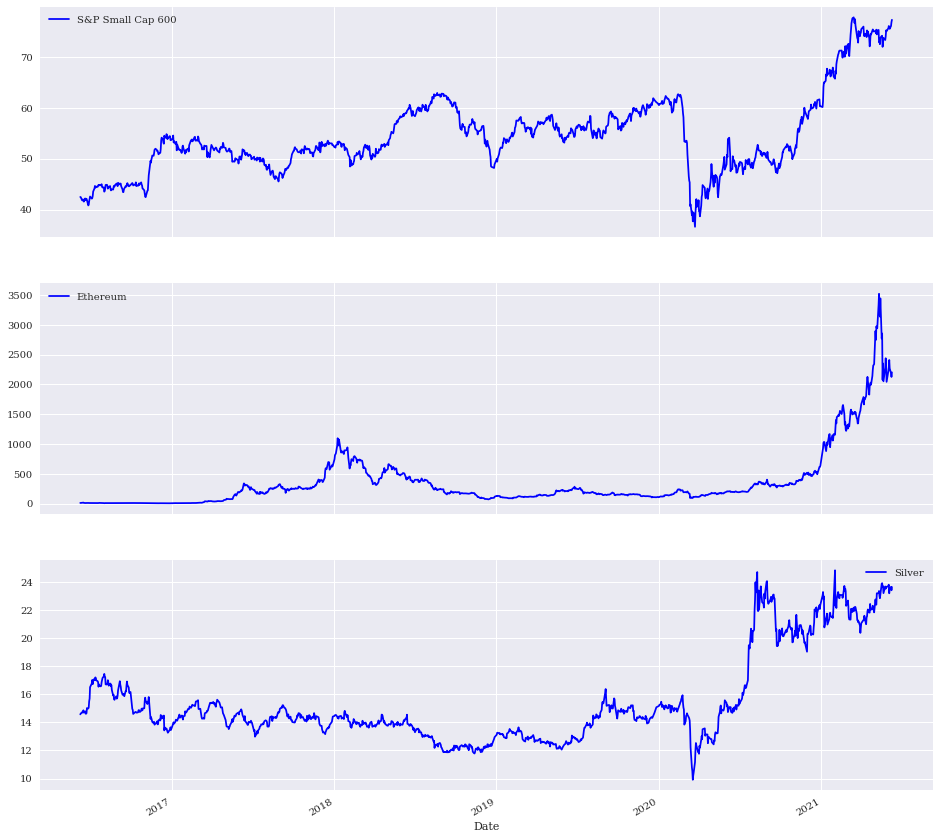

In [79]:
# plotting ouy stock price of underlying asset

data.plot(subplots=True, grid=True, style='b', figsize=(16, 16))
plt.show()

In [80]:
# #CALCULATING A SECURITY'S RISK

#we take the logarithmic returns because we will examine each company separately in the given time frame,
#and this approach will tell us more about the behavior of the stock.

sec_returns = np.log(data / data.shift(1)).dropna()
sec_returns.tail()

,S&P Small Cap 600,Ethereum,Silver
Date,,,
2021-06-03,-0.004349,0.053598,-0.026095
2021-06-04,-0.003042,-0.060246,0.015143
2021-06-07,0.007523,-0.037111,0.004366
2021-06-08,0.009814,-0.028517,-0.010266
2021-06-09,0.005842,0.035444,0.009695


**Simple return**

$$
\frac{P_1 - P_0}{P_0} = \frac{P_1}{P_0} - 1
$$

Where stands for Price of stock 

In [81]:
# Caluculating Simple Return of our underlying assets 

simple_return = (data / data.shift(1)) - 1
simple_return.dropna().tail()

,S&P Small Cap 600,Ethereum,Silver
Date,,,
2021-06-03,-0.004340,0.055061,-0.025758
2021-06-04,-0.003038,-0.058467,0.015259
2021-06-07,0.007552,-0.036430,0.004376
2021-06-08,0.009862,-0.028115,-0.010214
2021-06-09,0.005859,0.036080,0.009742


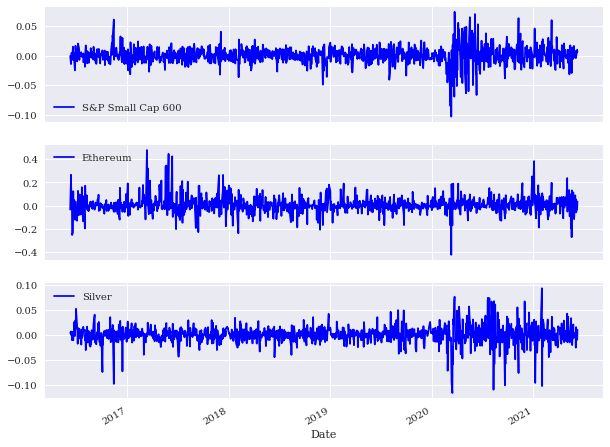

In [82]:
# plotting our simple returns

simple_return.plot(subplots=True, grid=True, style='b', figsize=(10, 8));


> you can see from our graph S&P small cap and Silver have less volatility during the years from 2016 till early 2020 and intrestingly the returns have high volatility after first quater of 2020, including ethereum where all return hit a max all time low, we assume this could be because of the Covid- pandemic 

### Log Return 

$$
ln(\frac{P_t}{P_{t-1}})
$$

In [83]:
# Calculating log return using numpy .log 

returns = np.log(data / data.shift(1))
returns.dropna()

,S&P Small Cap 600,Ethereum,Silver
Date,,,
2016-06-10,-0.000706,-0.034624,0.003587
2016-06-13,-0.014474,0.235545,0.006505
2016-06-14,-0.000957,0.070750,-0.001033
2016-06-15,0.004773,-0.028938,0.004527
2016-06-16,-0.003817,0.114874,0.005986
...,...,...,...
2021-06-03,-0.004349,0.053598,-0.026095
2021-06-04,-0.003042,-0.060246,0.015143
2021-06-07,0.007523,-0.037111,0.004366


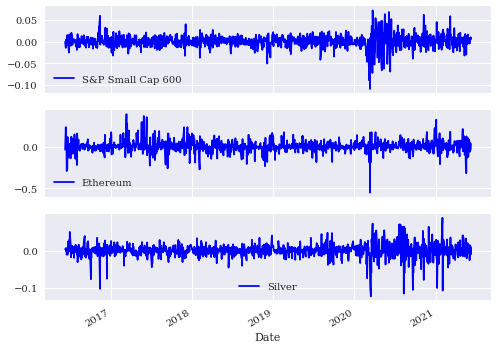

In [84]:
# plotting our log returns

returns.plot(subplots=True, grid=True, style='b', figsize=(8, 6));

you can  also again see from our graph S&P small cap and Silver have less volatility compare to simple during the years from 2016 till early 2020 and more importantly, S&P small cap has a minus 10% on a single day where as and silver has a minus 10% on a single day on several occasions. however ethereum shows the highest drop in percentage a minus 50% and above on a single day this is surely something to condsider when we are trying to estimate the volatility of our stock. 



**Daily Expected Rate Return of our portfolio**

S&P Small Cap 600    0.000490
Ethereum             0.004262
Silver               0.000396
dtype: float64


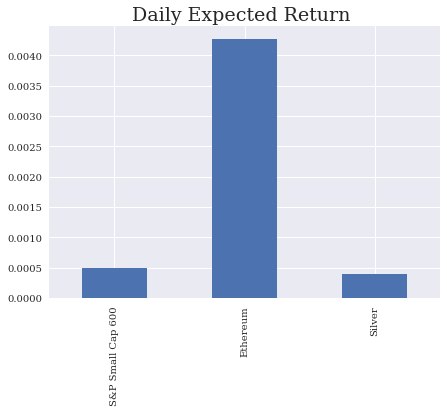

In [85]:
# Calculating the mean of our daily log returns using .mean()

daily_returns_mean = returns.mean()
print (daily_returns_mean);

daily_returns_mean.plot(kind='bar', figsize=(7, 5))
plt.title('Daily Expected Return ', fontsize = '19');

> We see that our daily returns for Ethereum are much higher than Silver and S&P Small cap 600. where are the daily returns for silver and S&P Small cap 600 are pretty much close to each other.

**Annual Expected Rate Return of our portfolio**

S&P Small Cap 600     12.352
Ethereum             107.396
Silver                 9.991
dtype: float64


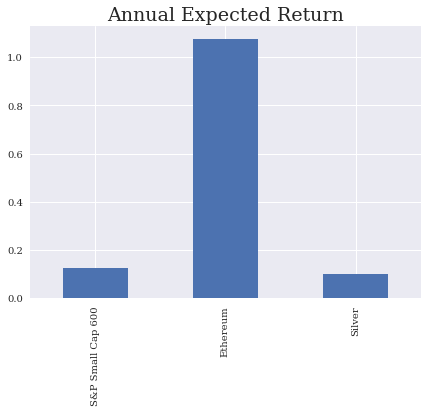

In [86]:
# calculating annual return, note that we used 252 days as we already have Ethereum's 365 days data as around 252 days.

# 252 trading days average ( 5 days a week)

annual_returns = returns.mean() * 252
print (str(round(annual_returns, 5) * 100))

annual_returns.plot(kind='bar', figsize=(7, 5))
plt.title('Annual Expected Return', fontsize = '19');

> You can see that our annual return on investment of S&P small stock 600 and silver lie around 10% , which is not the case for ethereum however, where our annual return is more than 100% which is 10 times higher than our rest two stock. but could also mean that it as stocks with higher rate of return tend to have righer rate of risk involved.

**Risk Portfolio**

S&P Small Cap 600     23.216
Ethereum             111.566
Silver                29.205
dtype: float64


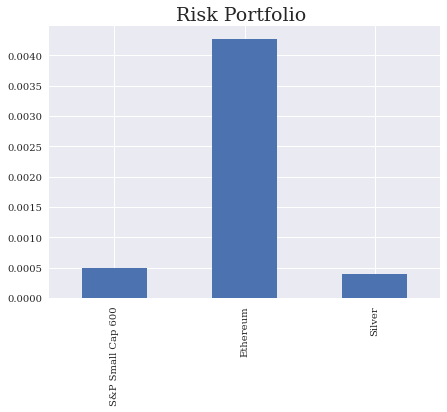

In [87]:
# we calculate the standard deviation of our annual mean values to measure risk
# and by raised to the power of 0.5, it will take the square root of 252 
# because standard deviation is square root of the variance.


Risk_portfolio = returns[['S&P Small Cap 600', 'Ethereum', 'Silver']].std() * 252 ** 0.5
print (str(round(Risk_portfolio, 5) * 100));

daily_returns_mean.plot(kind='bar', figsize=(7, 5))
plt.title('Risk Portfolio ', fontsize = '19');

> We can see that our standard divation measurement of risk follows much higher for risk for Ethereum than S&P small cap 600 and Silver in contrast to our return. Hence per se higher return involes higher volatility of Risk.

### COVARIANCE AND CORRELATION¶

Covariance is a measure to indicate the extent to which two random variables change in tandem.
Correlation is a measure used to represent how strongly two random variables are related to each other.

Covariance is nothing but a measure of correlation.
Correlation refers to the scaled form of covariance.

Covariance can vary between -∞ and +∞
Correlation ranges between -1 and +1

\begin{eqnarray*}
Covariance Matrix: \  \   
\Sigma = \begin{bmatrix}
        \sigma_{1}^2 \ \sigma_{12} \ \dots \ \sigma_{1I} \\
        \sigma_{21} \ \sigma_{2}^2 \ \dots \ \sigma_{2I} \\
        \vdots \ \vdots \ \ddots \ \vdots \\
        \sigma_{I1} \ \sigma_{I2} \ \dots \ \sigma_{I}^2
    \end{bmatrix}
\end{eqnarray*}


If two series(stock) move in the same direction, the covariance will have a positive sign.
If they move in opposite directions, the covariance will have a negative sign.
And if their movements are independent, the covariance between them would equal to zero.

In [88]:
# Caculating our covariance - daily 

cov_matrix = returns.cov()
cov_matrix

,S&P Small Cap 600,Ethereum,Silver
S&P Small Cap 600,0.000214,0.000135,0.000006
Ethereum,0.000135,0.004939,0.000160
Silver,0.000006,0.000160,0.000338


In [89]:
# Calculatin covariance - annual

cov_matrix_a = returns.cov() * 252
cov_matrix_a

,S&P Small Cap 600,Ethereum,Silver
S&P Small Cap 600,0.053898,0.033963,0.001509
Ethereum,0.033963,1.244686,0.040291
Silver,0.001509,0.040291,0.085293



> The 1st left block, middle block and last right block are the variance of S&P smallcap 600, Ethereum and Silver
  The remaining blocks are the covariance between Ethereum and S&P, silver and S&P, Silver and ethereum.
  Note that all our stocks show no negative covariance, Hence we can determine that we all move in same direction in relation to 
  one and other.

**Visualisizing**

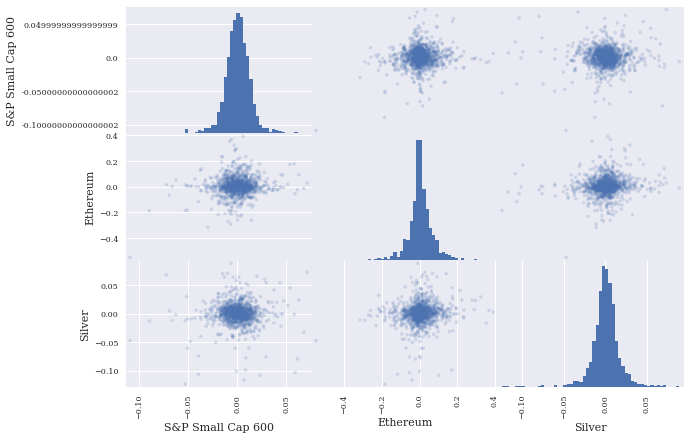

In [90]:
# Plotting returns of our underlying assets, also help us visualize the covariance matrix

pd.plotting.scatter_matrix(returns, 
alpha=0.2,
diagonal='hist',
hist_kwds={'bins': 55},
figsize=(10, 7));

> The histogram shows the returns of our stock and the scatter plot shows the covariance between two stocks which we caculated above

**Correlation**

Correlation of one also known as perfect positive correlation means the entire variability of
the second variable is explained by the first variable.

A correlation of zero between two variables means they are independent from each other.

In [91]:
corr_matrix = returns.corr()
corr_matrix

,S&P Small Cap 600,Ethereum,Silver
S&P Small Cap 600,1.000000,0.131125,0.022255
Ethereum,0.131125,1.000000,0.123657
Silver,0.022255,0.123657,1.000000


High degree: If the coefficient value lies between ± 0.50 and ± 1, then it is said to be a strong correlation. 
Moderate degree: If the value lies between ± 0.30 and ± 0.49, then it is said to be a medium correlation.
Low degree: When the value lies below + .29, then it is said to be a small correlation.



> You can see that the correlation of 1.000 represents the two series of same stock, hence perfect correlation. All our assets have low correlation (i.e less than 0.29 ) Nevertheless the correlation between Ethereum and S&P smallcap stand out much higher than Ethereum and silver and the least correlation which is between Silver and S&P SmallCap. 

> We noticed S&P small cap and Silver had around similar percentage during measuring risk and return, and we felt that they might have a correlation between each other. but which is not the case, the covariance is almost close to zero between them and have least correlation in our portfolio suggesting that is more likely independent to each other.

:Note - we are analysing the correlation or covariance between our stock returns and stock price.

### Portfolio Risk 
(Assuming Equal weights)


If a portfolio contains two stocks, its risk will be a function of the variances of the two stocks and of the correlation between them.

The result is equal to weight one to the second degree times the variance of the first stock plus weight two to the second degree times the variance of the second stock plus two times the product of weight one, weight two and the covariance between
the two stocks.

portfolios variance, it depends on two things the standard deviations of
the two stocks and the correlation between these stocks.


In [92]:
equal_weights = np.array([0.3333, 0.3333, 0.3334]) # sum of weights should always equal to 1


#portfolio variance - 
pfolio_var = np.dot(equal_weights.T, np.dot(returns.cov() * 252, equal_weights))
print (str(round(pfolio_var, 3)) + ' Portfolio Variance ')

#portfolio volatility
       
pfolio_vol = (np.dot(equal_weights.T, np.dot(returns.cov() * 252, equal_weights))) ** 0.5
print (str(round(pfolio_vol, 5) * 100) + ' % Portfolio Volatitility')

           

0.171 Portfolio Variance 
41.301 % Portfolio Volatitility


> You can that our portfolio Volatility/Risk is 40% and above when we assigned the weights to each of our stocks equally

### RISK Types

There are two types of investment risk, systematic and unsystematic risk, also known as **undiversified** and **diversified risk.**

Systematic risk is made of the day to day changes in stock prices and is caused by events that affect all companies.
example: recession, consumer demand, wars, earthquakes. which we have pretty much no control over.

unsystematic risk, also known as idiosyncratic risk. These are company specific, even industry specific risks that can be smoothed out through diversification.

Diversifiable Risk = portfolio variance - annual weighted variances

Undiversiable Risk = portfolio variance - diversifiable risk


**Diversifiable Risk**

In [93]:
# we caculate the annual var of each stock

ETH_var_a = returns['S&P Small Cap 600'].var() * 252

SILVER_var_a = returns['Ethereum'].var() * 252

S_P600_var_a = returns['Silver'].var() * 252


# calculating diversifiable risk
d_risk = pfolio_var - (equal_weights[0] ** 2 * ETH_var_a) - (equal_weights[1] ** 2 * SILVER_var_a) - (equal_weights[2] ** 2 * S_P600_var_a)
print (str(round(d_risk*100, 3)) + ' % Diversifiable risk')

1.684 % Diversifiable risk


**Non-Diversifiable Risk**

In [94]:
nd_risk = pfolio_var - d_risk
print (str(round(nd_risk*100, 3)) + ' % Non-Diversifiable risk')

15.374 % Non-Diversifiable risk


> Our diversifiable Risk of the portfolio is less than 1%. Where as our underdiversifiable risk is close to 16%. 
  The currenct Covid pandemic could be a factor influencing our undiversifiable risk. 

## Portfolio Optimization - Efficient Frontier

Portfolio optimization is the process of creating a portfolio of assets, for which your investment has the maximum return and minimum risk.

An investor’s portfolio basically is his/her investment in different kinds of assets from different companies.

In this instance, we have investments in 3 assets, Ethereum, Silver and S&P SmallCap 600, then these 3 assets make up your investment portfolio.

#### **Modern Portfolio Theory (MPT)**

Also known as Mean-Variance Portfolio is a mathematical process which allows the user to maximize returns for a given risk level. It was formulated by **H. Markowitz.**

The theory assumes that all investors are risk-averse, i.e, if there is a choice between low risk and high risk portfolios with the same returns, an investor will choose one with the low risk.

It encourages diversification of assets. It says that a high variance asset A if combined with diverse assets B and C, where A, B and C have little to no correlation, can give us a portfolio with low variance on returns.

This is the bottom line of the **Mean-Variance Portfolio.**

#### **Efficient Frontier**

we know every asset in a portfolio has its own rate expected returns and risks. It is possible to create multiple combinations of assets that can provide high returns for a pre-defined risk level.

Likewise, there can be multiple portfolios that give lowest risk for a pre-defined expected return.

Efficient frontier is a graph with ‘returns’ on the Y-axis and ‘volatility’ on the X-axis. It shows the set of optimal portfolios that offer the highest expected return for a given risk level or the lowest risk for a given level of expected return.

In [95]:
# re-defining out data into prices
prices = data
prices.tail() 

,S&P Small Cap 600,Ethereum,Silver
Date,,,
2021-06-03,75.709999,2411.154395,23.189970
2021-06-04,75.480003,2270.180825,23.543816
2021-06-07,76.050003,2187.477345,23.646845
2021-06-08,76.800003,2125.977084,23.405319
2021-06-09,77.250000,2202.681645,23.633334


#### Plot the time series

Time series data is a collection of observations obtained through repeated measurements over time. Time series data can be useful for:

Tracking daily, hourly, or weekly weather data. Tracking changes in performance over time.

Plot the time series data in a normalised fashion.

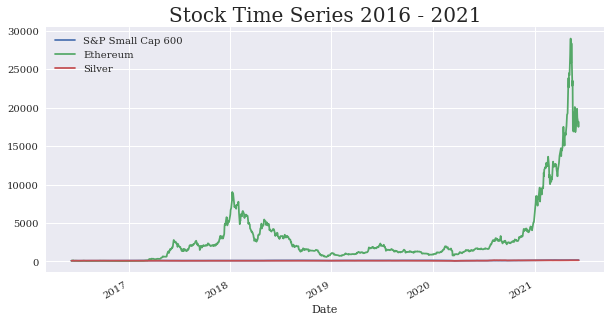

In [96]:
normalised = prices / prices.iloc[0] * 100
normalised.plot(figsize=(10, 5))
plt.title('Stock Time Series 2016 - 2021', fontsize=20);

In [97]:
# Calculate the log returns
log_r = np.log(prices / prices.shift(1))

# Compute the annualised returns
annual_r = log_r.mean() * 252 
print (str(round(annual_r, 3)) + ' Annualized Return')


S&P Small Cap 600    0.124
Ethereum             1.074
Silver               0.100
dtype: float64 Annualized Return


Next, I will generate random weights for all of the 3 stocks/assets, which will make up the randomly generated portfolios, under a combination of assumptions. The assumptions are that only long positions are allowed, which ultimately means that the investor's wealth has to be divided among all available stocks through positive positions, and the positions have to add up to 100%.

### Normality test

The normal distribution can be considered the most important distribution in finance and one of the major statistical building blocks of financial theory. Among others, the following cornerstones of financial theory rest to a large extent on the assumption that returns of a financial instrument are normally distributed.

When stock returns are normally distributed, optimal portfolio choice can be cast into a setting where only the (expected) mean return and the variance of the returns (or the volatility) as well as the covariances between different stocks are relevant for an investment decision (i.e., an optimal portfolio composition). 


In [98]:
import scipy.stats as scs

> We are going to perform two test to test the normality of our data set


- Skewness test (skewtest()) :
   This tests whether the skew of the sample data is “normal” (i.e., has a value close enough to zero).
   

- Kurtosis test (kurtosistest()) :
  Similarly, this tests whether the kurtosis of the sample data is “normal” (again,close enough to zero).


- Normality test (normaltest()) :
  This combines the other two test approaches to test for normality.

In [99]:
# Definining to Prints selected statistics.

def print_statistics(array):
    sta = scs.describe(array)
    print('%14s %15s' % ('statistic', 'value'))
    print(30 * '-')
    print('%14s %15.5f' % ('size', sta[0]))
    print('%14s %15.5f' % ('min', sta[1][0]))
    print('%14s %15.5f' % ('max', sta[1][1]))
    print('%14s %15.5f' % ('mean', sta[2]))
    print('%14s %15.5f' % ('std', np.sqrt(sta[3])))
    print('%14s %15.5f' % ('skew', sta[4]))
    print('%14s %15.5f' % ('kurtosis', sta[5]))
    # Tests for normality distribution of given data set.

def normality_tests(arr):
    print('Skew of data set %14.3f' % scs.skew(arr))
    print('Skew test p-value %14.3f' % scs.skewtest(arr)[1])
    print('Kurt of data set %14.3f' % scs.kurtosis(arr))
    print('Kurt test p-value %14.3f' % scs.kurtosistest(arr)[1])
    print('Norm test p-value %14.3f' % scs.normaltest(arr)[1]) 

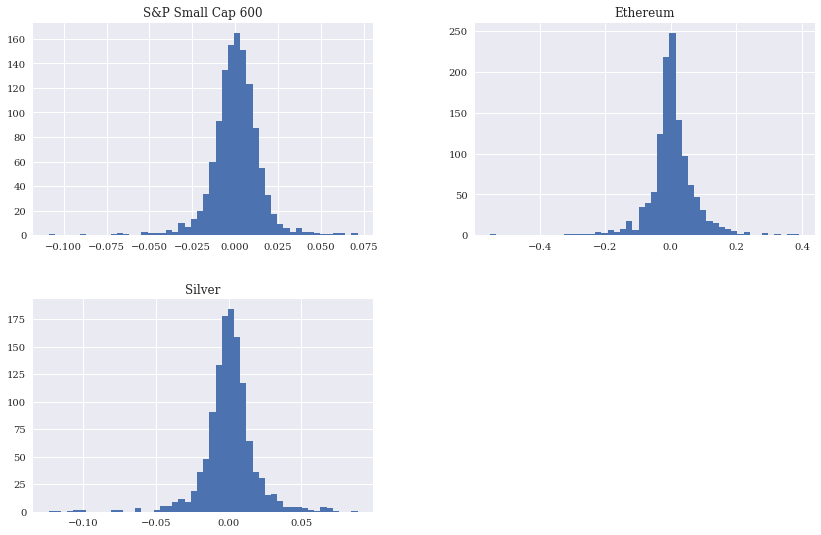

In [100]:
# plotting histogram of log returns 

log_r.hist(bins=50, figsize=(14, 9));

In [101]:
# Printing Statistics

for l in log_r:
    print('\nResults for {}'.format(l))
    print(30 * '-')
    log_data_norm = np.array(log_r[l].dropna())
    print_statistics(log_data_norm) 


Results for S&P Small Cap 600
------------------------------
     statistic           value
------------------------------
          size      1220.00000
           min        -0.10867
           max         0.07139
          mean         0.00049
           std         0.01462
          skew        -0.54326
      kurtosis         7.13010

Results for Ethereum
------------------------------
     statistic           value
------------------------------
          size      1220.00000
           min        -0.55073
           max         0.39138
          mean         0.00426
           std         0.07028
          skew        -0.07951
      kurtosis         7.22141

Results for Silver
------------------------------
     statistic           value
------------------------------
          size      1220.00000
           min        -0.12385
           max         0.08880
          mean         0.00040
           std         0.01840
          skew        -0.98320
      kurtosis         9.100

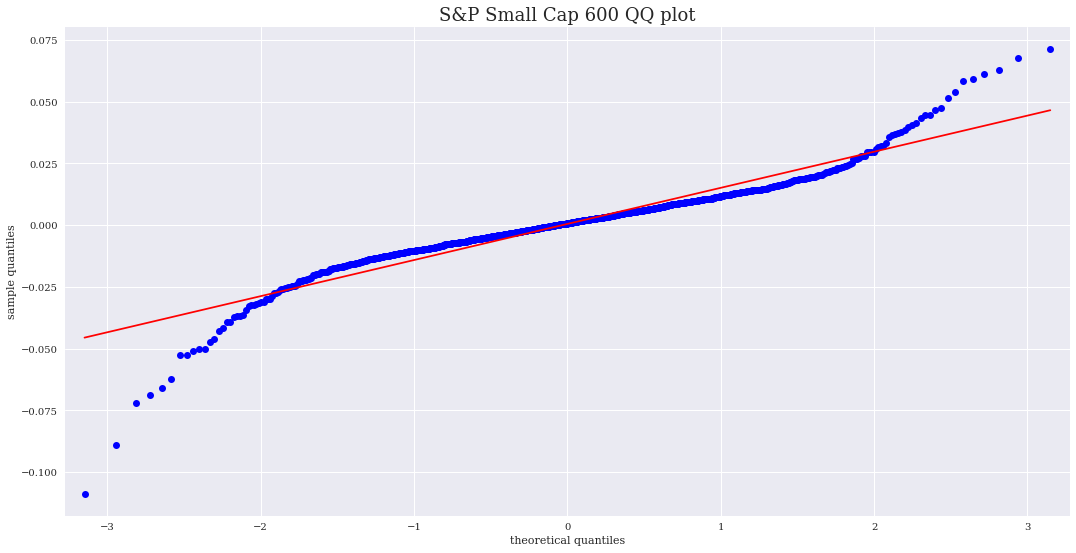

In [102]:
# QQ Plotting 

sm.qqplot(log_r['S&P Small Cap 600'].dropna(), line='s')
plt.title('S&P Small Cap 600 QQ plot', fontsize = 18)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles');

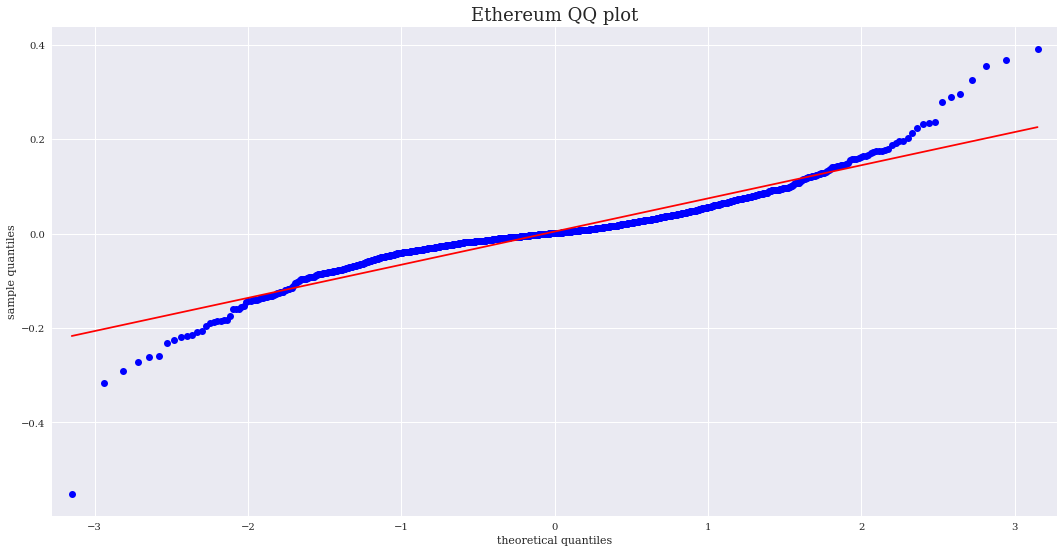

In [103]:
sm.qqplot(log_r['Ethereum'].dropna(), line='s')
plt.title('Ethereum QQ plot', fontsize = 18)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles');

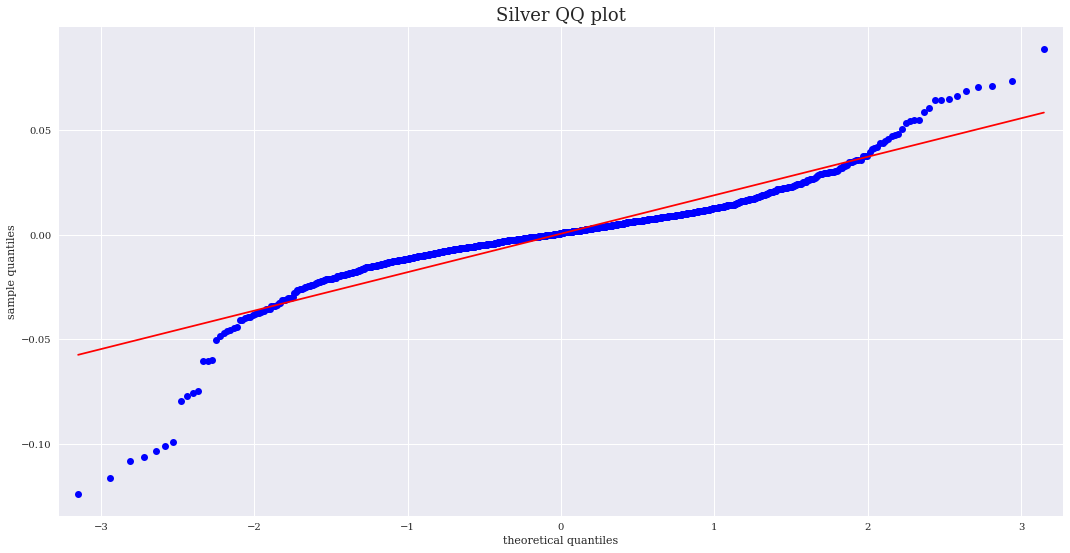

In [104]:
sm.qqplot(log_r['Silver'].dropna(), line='s')
plt.title('Silver QQ plot', fontsize = 18)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles');

In [105]:
for l in log_r:
    print('\nResults for  {}'.format(l))
    print(32 * '-')
    log_data_norm = np.array(log_r[l].dropna())
    normality_tests(log_data_norm) 


Results for  S&P Small Cap 600
--------------------------------
Skew of data set         -0.543
Skew test p-value          0.000
Kurt of data set          7.130
Kurt test p-value          0.000
Norm test p-value          0.000

Results for  Ethereum
--------------------------------
Skew of data set         -0.080
Skew test p-value          0.255
Kurt of data set          7.221
Kurt test p-value          0.000
Norm test p-value          0.000

Results for  Silver
--------------------------------
Skew of data set         -0.983
Skew test p-value          0.000
Kurt of data set          9.100
Kurt test p-value          0.000
Norm test p-value          0.000


### Interpretation of Normality test

Normality test results for the times series of the given assets -returns 
We see from our histogram plot, QQ plot, Statistic test, Normality test along with skewness and kurtosis test where the p-values of the all our assets are all zero, strongly rejecting the test hypothesis that the different sample data sets are normally distributed. Hence the first rule is being violated.

Henceforth, we proceed from here on with the assumption that our data set has normally distributed returns.

In [106]:
# Create a list of the ticker symbols to be used in this project
tickers = ['SnP', 'ETH', 'SL']

# Covariance matrix 

cov_matrix = log_r.cov() * 252

# Variance 
var = log_r.var() * 252

# Get the total number of stocks used
num_stocks = len(tickers)

# Generate 3 random weights between 0 and 1
weights = np.random.random(num_stocks)

# Constrain these weights to add up to 1
weights /= np.sum(weights)

weights

array([0.35865603, 0.38328815, 0.25805582])

Assuming that historical mean performance of the stocks making up the portfolio is the best estimator for future, i.e. expected, performance, expected portfolio return can be calculated as a product of the transpose of the weights vector and the expected returns vector of the stocks making up the portfolio.

In [107]:
# Sum should equal to 1 

sum(weights).round()

1.0

In [108]:
# Example of what the portfolio return would look like given the above weights
ptf_r = np.sum(annual_r * weights)
print ("Portfolio Return: Random weights %4.4f" %(ptf_r))

Portfolio Return: Random weights 0.4817


In [109]:
# Compute portfolio variance
ptf_var = np.dot(weights.T, np.dot(cov_matrix, weights))
print ("Portfolio Variance: Random weights %4.4f" %(ptf_var))

Portfolio Variance: Random weights 0.2131


In [110]:
# Calculate the standard deviation
ptf_std = np.sqrt(ptf_var)
print ("Portfolio Standard deviation: Random weights %4.4f" %(ptf_std))

Portfolio Standard deviation: Random weights 0.4616


Using the computational concepts introduced so far we can generate many random portfolios and plot their returns against their risk (standard deviation), often referred to as volatility.

In [111]:
# def for port_vol and port_ret

def port_vol(weights):
    return np.sqrt(np.dot(weights.T, np.dot(log_r.cov() * 252, weights)))

def port_ret(weights):
    return np.sum(log_r.mean() * weights) * 252

# Define a function to generate N number of random portfolios given a DataFrame of log returns

def generate_ptfs(returns, N):
    ptf_rs = []
    ptf_stds = []
    for i in range(N):
        weights = np.random.random(len(returns.columns))
        weights /= np.sum(weights)
        ptf_rs.append(np.sum(returns.mean() * weights) * 252)
        ptf_stds.append(np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights))))
    ptf_rs = np.array(ptf_rs)
    ptf_stds = np.array(ptf_stds)
    return ptf_rs, ptf_stds

Comparing portfolio returns and volatilities across portfolios is made a lot easier by computing a ratio of the two measures. The most common ratio that takes into consideration is the Sharpe ratio, which is a measure of the amount of excess return an investor can expect per unit of volatility (remember this is a measure of risk) that a portfolio provides. Because we assume that investors want to maximise returns while minimising risk, the higher this ratio the better.


**Sharpe ratio:**
### $$
Sharpe = \frac{\overline{r_{pg}} - r_f}{\sigma_{pg}}
$$

#### Monte Carlo Simulation

A Monte Carlo simulation is a model used to predict the probability of different outcomes when the intervention of random variables is present.

Monte Carlo simulations help to explain the impact of risk and uncertainty in prediction and forecasting models.

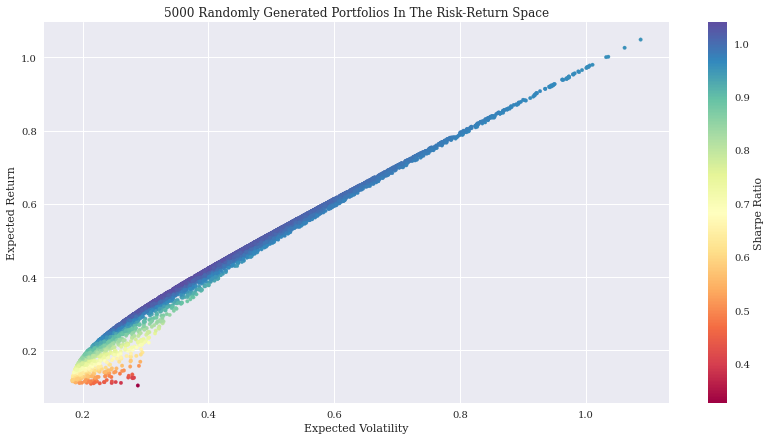

In [112]:
# Generate the return and volatility by monte carlo simulations of 5000 random portfolios

ptf_rs, ptf_stds = generate_ptfs(log_r, 5000)

# Plot the 5000 randomly generated portfolio returns and volatilities and colormark the respective Sharpe ratios

plt.figure(figsize=(14, 7))
plt.scatter(ptf_stds, ptf_rs, c=(ptf_rs - 0.01)/ptf_stds, marker='..', cmap='Spectral')
plt.grid(True)
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.colorbar(label='Sharpe Ratio')
plt.title('5000 Randomly Generated Portfolios In The Risk-Return Space');

Finding the optimal portfolios requires a constrained optimisation in which we maximise the Sharpe ratio. To begin, we need a function that returns the portfolio statistics that we computed previously, namely weights, portflio return, portfolio volatility and, based on the latter two, the portfolio Sharpe ratio.

In [113]:
# Import the optimize sublibrary
import scipy.optimize as sco

# Define a function that returns the portfolio statistics
def ptf_stats(weights):
    weights = np.array(weights)
    ptf_r = np.sum(log_r.mean() * weights) * 252
    ptf_std = np.sqrt(np.dot(weights.T, np.dot(log_r.cov() * 252, weights)))
    return np.array([ptf_r, ptf_std, (ptf_r - 0.01) / ptf_std])

# Minimise the negative value of the Sharpe ratio
def min_sharpe(weights):
    return -ptf_stats(weights)[2]

# Write the constraint that the weights have to add up to 1 - Equality constraint.
cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

# Bound the weights (parameter inputs) to be within 0 and 1 - Bounds for the parameters.
bnds = tuple((0, 1) for x in range(num_stocks))

# Starting parameter (weights) list as equal distribution
starting_ws = num_stocks * [1. / num_stocks,]

# Call the minimisation function
opts = sco.minimize(min_sharpe, starting_ws, method='SLSQP', bounds=bnds, constraints=cons) 

#The optimization (i.e., minimization of function min_func_sharpe()).

In [114]:
# Inspect the results , The results from the optimization
opts

     fun: -1.039238570215858
     jac: array([-0.02923408, -0.02919593, -0.02905999])
 message: 'Optimization terminated successfully'
    nfev: 25
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([0.52411154, 0.26054236, 0.2153461 ])

In the results of the optimisation, the variable x stores the weights for the stocks making up the optimal portfolio. In the case of the 3 stocks/assets.

In [115]:
# Obtain the optimal weights, optimal portfolio weight 
weights_opt = opts['x'].round(5)
print ("Optimal portfolio weights" )

print ((weights_opt))

Optimal portfolio weights
[0.52411 0.26054 0.21535]


> The optimal portfolio weights correspond to S&P small cap 600, Ethereum and Silver espectively 

Plugging these weights into the portfolio statistics function above we can get the expected return, expected volatility and Sharpe ratio of the portfolio with the optimal weights.

In [116]:
# Plug optimal weights into the statistics function
print ("Portfolio Stats" )
print (ptf_stats(weights_opt))


Portfolio Stats
[0.36606393 0.34262001 1.03923857]


The expected return is around 36%, the expected volatility is around 34% and the Sharpe ratio is rounded to 1.

Next, we can obtain the absolute **Minimum Variance Portfolio.** As the name suggests, in order to obtain this portfolio, we minimise the portfolio variance.

In [117]:
# Define a function that minimises portfolio variance (mim portfolio volatility )

def min_var(weights):
    # Remember that variance is just standard deviation (volatility) squared
    return ptf_stats(weights)[1]**2

# Call the optimisation fcuntion
opt_var = sco.minimize(min_var, starting_ws, method='SLSQP', bounds=bnds, constraints=cons)

In [118]:
# Inspect the results
opt_var

     fun: 0.033742474618387655
     jac: array([0.06748495, 0.07279427, 0.06748495])
 message: 'Optimization terminated successfully'
    nfev: 20
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([0.61527809, 0.        , 0.38472191])

For the absolute **Minimum Variance Portfolio.**

The weights and stats are as follows:

In [119]:
# Obtain the minimum  weights
weights_opt_var = opt_var['x'].round(5)
print ("Optimal portfolio weights" )

print ((weights_opt_var))

Optimal portfolio weights
[0.61528 0.      0.38472]


In [120]:
# Get the statistics for the absolute minimum variance portfolio
print ("Minimum Variance Portfolio Stats:" )
print (ptf_stats(weights_opt_var))


Minimum Variance Portfolio Stats:
[0.1144386  0.18369125 0.56855513]


Using the same logic applied previously,

The expected return is around 11%, the expected volatility is around 18% and the Sharpe ratio is rounded to 0.5

In [121]:
# Set up two conditions, one for the target return level and one for the sum of the portfolio weights
cons2 = ({'type': 'eq', 'fun': lambda x: ptf_stats(x)[0] - r},
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

# The boundary condition stays the same
bnds2 = tuple((0, 1) for x in weights)

# Define a function that returns the volatility of a portfolio given a vector of weights
def min_port(weights):
    return ptf_stats(weights)[1]

# Define a function to get the target returns and volatilities given a range of returns
def efficient_frontier(start_r, end_r, steps):
    target_rs = np.linspace(start_r, end_r, steps)
    target_stds = []
    for r in target_rs:
        cons2 = ({'type': 'eq', 'fun': lambda x: ptf_stats(x)[0] - r},
                {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
        bnds2 = tuple((0, 1) for x in weights)
        res = sco.minimize(min_port, starting_ws, method='SLSQP', bounds = bnds2, constraints=cons2)
        target_stds.append(res['fun'])
    target_stds = np.array(target_stds)
    return target_rs, target_stds


In [122]:
# Obtain the target returns and volatilities based on 50 target returns
# Based on the random portfolio visualisation above it seems as though a target return of 30% would be a good upper bound
target_rs, target_stds = efficient_frontier(0.0, 0.30, 50)

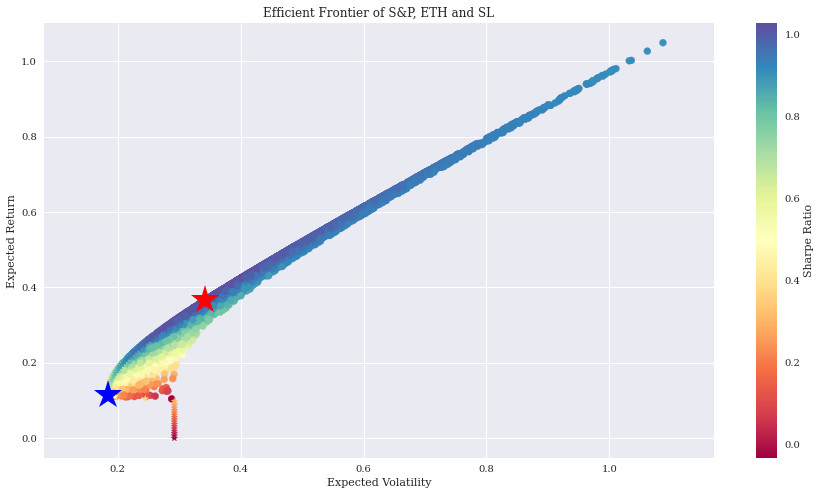

In [123]:
# Plot the efficient frontier in the same visualisation as the randomly generated portfolios
plt.figure(figsize=(15, 8))
plt.scatter(ptf_stds, ptf_rs, c=(ptf_rs - 0.01)/ptf_stds, marker='o', cmap='Spectral')
plt.scatter(target_stds, target_rs, c=(target_rs - 0.01)/target_stds, marker='*', cmap='Spectral')
plt.plot(ptf_stats(opts['x'])[1], ptf_stats(opts['x'])[0], 'r*', markersize=30.0)
plt.plot(ptf_stats(opt_var['x'])[1], ptf_stats(opt_var['x'])[0], 'b*', markersize=30.0)
plt.grid(True)
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.xlim(0.08, 1.17)
plt.colorbar(label='Sharpe Ratio')
plt.title('Efficient Frontier of S&P, ETH and SL');

The visualisation above shows the efficient frontier, i.e. the frontier comprised of all optimal portfolios that maximise the expected return for a given level of expected volatility. The blue star depicts the absolute minimum variance portfolio and the red star depicts the absolute maximum Sharpe ratio of the portfolio. Note that any portfolio that lies on the frontier but is below the blue star is not an optimal or efficient portfolio as it does not dominate all other portflios in terms of expected return given a certain risk level but rather is dominated by the others.


In [124]:
# Create DataFrame of the weighst assigned to each ticker

composition = {'Expected Return': annual_returns.round(4),'Minimum Vairance Weights': weights_opt_var , 'Maximum Sharpe': weights_opt }
comp = pd.DataFrame(composition, columns = ['Expected Return', 'Minimum Vairance Weights', 'Maximum Sharpe'])
comp

,Expected Return,Minimum Vairance Weights,Maximum Sharpe
S&P Small Cap 600,0.1235,0.61528,0.52411
Ethereum,1.0740,0.00000,0.26054
Silver,0.0999,0.38472,0.21535


To get a possible explanation of why the portfolio weights are allocated the way they are I have included the expected return for each stock in the table above. 



--------------------------------------------------------------------------------------------------------------------------------

### Capital Market Line

The capital market line (CML) represents portfolios that optimally combine risk and return. The intercept point of CML and efficient frontier would result in the most efficient portfolio called the tangency portfolio.

$$ Rp =rf + (RT−rf)/σT * σp $$


where:

Rp =portfolio return

rf =risk free rate

RT =market return

σT=standard deviation of market returns

σp =standard deviation of portfolio returns


Once we have the efficient portfolio we can add a riskless asset, i.e. cash to the mix. Investing in the riskless asset and the efficient portflio greatly enhances the efficient investment opportunity set for the investor and gives them a way to find an efficient capital allocation that matches their risk appetite. By adjusting the portion of the total wealth invested in teh riskless asset, the investor can (in theory) achieve any risk-return profile that lies on the straight line between the riskless asset and the efficient portfolio (and theoretically beyond that point by borrowing).

In [125]:
# Import cubic splines interpolation module
import scipy.interpolate as sci

# Select the index of the absolute minimum variance portfolio
min_var = np.argmin(target_stds)

# Select expected volatilities for the stocks on the efficient frontier
ex_stds = target_stds[min_var:]

# Select expected returns for the stocks on the efficient frontier
ex_rs = target_rs[min_var:]


These ndarray objects can then be used for the interpolation. B-spline interpolation takes sets of adjacent points and constructs a ploynomial passing through those points. Essentially, what the interpolation gives us is a continuous function that approximates the efficient frontier. This function can then be differentiated in order to find the slope of the line that is tangent to the efficient frontier and passes through the riskless asset.

In [126]:
# Interpolate the B-spline representation of the data points
tck = sci.splrep(ex_stds, ex_rs)

# Obtain coordinates to be used for plotting the B-spline interpolation of the efficient frontier
x_lower = min(ex_stds)
x_upper = max(ex_stds)
x_range = np.linspace(x_lower, 0.39, 500)
bspline = sci.splev(x_range, tck)

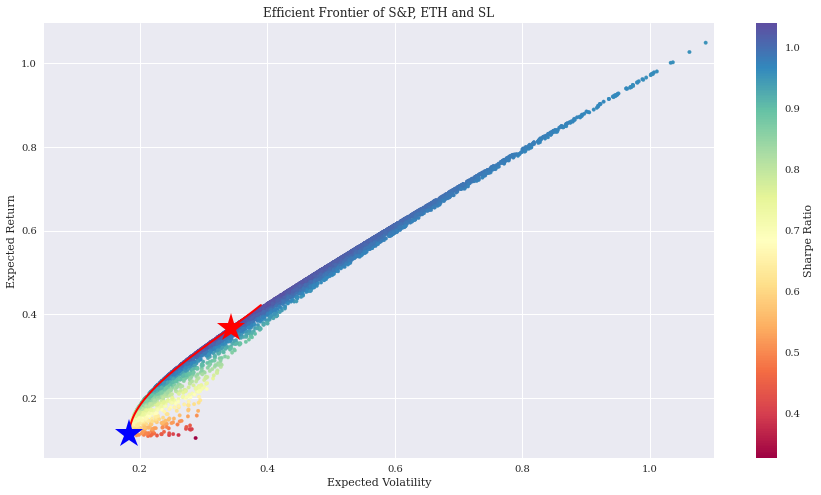

In [127]:
# Plot the B-spline interpolation of the efficient frontier
plt.figure(figsize=(15, 8))
plt.scatter(ptf_stds, ptf_rs, c=(ptf_rs - 0.01)/ptf_stds, marker='..', cmap='Spectral')
plt.plot(x_range, bspline, 'r', lw = 2.0)
plt.plot(ptf_stats(opts['x'])[1], ptf_stats(opts['x'])[0], 'r*', markersize=30.0)
plt.plot(ptf_stats(opt_var['x'])[1], ptf_stats(opt_var['x'])[0], 'b*', markersize=30.0)
plt.grid(True)
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.xlim(0.05, 1.10)
plt.colorbar(label='Sharpe Ratio')
plt.title('Efficient Frontier of S&P, ETH and SL');

The B-spline interpolation can be used to find a cintinuously differentiable function and, more interestingly, its derivatives.

In [128]:
# Define a continuously differentiable function f(x) for the efficient frontier
def f(x):
    return sci.splev(x, tck, der=0)

# Define the first derivate function of f(x)
def df(x):
    return sci.splev(x, tck, der=1)


Assuming a risk-free rate of return of 1% and a parameter set p=(a,b,x) we can set up a system of equations for the capital market line.

In [129]:
def cml_condition(p, rf=0.01):
    eq1 = rf - p[0]
    eq2 = rf + p[1] * p[2] - f(p[2])
    eq3 = p[1] - df(p[2])
    return eq1, eq2, eq3

Provided with an initial parameterisation in addition to the system of equations, the optimisation function fsolve is capable of solving the system of equation.

An initial parameterization is
provided. Note that success or failure of the optimization might depend on the initial
parameterization, which therefore has to be chosen carefully—generally by a combi‐
nation of educated guesses with trial and error:

t(x) = a + b · x 

To this end,
define a Python function that returns the values of all three equations given the
parameter set p = (a, b, x).

In [130]:
# Solve for the parameters of the Capital Market Line
cml = sco.fsolve(cml_condition, [0.01, 0.5, 0.15])

In [131]:
# Create input variable for CML
cx = np.linspace(0.0, 0.9)

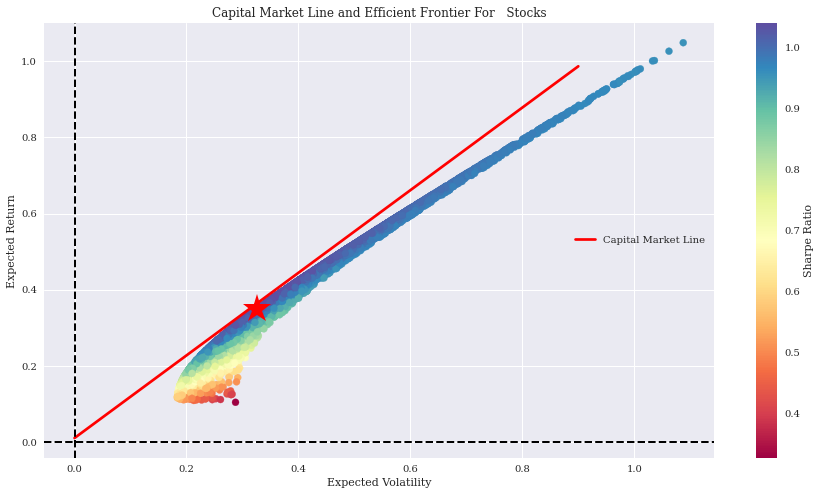

In [132]:
# Plot the resulting Capital Market Line together with the efficient frontier
plt.figure(figsize=(15, 8))
plt.scatter(ptf_stds, ptf_rs, c=(ptf_rs - 0.01)/ptf_stds, marker='o', cmap='Spectral') # Random portfolios
plt.plot(cx, cml[0] + cml[1] * cx, lw=2.7, color='r', label='Capital Market Line') # Capital Market Line
plt.plot(cml[2], f(cml[2]), 'r*', markersize=30.0) # Optimal portfolio where the tangent line passes through rf
plt.grid(True)
plt.axhline(0, color='k', ls='--', lw=2.0)
plt.axvline(0, color='k', ls='--', lw=2.0)
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.colorbar(label='Sharpe Ratio')
plt.title('Capital Market Line and Efficient Frontier For   Stocks')
plt.legend(loc=7);

In the visualisation above, the red star represents the optimal portfolio from the efficient frontier where the tangent line passes through the riskless asset.

The following provide the Tangency portfolio weights and Portfolio stats respectively

In [133]:
# def for port_vol and port_ret

def port_vol(weights):
    return np.sqrt(np.dot(weights.T, np.dot(log_r.cov() * 252, weights)))

def port_ret(weights):
    return np.sum(log_r.mean() * weights) * 252

cons3 = ({'type': 'eq', 'fun': lambda x: port_ret(x) - f(cml[2])},
          {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})


res = sco.minimize(port_vol, starting_ws, method='SLSQP', bounds=bnds, constraints=cons3)

> The following is the repective weights for our portfolio correspoinding to S&P, Ethereum and Silver

In [134]:
Tang_port_weights = res['x'].round(5)
Tang_port_weights

array([0.53032, 0.24325, 0.22643])

In [135]:
print ("Tangency Portfolio return:" )
print ((port_ret(res['x'])).round (4)*100)

Tangency Portfolio return:
34.94


In [136]:
print ("Tangency Portfolio Volatility:" )
print ((port_vol(res['x'])).round (4)*100)

Tangency Portfolio Volatility:
32.67


In [137]:
print ("Sharpe Ratio" )
print (port_ret(res['x']) / port_vol(res['x']))

Sharpe Ratio
1.0693380627422666


In [138]:
composition = {'Expected Return': annual_returns.round(4),'Minimum Variance Weights': weights_opt_var , 'Maximum Sharpe': weights_opt, 'Tangential Portfolio Weights': Tang_port_weights.round(5) }
comp = pd.DataFrame(composition, columns = ['Expected Return', 'Minimum Variance Weights', 'Maximum Sharpe', 'Tangential Portfolio Weights'])
comp

,Expected Return,Minimum Variance Weights,Maximum Sharpe,Tangential Portfolio Weights
S&P Small Cap 600,0.1235,0.61528,0.52411,0.53032
Ethereum,1.0740,0.00000,0.26054,0.24325
Silver,0.0999,0.38472,0.21535,0.22643


With this tangential portfolio weight distribution 
Our investor can expect a return on investment of 34.94% and a risk of 32.67% with a sharpe ratio as 1.07 Any Sharpe ratio greater than 1.0 is considered acceptable to good by investors.

In [139]:
composition = {'Minimum Variance Weights': weights_opt_var ,  'Tangential Portfolio Weights': Tang_port_weights.round(5) }
comp = pd.DataFrame(composition, columns = [ 'Minimum Variance Weights', 'Tangential Portfolio Weights'])
comp

,Minimum Variance Weights,Tangential Portfolio Weights
0,0.61528,0.53032
1,0.00000,0.24325
2,0.38472,0.22643


_______________________________________________________________________________________________________________________________

<div align="center">
    
# Detialed Summary 



### TIME SERIES ANALYSIS 

|Characteristics     | Ethereum              | Silver               | S&P Smallcap 600    | abrevation          |
| ------             |   ------             |   ------             |  ------             |  ------             |  
|**Trend**             |    Up trend       |   None            |  Up trend             |  -            | 
|**Seasonality**        |  None     |   None            |  Cyclic (between 1.9 years apx) 2015-2020      |  apx - approximate  |
|**Serial Correlation/ <br/> Autocorrelation.**| d: - 0.0184, Mean reverting <br/> w: 0.1079,  Trend following <br/> m: 0.1928, Trend following| d: - 0.0276, Mean reverting. <br/> w: 0.0066,  Trend following. <br/> m: 0.0566, Trend following. | d: 0.0071,    Trend following.<br/> w: - 0.0326, Mean reverting. <br/> m: 0.0169,   Trend following. | d- daily <br/> w- weekly <br/> m- monthly|
| **Irregular Component <br/> ACF (20 lags)** | conf (+/- 0.05) d - None. <br/> conf (+/- 0.12) w - None. <br/>conf (+/- 0.25) m - WN | <br/> conf (+/- 0.03) - d - None.  <br/> conf (+/- 0.06) - w - WN <br/> conf (+/- 0.13) - m - WN. | conf (+/- 0.04) - d - None. <br/> conf (+/- 0.08) - w - None.  <br/> conf (+/- 0.16) - m - WN. |WN: <br/> White Noise|



### Stationarity:  

 **Rolling Statistics:** Standard deviation(Green) Mean (Red) - Varying over time.
                        
 **Augmented Dickey fuller test:**  <br/>
                                  P- Value <br/>
                                  0.989825 - Ethereum ,<br/> 
                                  0.537483 - Silver , <br/>
                                  0.936881 - S&P Small Cap 600 <br/>
                                  All P- Value higher than 0.05%, Can’t reject the null hypothesis – therefore call it **Random walk.**


**Stationary Process**

|Stationary Process | Ethereum | Silver | S&P Smallcap 600 |
| ------             |   ------             |   ------             |  ------             | 
|  -  | Converted data ( Weekly ) <br/> Differenced - Twice. <br/> ADF : P-value:  0.016578 - Stationary. <br/>(BiC)<br/> ACF   : 0 <br/> PACF : 1 |  Converted data ( Monthly ) <br/> Differenced - Thrice. <br/> ADF: P-value:  0.007585 - Stationary. <br/>(BiC)<br/> ACF   : 0 <br/> PACF : 2 |  Converted data ( Weekly ) <br/> Differenced - six times. <br/> ADF : P-value:  0.000022 - Stationary. <br/>(BiC)<br/> ACF   : 2 <br/> PACF : 2 | 

**ARIMA model**(95% Confidence interval):

**Ethereum** : stock show an upward trend , stock price between- 1900 € - 4900 €:  2024. <br/>
**Silver**   : price for next 100 weeks show and gradual upward trend with stock price falling between 18 €  and 50 €  by the end of 2029. <br/>
**S&P SmallCap 600 price** : continue to show gradual upward trend , stock price lying between 76 euros and 130 Euros by the end of 2026. 


#### Adtionally

##### Ethereum 

Investing in Ethereum although could be risky, but it could potentially be lucrative. Unlike Bitcoin or Litecoin, companies are really using Ethereum as a building block - something more akin to diamonds than gold. As an investor, this is a potential win.
Furthermore, there can be splits on Ethereum like we recently saw with Bitcoin and Bitcoin Cash. This can be a good thing or bad thing.
  

##### Silver 


In addition to the previously explained reasons to invest in Silver the following compliment further ahead:

- Demand Outstripping Supply:
Silver supply is essentially flat at the moment and will decline with time. quite commonly known fact is that silver is hardly recycled therefore, As demand for mobile devices, flatscreen TVs, and personal electronics continues to grow around the world, silver will much likely gain in value in the coming months/ years. Investing in silver now is buying early into a potentially lucrative market.

- Silver Is Affordable:
At €21.05 , silver is more affordable than gold, A lower price means silver is more accessible to investors, and buying small quantities over time gives you the benefit of dollar/euro cost averaging.
Silver is somewhat more speculative than gold with daily price and our forecast suggest an gradual uptrend.
Considering all these factors Silver maybe a good worthwhile investment. 



##### S&P Small Cap 600

Some addition potential reasons to invest in S&P Small Cap 600 are as follows:
  
- Bull market gains:
While large-cap companies are more likely to be profitable, have better access to capital, and can better withstand recessions, small-cap companies tend to outperform during bull markets, which occur when the stock market is on the rise.

- Attractive growth potential: 
The stocks of small-cap companies have historically outperformed those of large-caps, thanks to their greater growth potentials.


However, it's important to note that due to small-cap stocks' volatility, investors' small-cap holdings are likely to lose more value during market crashes. During the March 2020 crash caused by the coronavirus pandemic, the values of small-cap stocks predictably fell faster than the value of the broader market. But the small-cap stocks' prices also rebounded more quickly, especially after Pfizer (NYSE:PFE) announced successful vaccine trials.  



### Risk and Return

We saw that Silver and S&P Small cap 600 was more volatitle against Ethereum with regards to our Daily/ Annual expected return.
Nonetheless we can also see that the annual/Daily return is in correlation to the risk, Ethereum stands out far ahead from silver and S&P Small cap 600 and therefore the statement "Higher return ample to higher risk" holds true.



|   --  |  **RISK**   |  **Annual Expected Return**   | 
| ------             |    ------             |   ------             |  
|  S&P SmallCap 600 | **23.12%** |**12.35%** |
|   Ethereum |  **111.12%** |   **107.39%** |  
|   Silver |  **29.09%** |   **9.99%** |   


- In addition to that our Diversifiable risk of the portfolio ( assumming equal weights ) was 1.54%. which is quite less compared to our Non- Diversifiable risk - 15.37%


### Correlation and Covariance

We also tested if our stocks returns are correlated to each other, Since a high correlation could amount to same variation of two given stocks.from our results we were able to assertain none had a significant correlation all had low correlation less than +0.29, However, that Ethereum and Silver are more correlated than Ethereum and S&P small cap 600 and the least was Silver and S&P Small Cap 600. None 



|  **Correlation**  |  S&P SmallCap 600   |  Ethereum    | Silver   |
| ------             |    ------             |   ------             |   ------             |  
|  S&P SmallCap 600 | 0.053898 |0.033963|0.001509 |
|   Ethereum |  0.033963|   1.244686 |  0.040291 | 
|   Silver |  0.001509 |   0.040291 |  0.085293 | 


| **Covariance matrix**                |S&P Small Cap 600	| Ethereum	 |Silver |
| ------             |    ------             |   ------             |   ------             |  
|S&P Small Cap 600  |	0.053898	| 0.033963    |	0.001509 |
|Ethereum	        | 0.033963	 |1.244686 |	0.040291 |
|Silver	            |0.001509	| 0.040291	 |0.085293 |
    
    
Note that all our stocks returns showed no negative covariance or correlation, Hence we could determine that we all move in same direction in relation to one and other.    



### Normailty Test

| S&P Small Cap 600 | Ethereum | Silver | 
|  --------     |    ------             |   ------             | 
|  Skew of data set         -0.543 <br/> Skew test p-value          0.000 <br/> Kurt of data set          7.130 <br/> Kurt test p-value          0.000 <br/> Norm test p-value          0.000 | Skew of data set         -0.080 <br/> Skew test p-value          0.255 <br/> Kurt of data set          7.221 <br/> Kurt test p-value          0.000 <br/> Norm test p-value          0.000 | Skew of data set         -0.983 <br/> Skew test p-value          0.000 <br/> Kurt of data set          9.100 <br/> Kurt test p-value          0.000 <br/>Norm test p-value          0.000 |


We ascertained **histogram plot, QQ plot, Statistic test, Normality test along with skewness and kurtosis test** where the **p-values** of the all our assets are all zero, strongly rejecting the test hypothesis that the different sample data sets are normally distributed. Hence the first rule is being violated.

Henceforth, we proceed from here on with the assumption that our data set has normally distributed returns.


### Portfolio Optimization

#### Efficient Frontier 

Using **Monte Carlo Simluation ( 5000 random portfolio )**

Our max(Sharpe) optimal portfolio weights were somewhat equally distributed with respect to Silver and Ethereum. whereas S&P Small Cap 600 overtook by almost a double margin in weight distribution.

The Maximum Optimal Sharpe ratio gives the investor investment distributed as follows:

|**Aseets**| **max(sharpe)** | **max(Sharpe)- Portfolio weights** |
|-----| ------| ---------- | 
|Ethereum  |26,054 Euros | 0.26054|
|Silver | 21,535 Euros | 0.21535|
|S&P Small Cap 600 | 52,411 Euros | 0.52411|
|Total | 100,000 | 1.0 |

The expected return  36.60%  and volatility 34.26% are somewhat around same percentage with sharp ratio 1.039 - round to 1.0


#### Minimum Variance Portfolio


- If our investor with 100,000 Euros investment wishes to minmize his/her risk to the lowest degree while expected a reasonable return with regards to risk. He/She could Invest according to the following weights distrbution of the portfolio

|-------  | ---- | Minimum Var Portfolio weights |
|-------  | ---- | ------------- |
|Ethereum  |Nil  |  0.0000 |
|Silver  |38,472 Euros |  0.38472 |
|S&P Small Cap 600 | 61,528 Euros | 0.61528 |
|Total | 100,000 | 1.0 |

With the following investment our investor can expect return of 11.44% with a risk of 18.37% with sharpe ratio 0.57.

As you can see our Minimum portfolio weights were completely nill with respect to Ethereum, S&P Small cap and silver had a share ratio of 6:4. with regards to Minimum Variance - Our expected return and volatility were less than 20% with sharp ratio around  0.5


### Tangential Portfolio - Capital Market Line

Captial Market line interception - portfolio weights and portfolio risk ~ return and weight distribution were highly similar to our maximum sharp ratio.

However we are determining the interception with riskless intrest rate of 0.01%

Our Investor investment distribution would follow:


|-------  | ---- | Optimal Portfolio weights |
|-------  | ---- | ------------- |
|Ethereum | 24,325 Euros | 0.24325 |
|Silver | 22,643 Euros |  0.22643 |
|S&P Small Cap 600 | 53,032 Euros | 0.53032 |
|Total | 100,000 |  1.0 |




Our investor can expect a return on investment of 34.94% and a risk of 32.67% with a sharpe ratio as 1.07
Any Sharpe ratio greater than 1.0 is considered acceptable to good by investors. 

### Conclusion


We could ascertain from our time series forecast that all the assets showed an overall uptrend for the next 2 -5 years. We also noted that Ethereum 2.0 could give a competitive advantage as it’s blockchain would be more energy efficient, Silver could be a good investment to probably reduce systematic risk and diversify our investors portfolio by investing in S&P small cap 600. 

We also saw that Ethereum outperformed in terms of expected return compared to the rest of the assets but also was prone to high volatility. 


Therefore, for our investor with an investment of 100,000 € can opt for the minimum variance portfolio weight distribution to be subjected to least possible risk, however better in choosing to optimize his portfolio by taking the tangential portfolio weight distribution while ensuring minimized risk. Therefore obitaning Optimal Portfolio with maximized return and minimised risk.

<br/>
<br/>
    
    
    
<div align="center"> <<<<<<<>>>>>>
    
-------------------------------------------------------------------------------------------------------------------------------    

<div align="center"> 
    
### SCIENTIFIC BACKGROUND 

#### MAIN ASSUMPTIONS


Time series -   our time series analysis and forecast was based on historical data set for <br/>
Ethereum from         start = 2016-06-10' to   end= 2021-06-10 weekly .<br/>
Silver from                 start = 2001-06-10' to end= 2021-06-10  monthly.<br/>
S&P Smallcap from   start =2009-06-10', to  end= 2021-06-10  weekly.<br/>

For further calculations, data set limited to 5 years - 2016-06-10 - 2021-06-09	

Portfolio risk with diversified and undiversified portfolio was calculated assuming equal weights

Portfolio Optimization was carried out assuming returns from our data set were normally distributed.

Efficient frontier - Optimal portfolio limited to 5000 random monte carlo simulated portfolio. 

#### SCIENTIFIC REFERENCES / SOURCE 

Yahoo finance: https://finance.yahoo.com/


Yves Hilpisch. ‘Python for Finance’ : Mastering Data-Driven Finance. “2nd edition, (2019), 
                          Chapter 1 - Chapter 13 - Capital Market line..


McKinney, Josef Perktold, Skipper Seabold (2011) Time Series Analysis in Python with statsmodels. PROC. OF THE 10th PYTHON IN SCIENCE CONF. (SCIPY 2011)


Hannan, E., (1980), The Estimation of the Order of ARMA Process, Annals of Statistics, Vol. 8, pp. 1071-1081.


P. Pai and C. Lin, “A hybrid ARIMA and support vector machines model in stock price prediction”, Omega vol.33 pp. 497-505, 2005
 
 Baxter, M. and King, R.G. 1999. "Measuring Business Cycles:Approximate Band-pass Filters for Economic Time Series." Re-view of Economics and Statistics, 81.4, 575-93.
 
Meyler, Aidan; Kenny, Geoff and Quinn, Terry (1998), Forecasting using ARIMA models,  Central   Bank  and  Financial  
                     Services  Authority  of  Ireland  Technical  Paper
 
Kong, Journal of Property Finance, Vol. 8, No. 2, pp.152 – 163.. Stergiou, K. I. (1989), Modeling and forecasting the fishery for pilchard (Sardina pilchardus) in Greek  waters using  ARIMA  time-series models,  ICES Journal  of Marine  Science,
 
Mooney CZ. Monte Carlo simulation. Sage publications; 1997 Apr 7.
 
Harry M. Markowitz, “Portfolio selection“, The Journal of Finance, Vol. 7, No. 1, pp. 77-91, 1952.
    
In Pursuit of the Perfect Portfolio: Harry M. Markowitz - https://www.youtube.com/watch?v=wdeoIPCFtDU     
 
Markowitz, H. (1959). Portfolio Selection: Efficient Diversification of Investments. Cowles Foundation Monograph, No. 16, New York: John Wiley & Sons, Inc.
 
Markowitz, H. M. (1999). The Early History of Portfolio Theory:  1600-1960. Financial Analysts Journal, 55, 5-16
 
M. Rubenstein, Markowitz’s Portfolio Selection: a Fifty-Year Ret-rospective, The Journal of Finance, Vol LVII, Num 3, June              
                     2002,DOI:10.1.1.404.4279
 
William F. Sharpe, Stanford University, The Sharpe Ratio, The Journal of Portfolio Management, Fall 1994  <br/>
                    http://web.stanford.edu/~wfsharpe/art/sr/sr.htm 
    
Masters of Finance: William F. Sharpe https://www.youtube.com/watch?v=PfVaOn9W3mo   

Behr, P., Guettler, A., & Miebs, F. (2013). On portfolio optimization: imposing the right constraints. Journal of Banking & 
                    Finance, 37(4), 1232-1242. http://dx.doi.org/10.1016/j.jbankfin.2012.11.020

Zhang, Y., Li, X., & Guo, S. (2018). Portfolio selection problems with Markowitz’s mean-variance framework: a review of 
                  literature. Fuzzy Optimization and Decision Making, 17(2), 1-34. http://dx.doi.org/10.1007/s10700-017-9266-z

Reinganum, M. R. (1981). Misspecification of Capital Asset Pricing: Empirical Anomalies Based on Earnings Yields and 
                  Market Values. Journal of Financial Economics, 9, 19-46. https://doi.org/10.1016/0304-405X(81)90019-2 

Sharpe, W. F. (1964). Capital Asset Prices: A Theory of Market Equilibrium under Condi-tions of Risk. Journal of Finance, 
                  19, 425-442.   https://doi.org/10.1111/j.1540-6261.1964.tb02865.x 

Lee, M. C., & Su, L. E. (2014). Capital Market Line Based on Efficient Frontier of Portfolio with Borrowing and Lending 
                   Rate. Journal of Accounting and Finance, 2, 69-76

I. Tlemsani et al.   DOI: 10.4236/tel.2020.105065  1112  Theoretical Economics Letters  and Financial Reporting, 8, 221-240. 
                  https://doi.org/10.5296/ijafr.v8i1.12822 Treynor, J. L. (1962). Toward a Theory of Market Value of Risky 
                  Assets. In R. A. Korajczyk (Ed.), Asset Pricing and Portfolio Performance (1999) (pp. 15-22). Unpublished 
                  Manu-script, Final Version, London: Risk Books. 
                    
Blitz, D., Falkenstein, E., & Vliet,  P.  (2014). Explanations for the Volatility Effect: An Overview Based on the CAPM 
                  Assumptions. The Journal of Portfolio Management, 40, 61-76. https://doi.org/10.3905/jpm.2014.40.3.061 


Banz,  R.  W. (1981). The Relationship between Return and Market Value of Common Stocks. Journal of Financial Economics, 9, 3-
                      18.   https://doi.org/10.1016/0304-405X(81)90018-0 


Basu, S. (1983). The Relationship between Earnings Yield, Market Value, and Return for NYSE Common Stocks: Further Evidence. 
                       Journal of Financial Economics, 12, 129-156.   https://doi.org/10.1016/0304-405X(83)90031-4 


Cheng, P. L., & Graver, R. (1980). An Alternative Test of the Capital Asset Pricing Model. American Economic Review, 70, 660-671        

<br/>
<br/>
    
    
    
<div align="center"> <<<<<<<>>>>>>
    
-------------------------------------------------------------------------------------------------------------------------------    